In [209]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,5)

../../data_set/data_europa_eu_global/dataset.csv


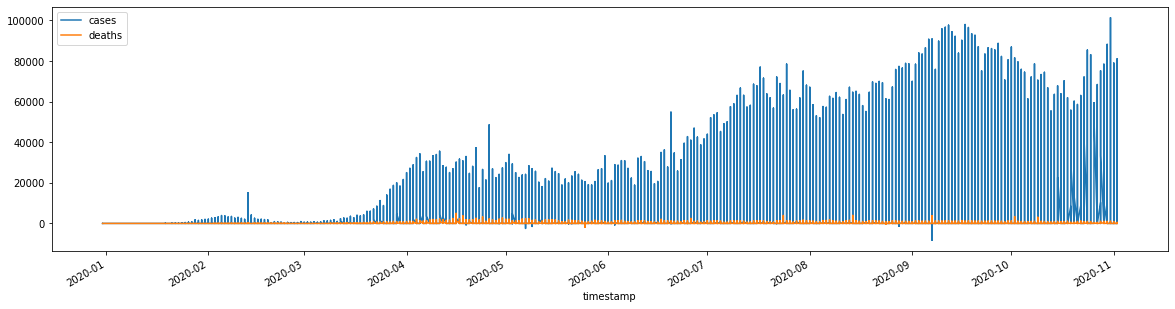

../../data_set/kaggle_italy/dataset_total_deaths.csv


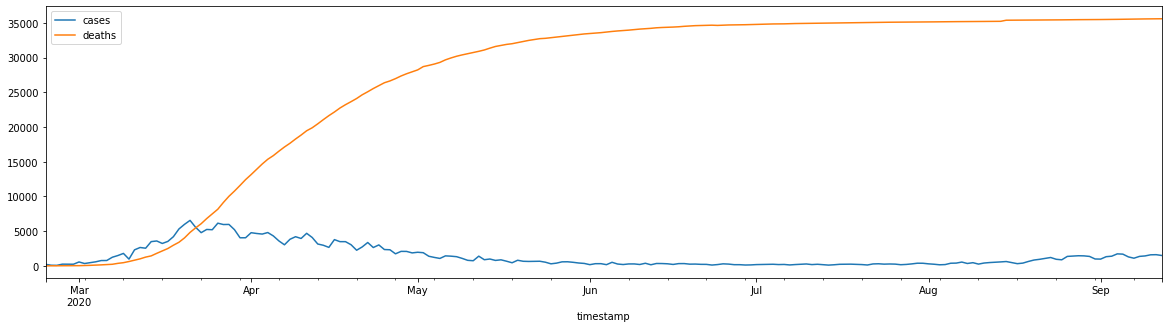

../../data_set/kaggle_italy/dataset.csv


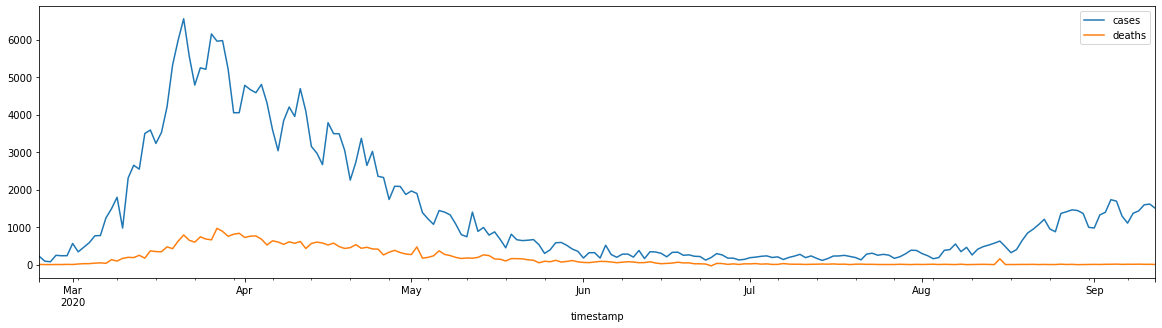

../../data_set/kaggle_USA/dataset.csv


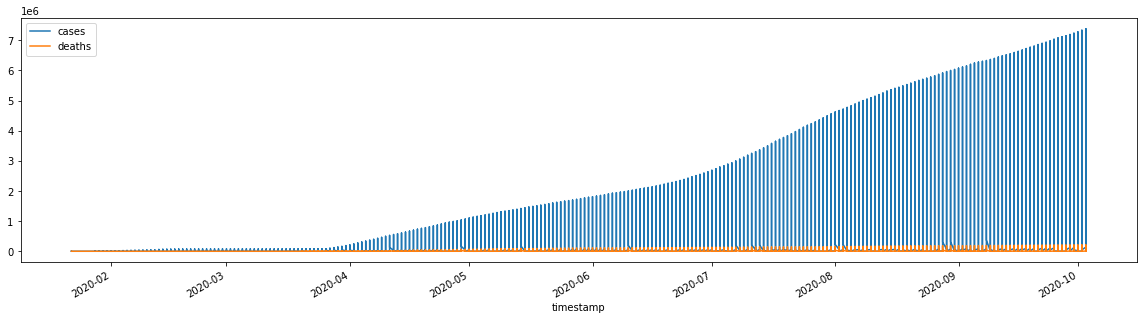

../../data_set/our_word_in_data_global/dataset.csv


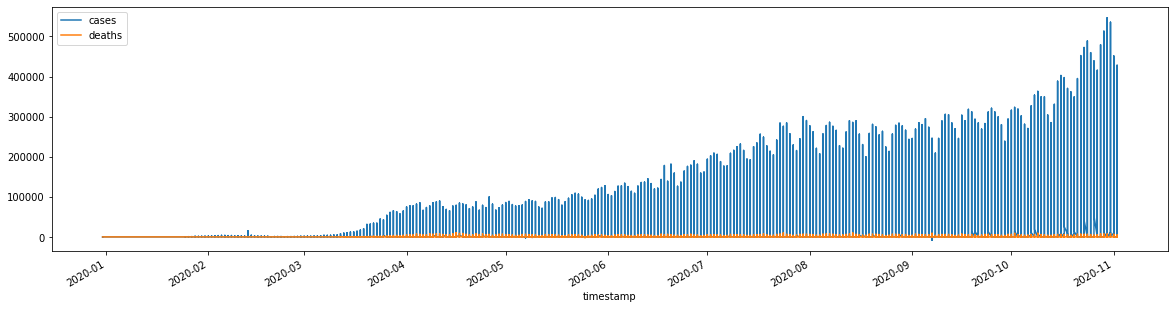

In [210]:
csvs = ['../../data_set/data_europa_eu_global/dataset.csv',
        '../../data_set/kaggle_italy/dataset_total_deaths.csv',
           '../../data_set/kaggle_italy/dataset.csv',
               '../../data_set/kaggle_USA/dataset.csv',
           '../../data_set/our_word_in_data_global/dataset.csv']
datasets = []
for csv in csvs:
    data = read_csv(csv, index_col=0, parse_dates=True, squeeze=True)
    datasets.append(data)
    data.plot()
    print(csv)
    pyplot.show()

ABW


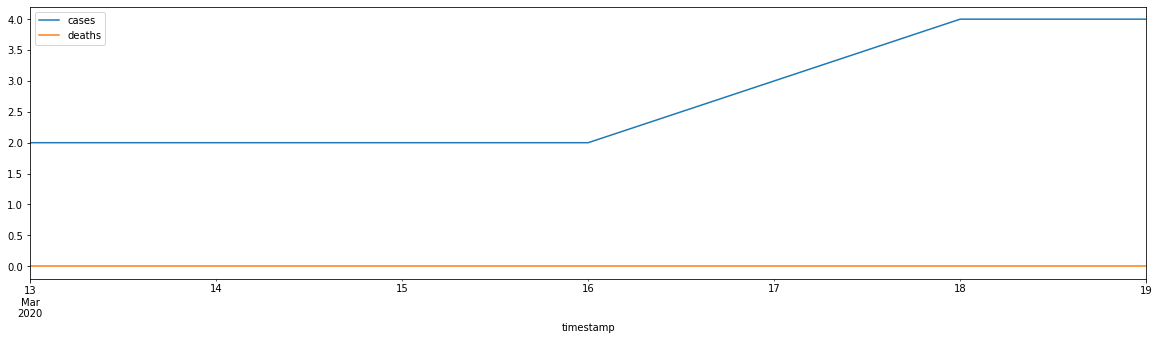

AFG


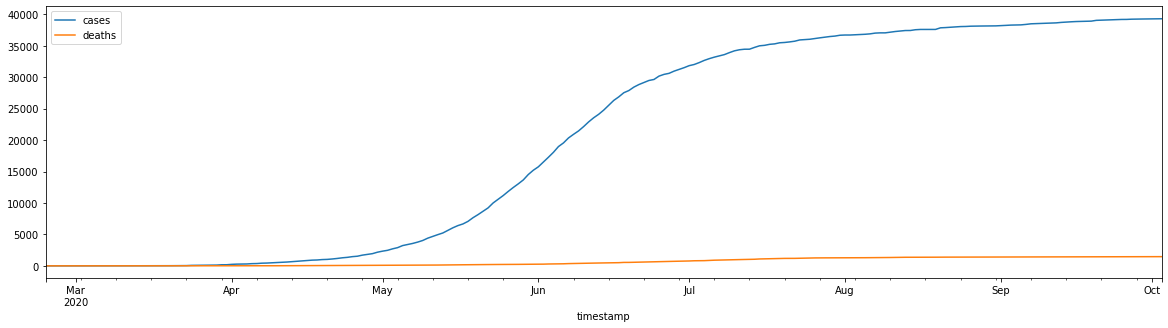

AGO


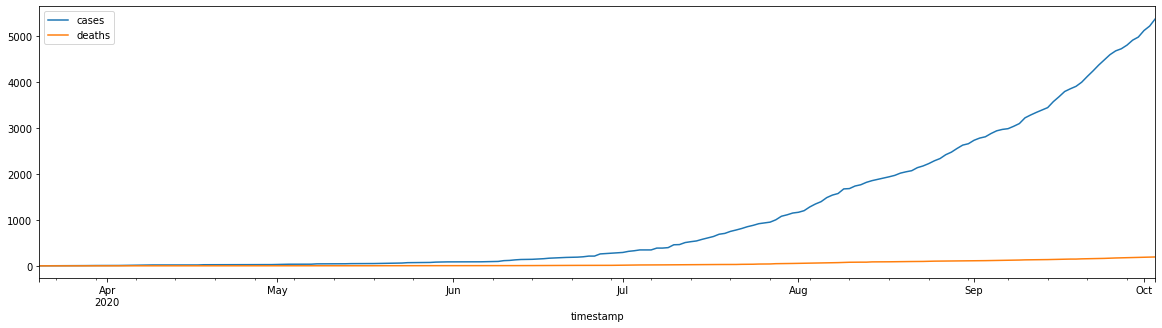

ALB


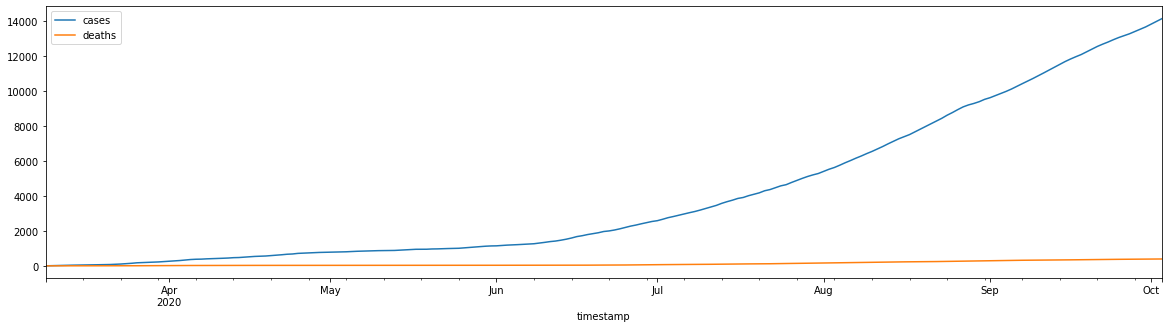

AND


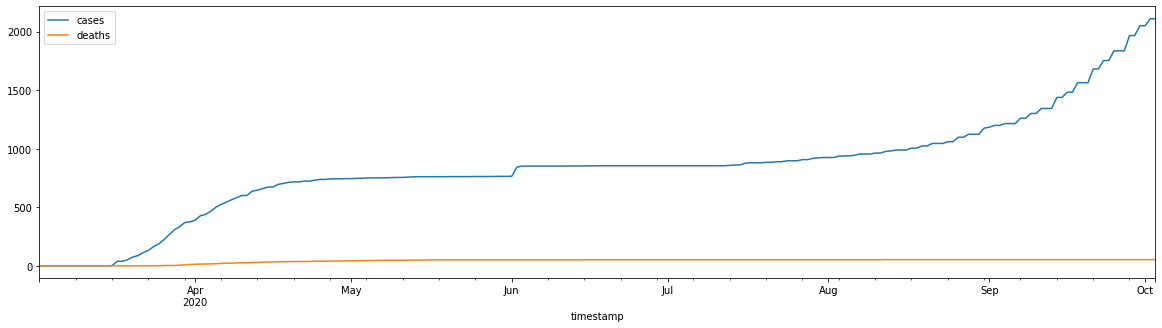

ARE


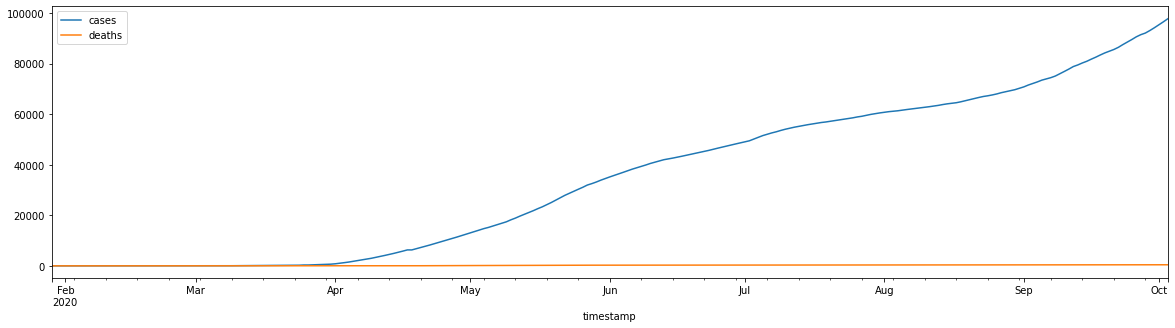

ARG


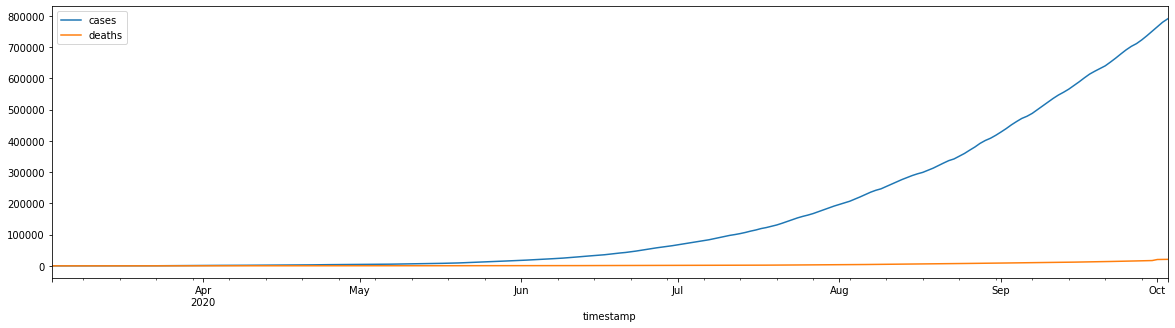

ARM


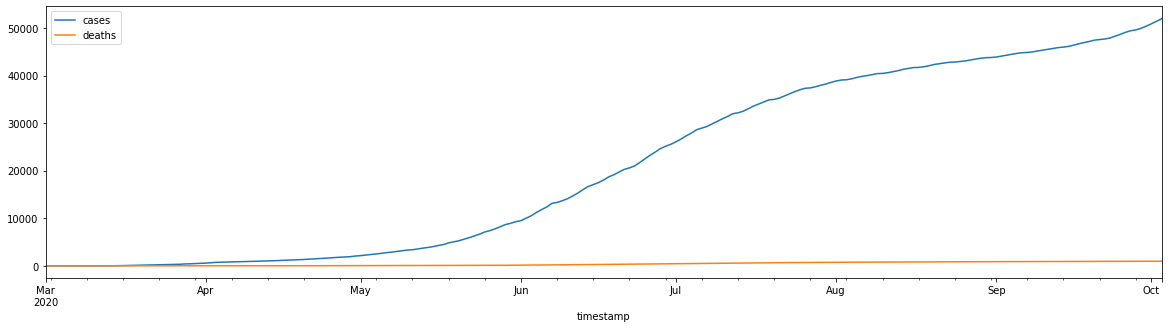

ATG


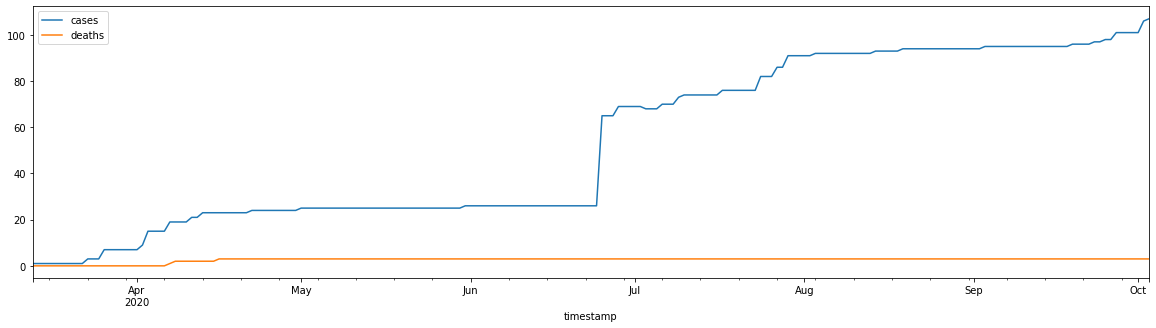

AUS


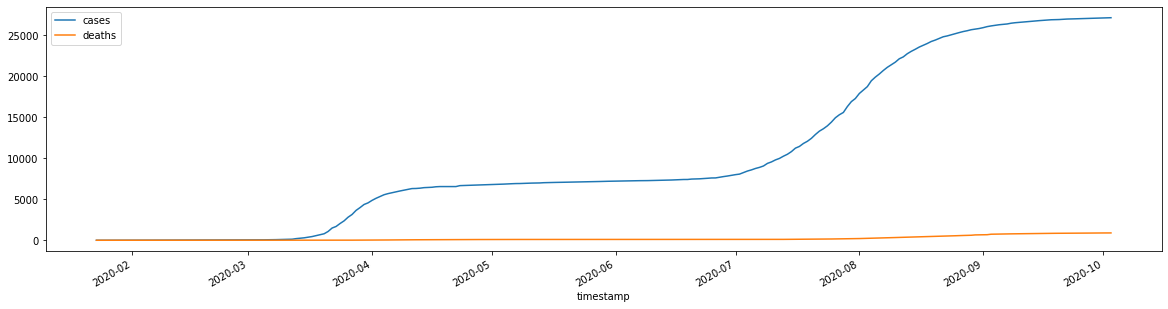

AUT


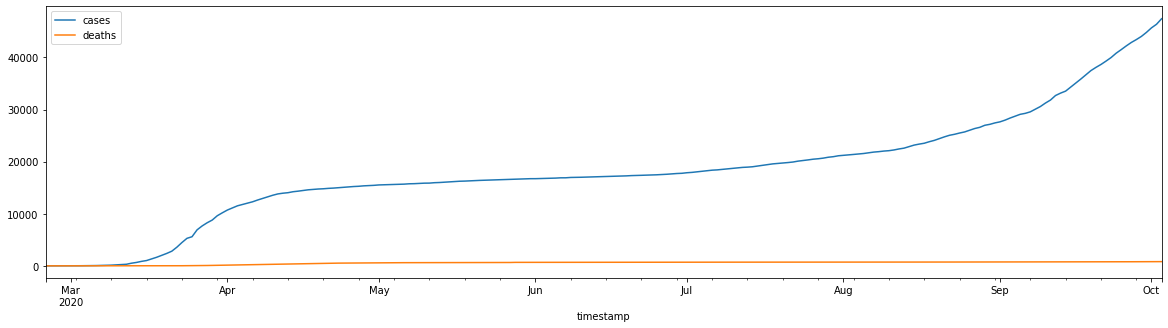

AZE


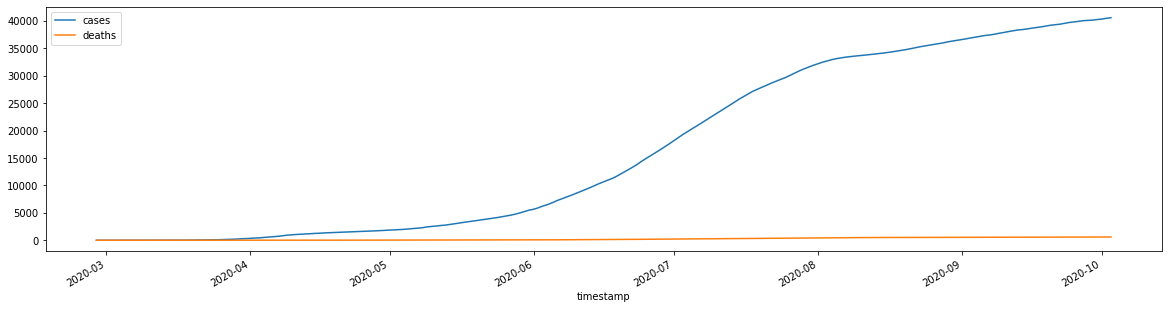

BDI


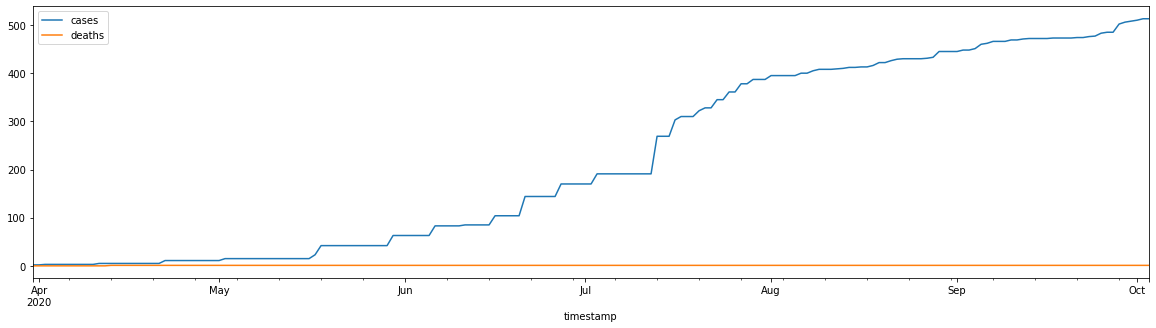

BEL


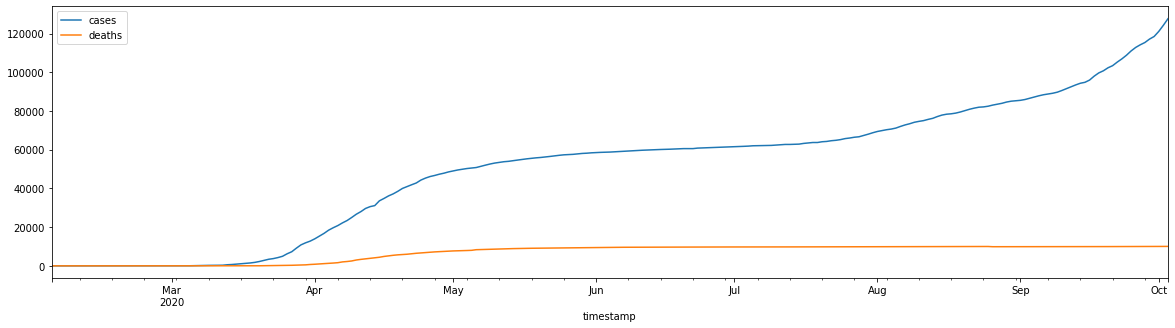

BEN


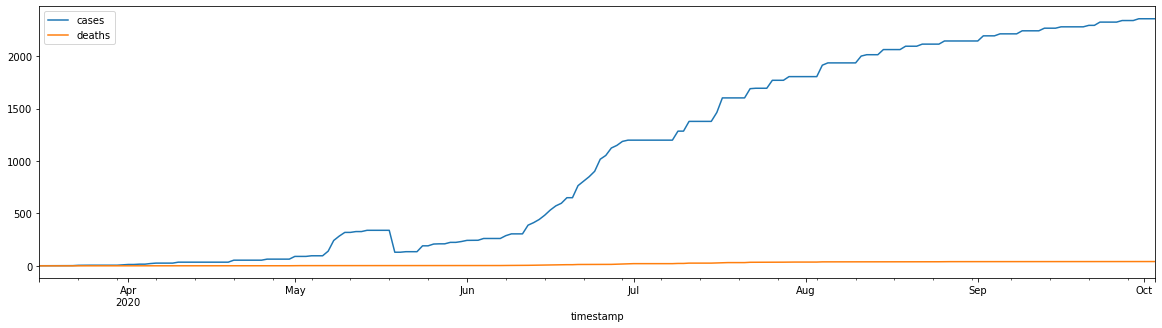

BFA


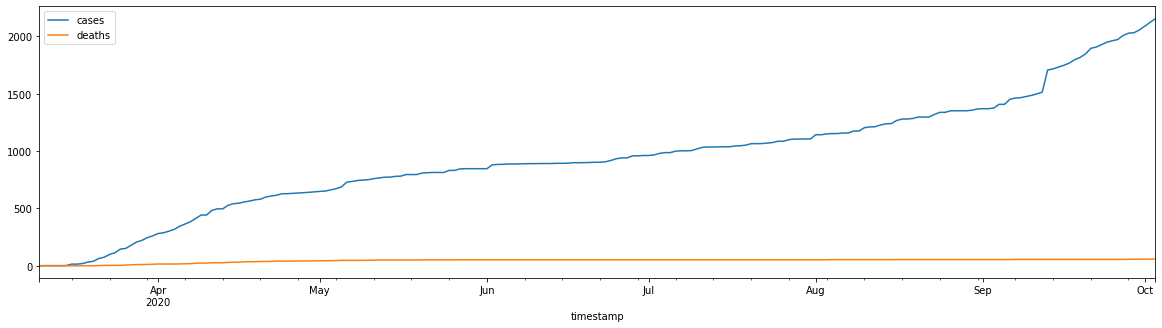

BGD


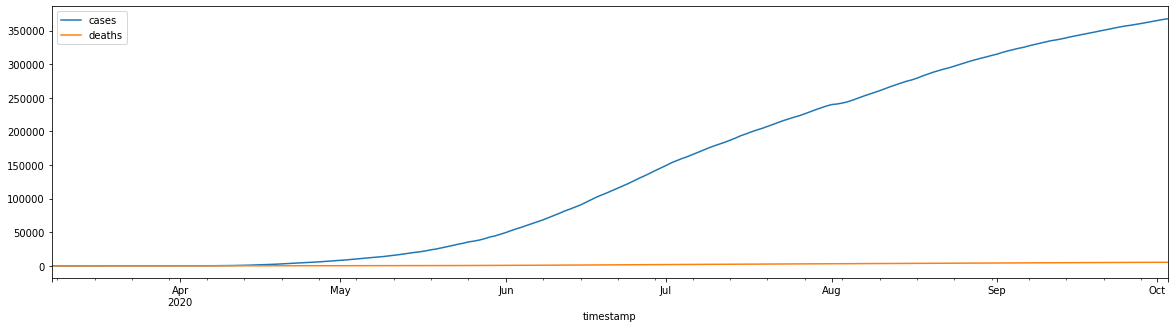

BGR


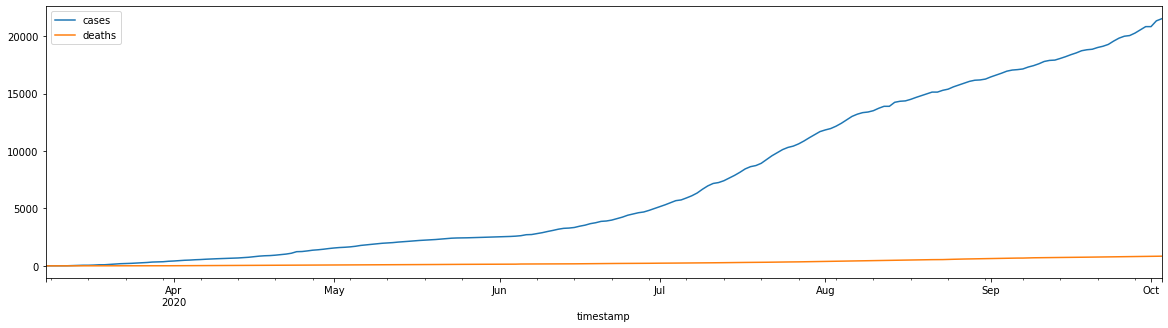

BHR


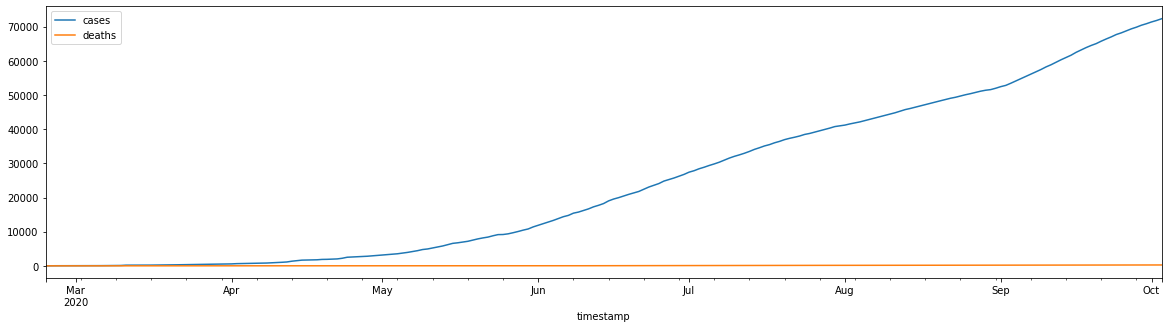

BHS


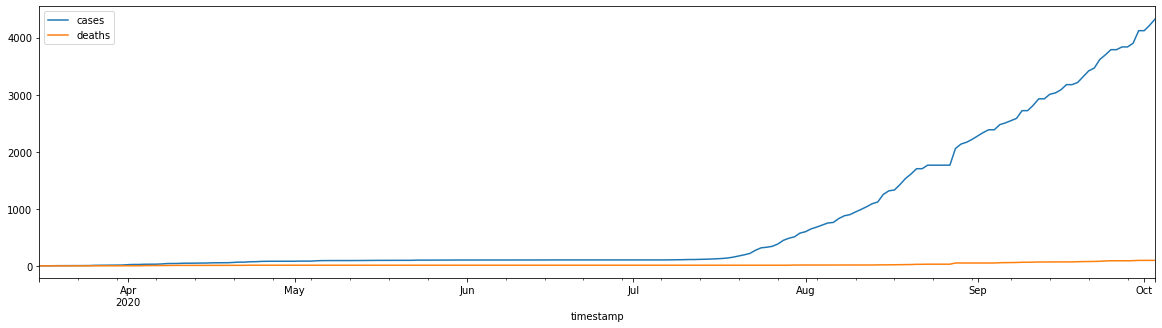

BIH


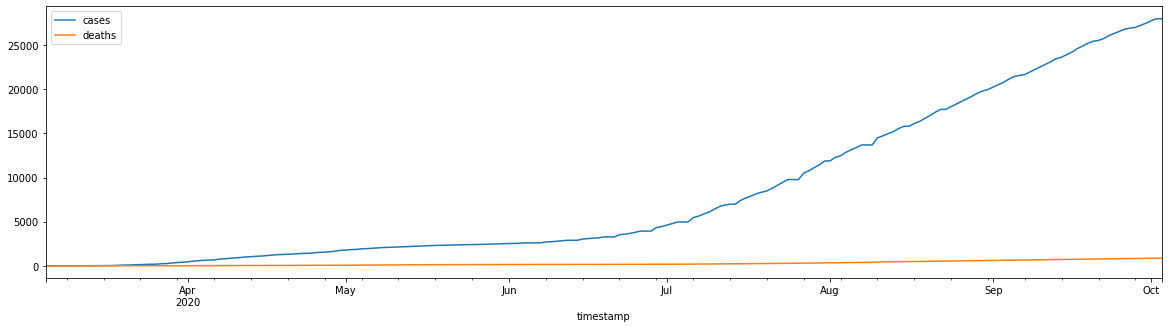

BLM


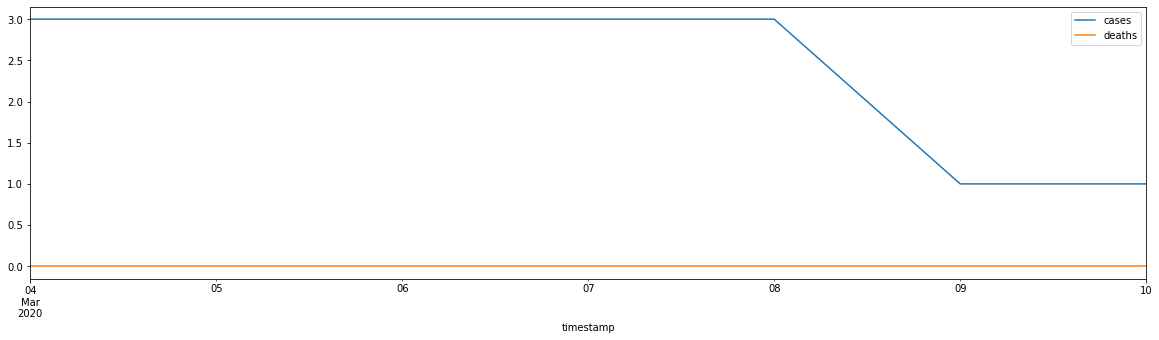

BLR


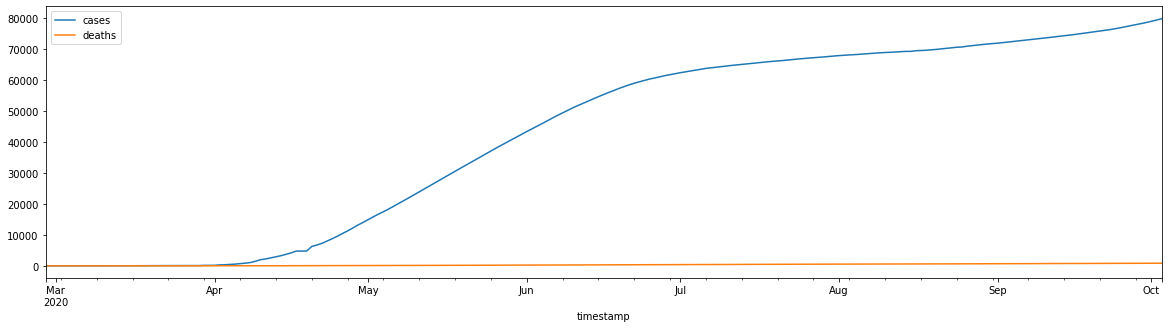

BLZ


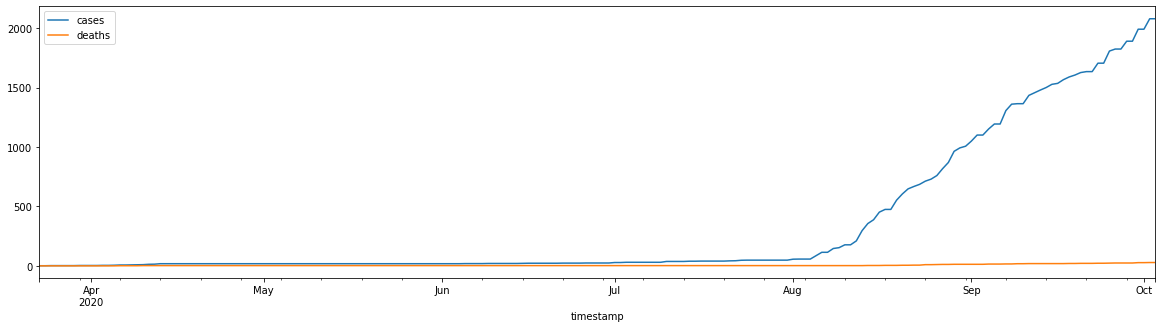

BOL


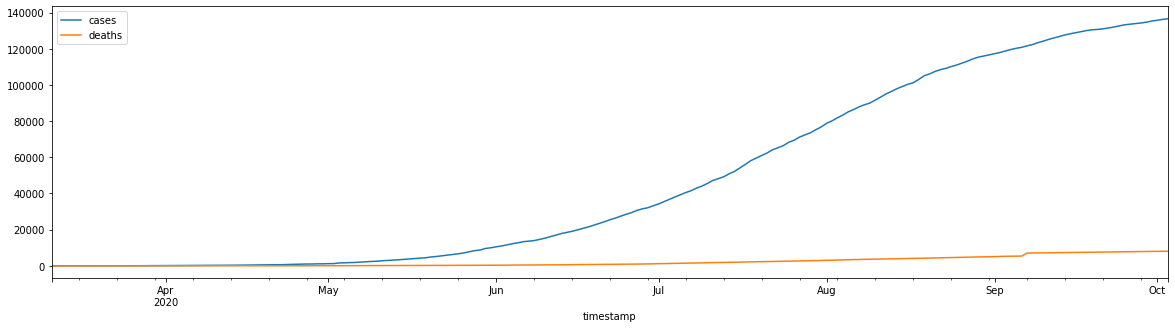

BRA


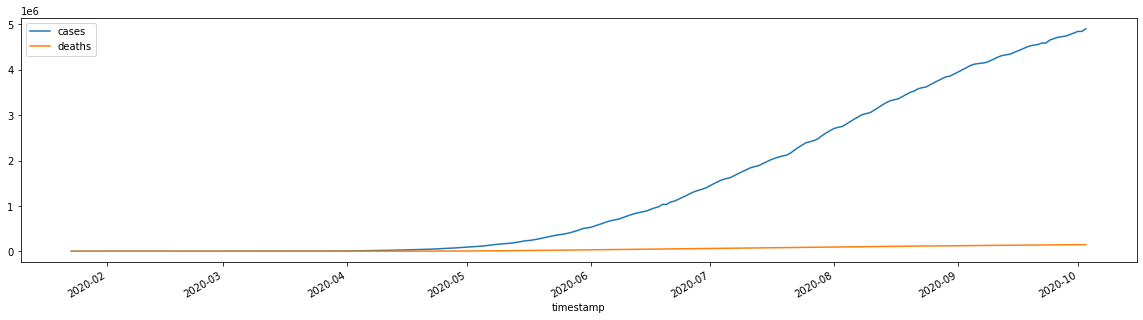

BRB


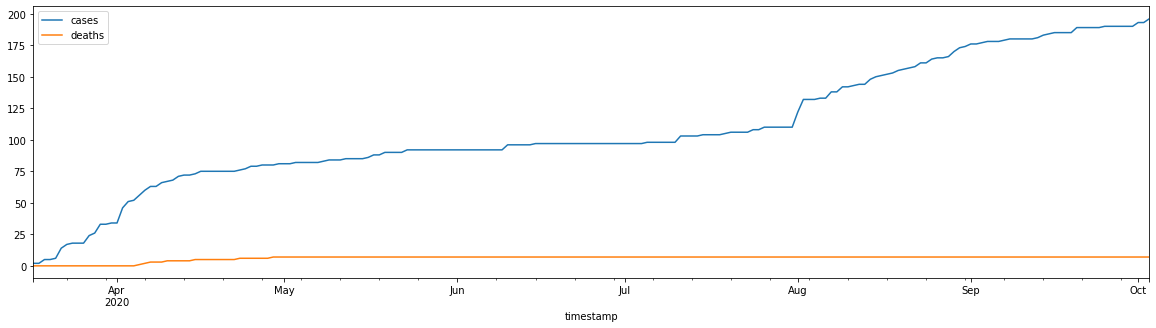

BRN


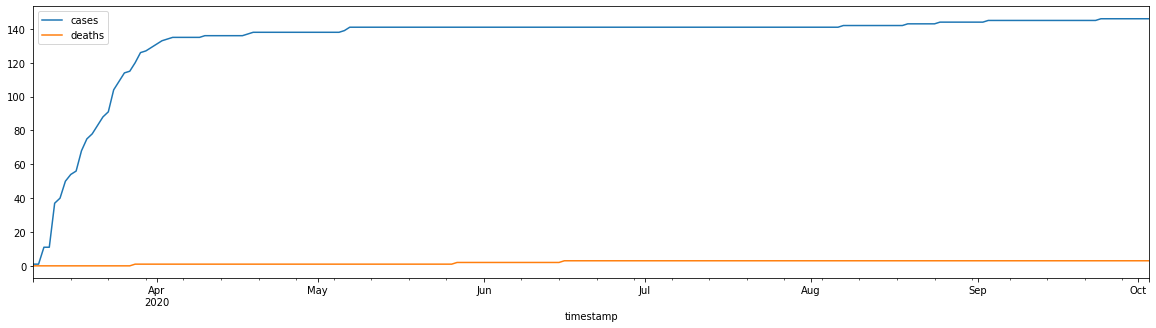

BTN


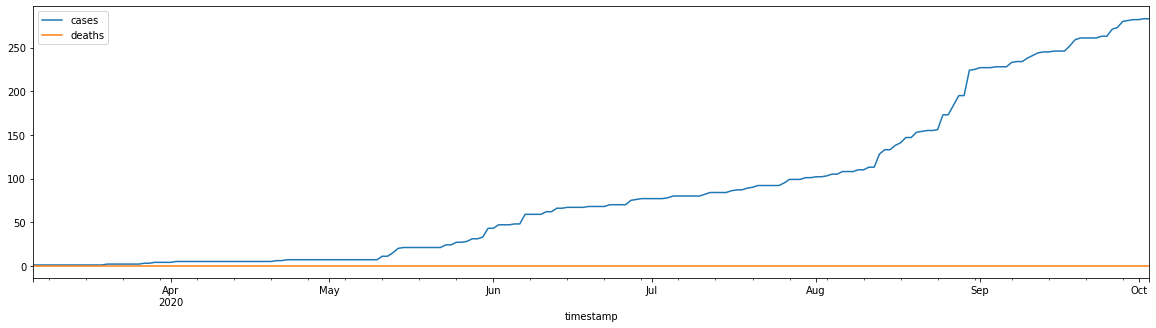

BWA


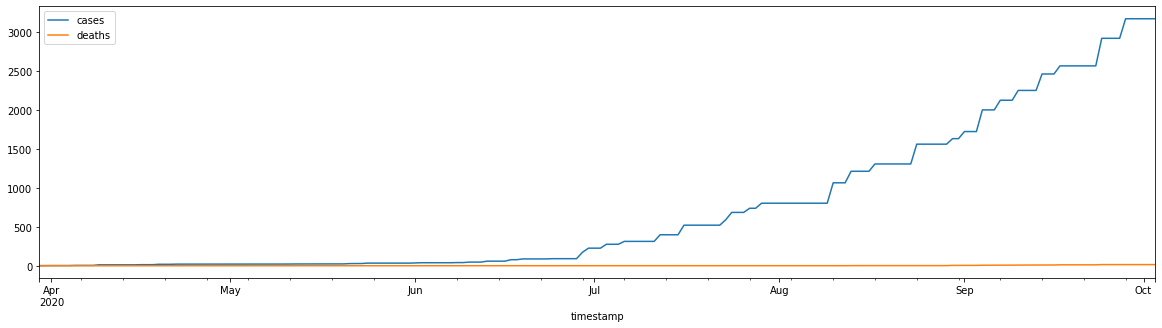

CAF


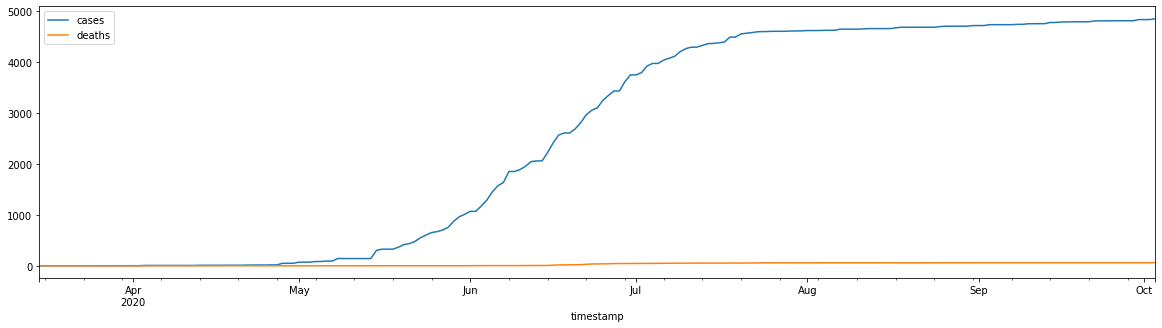

CAN


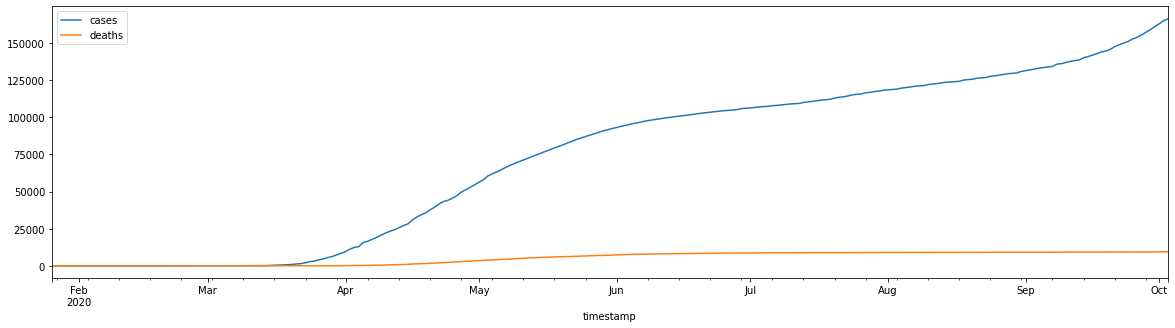

CHE


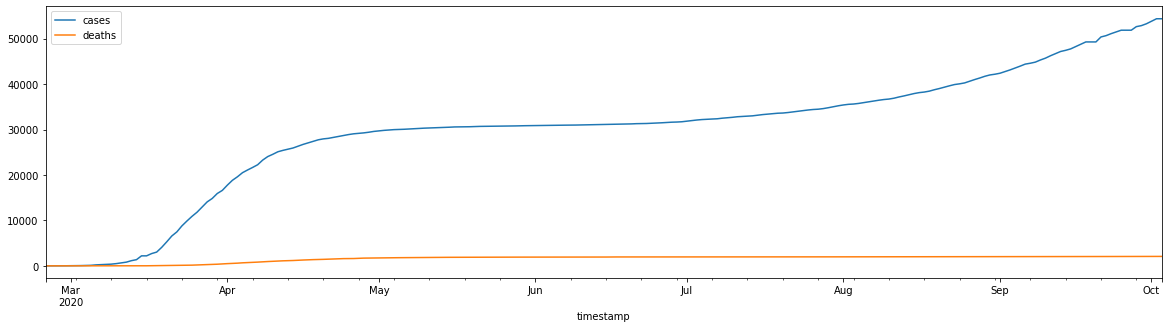

CHL


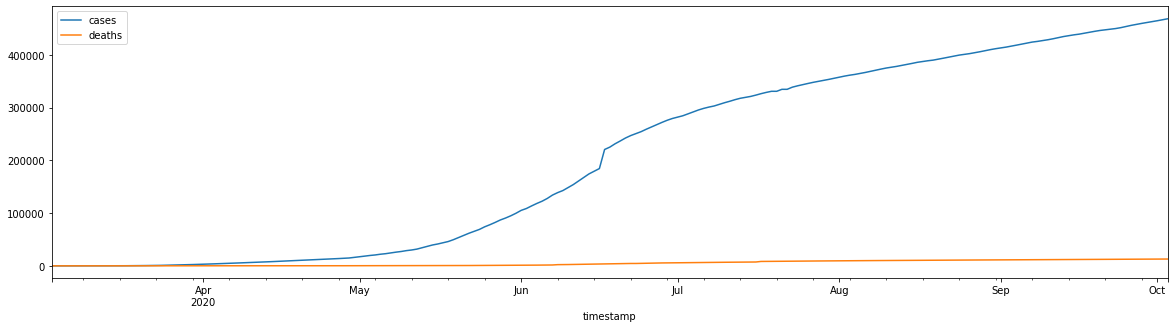

CHN


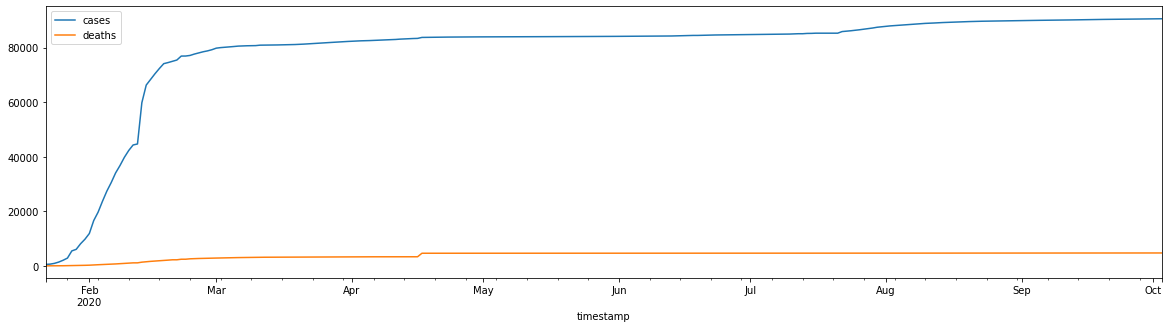

CIV


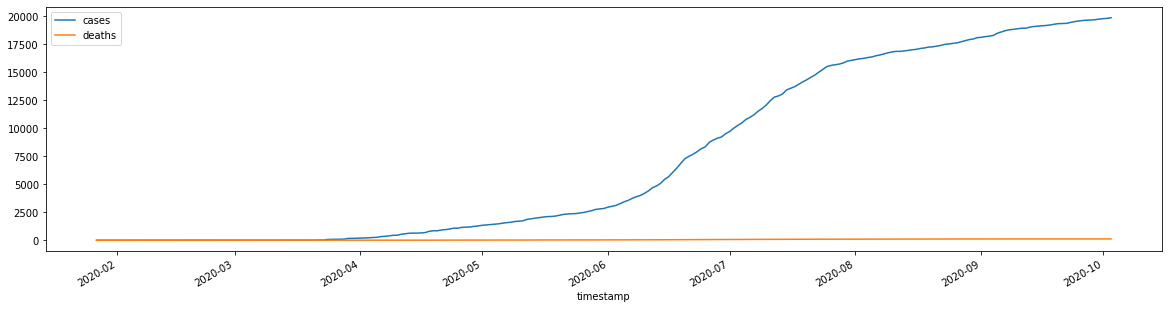

CMR


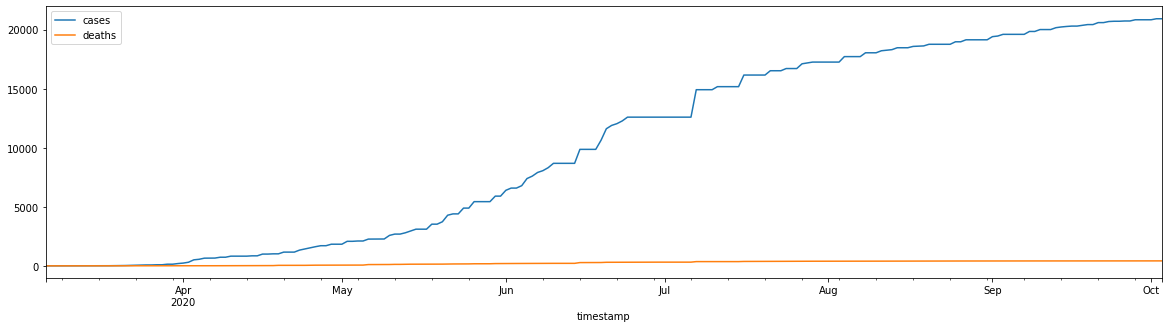

COD


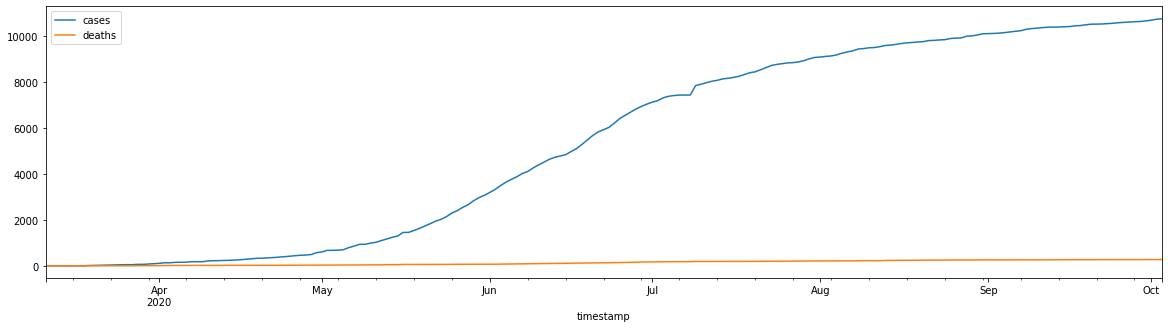

COG


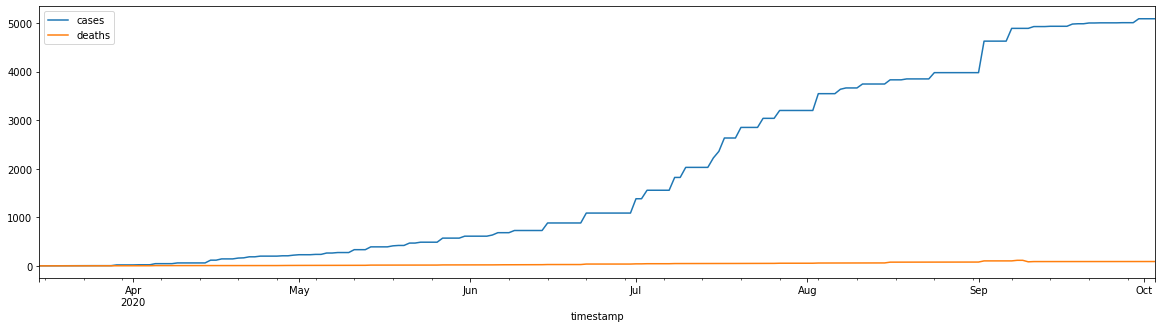

COL


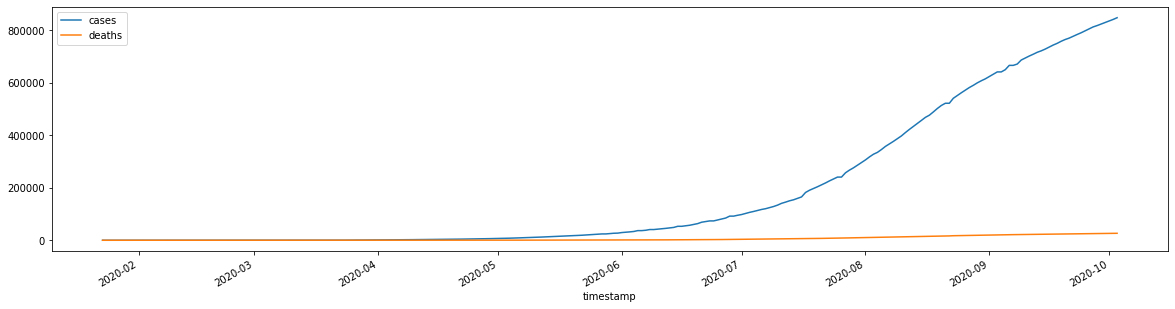

COM


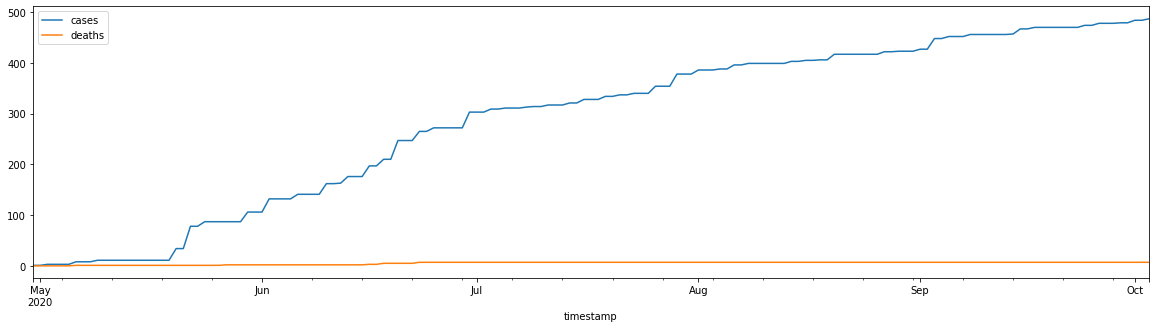

CPV


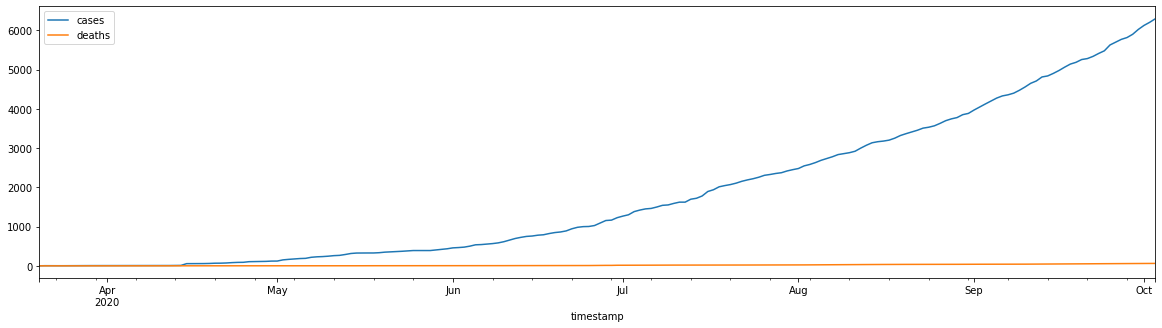

CRI


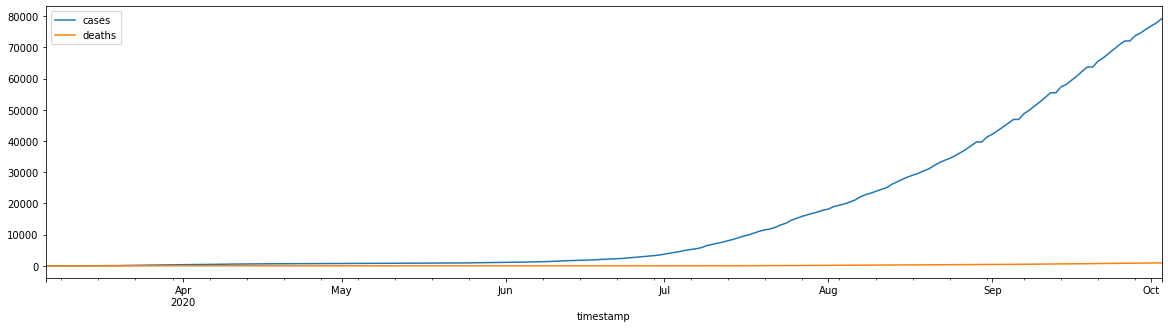

CUB


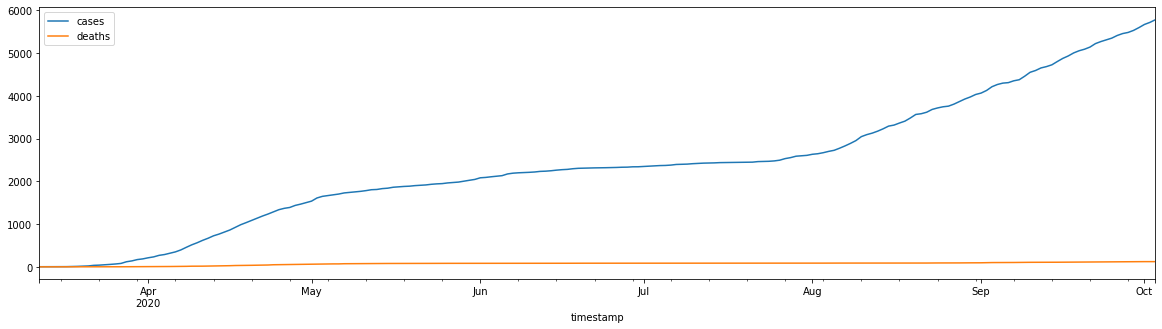

CUW


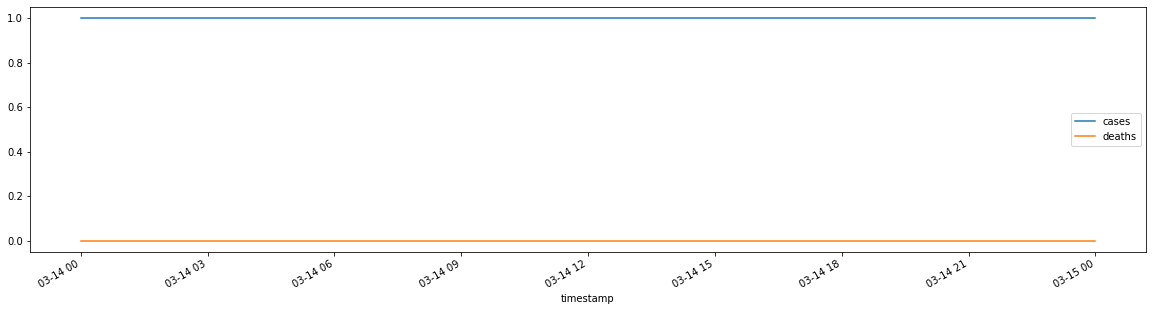

CYM


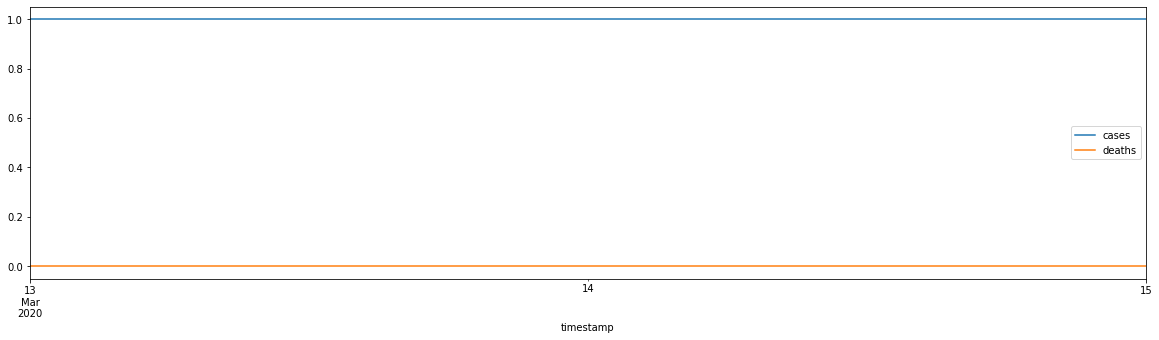

CYP


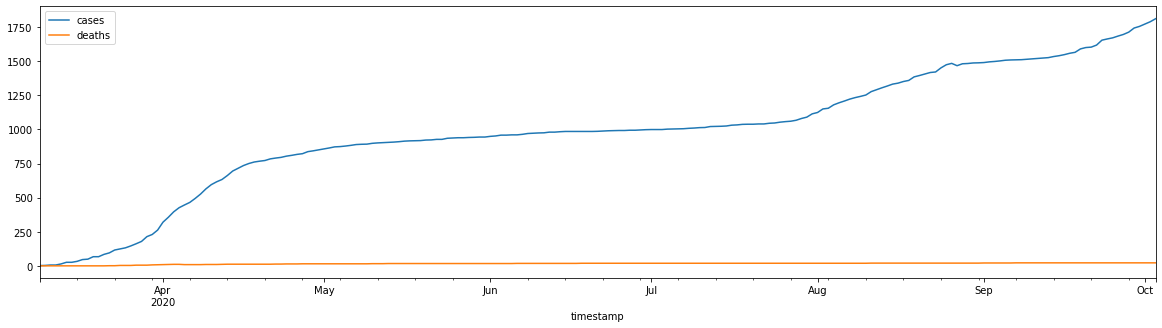

CZE


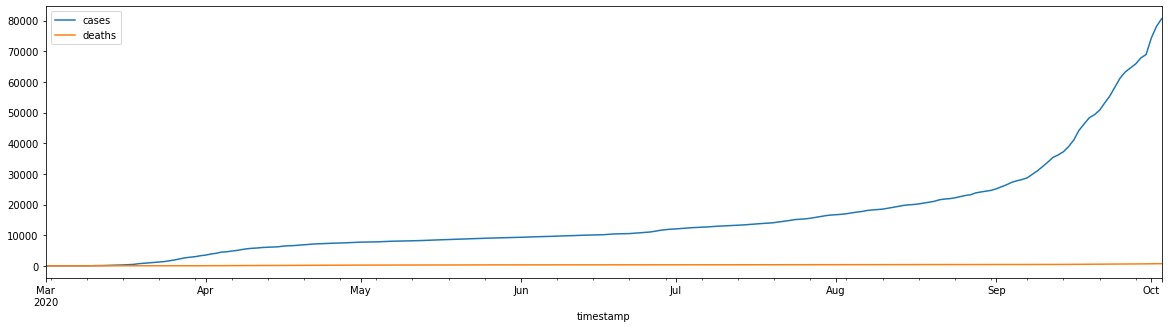

DEU


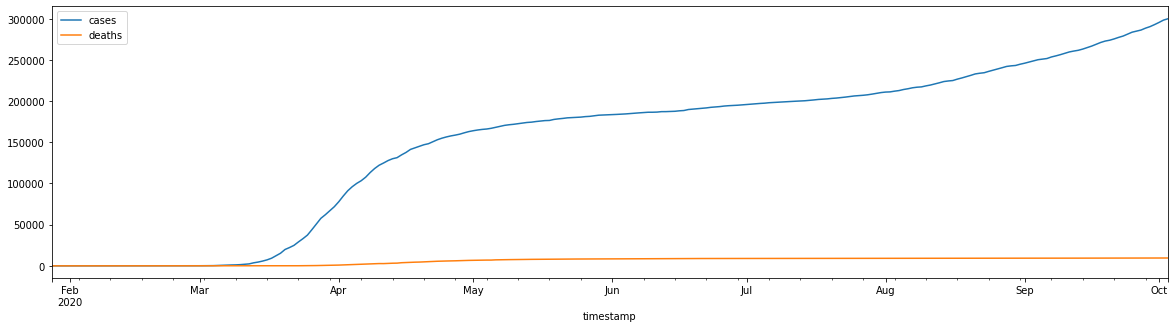

DJI


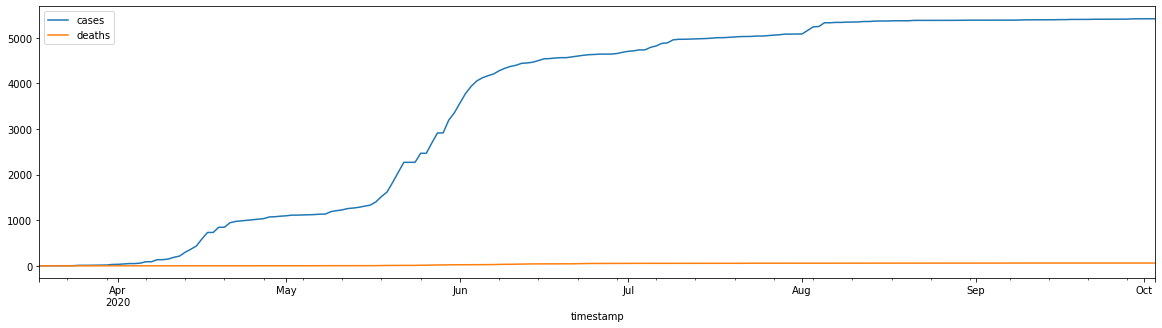

DNK


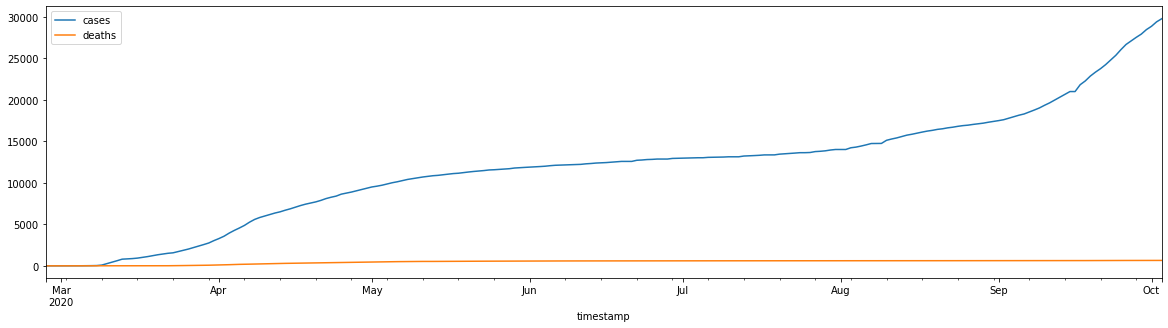

DOM


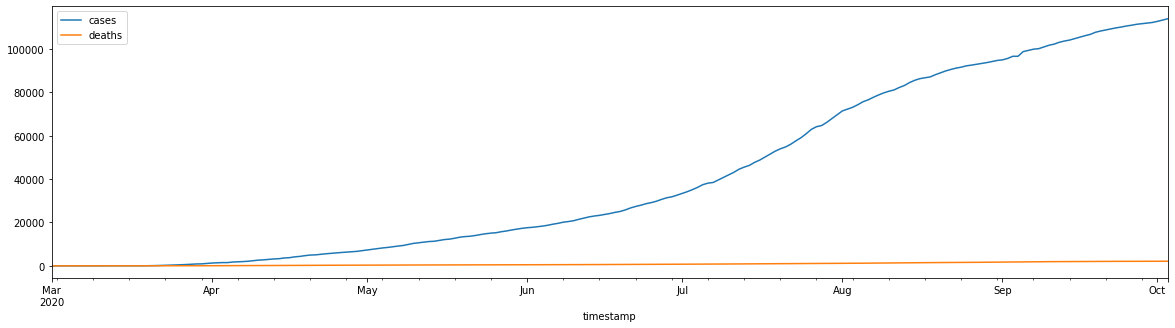

DZA


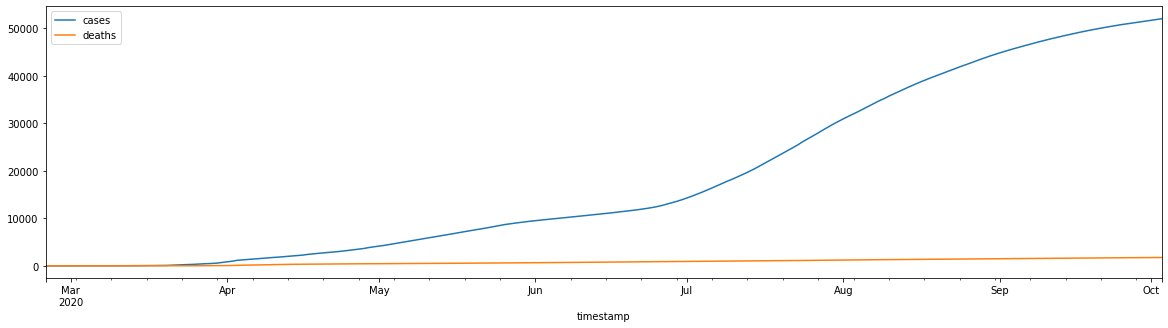

ECU


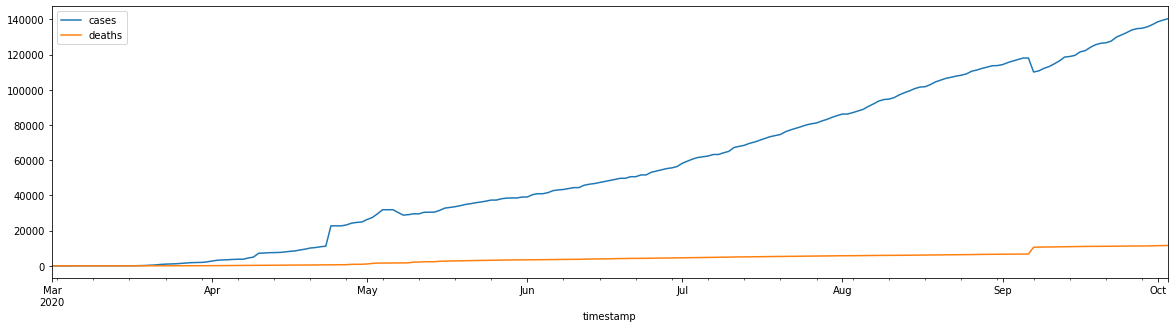

EGY


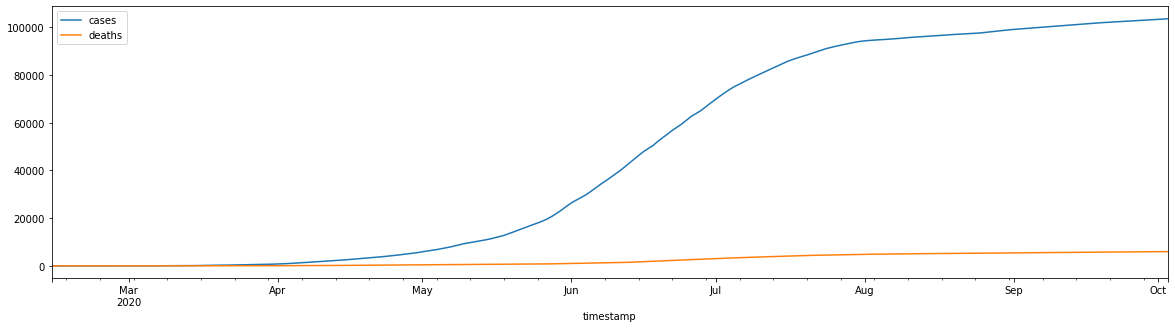

ERI


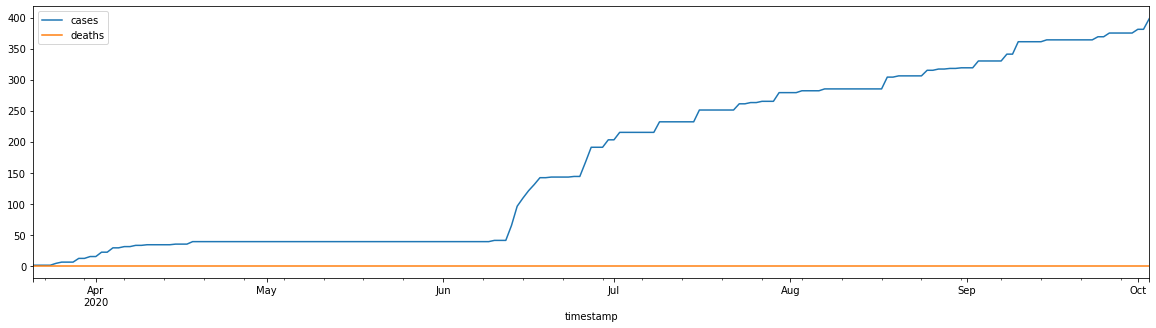

ESH


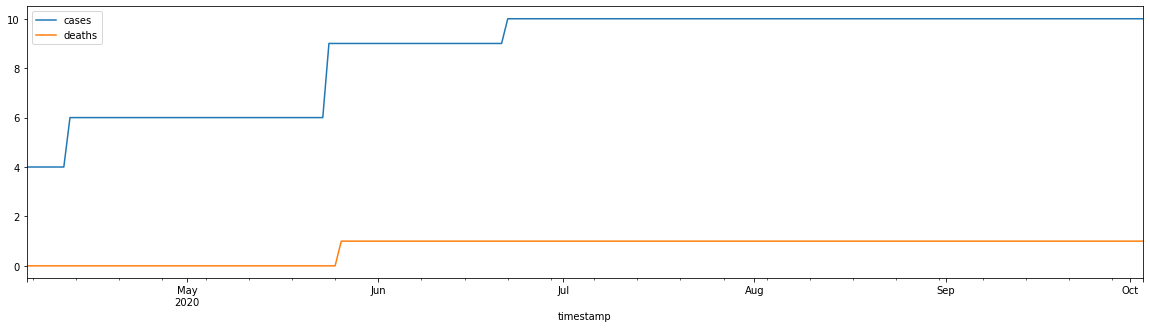

ESP


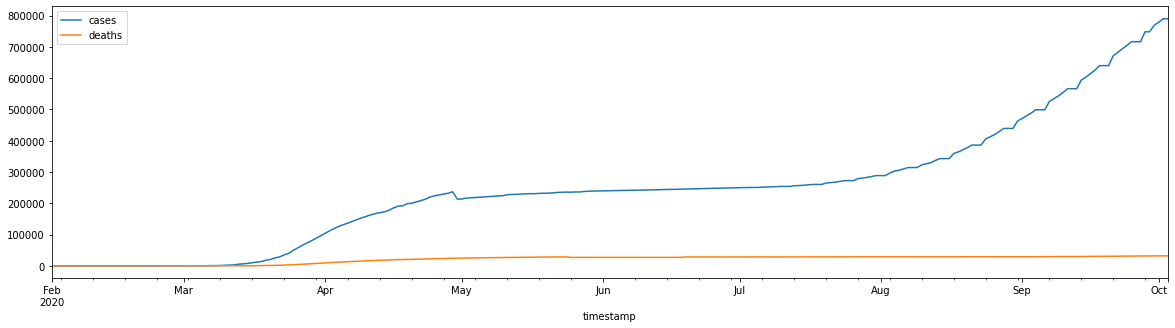

EST


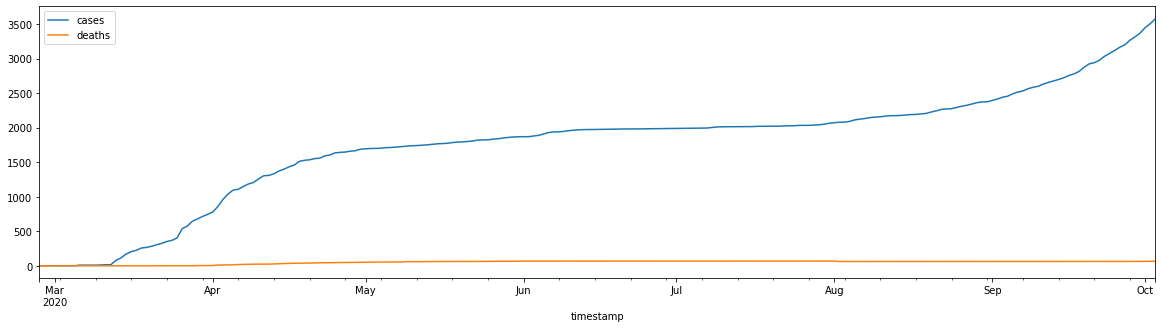

ETH


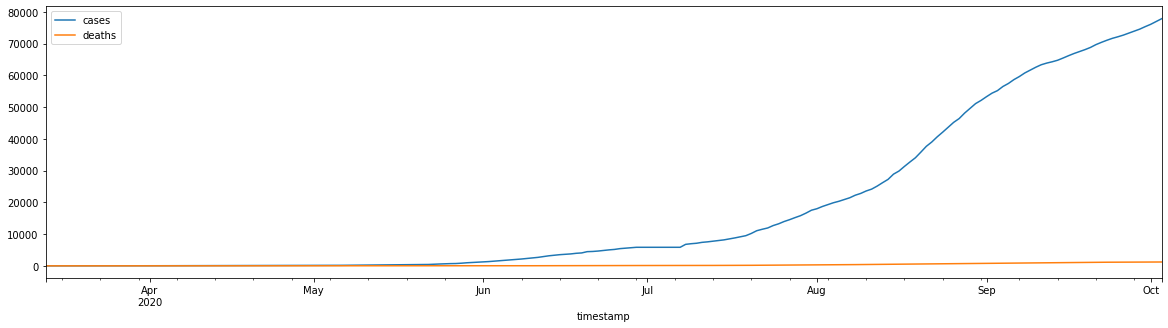

FIN


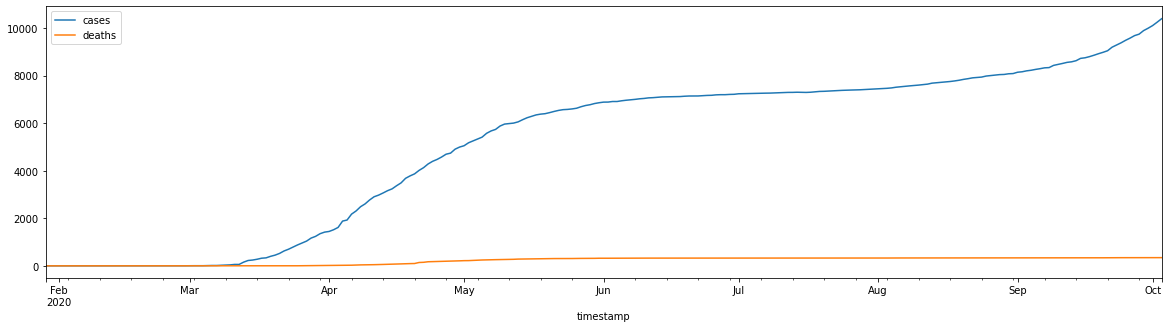

FJI


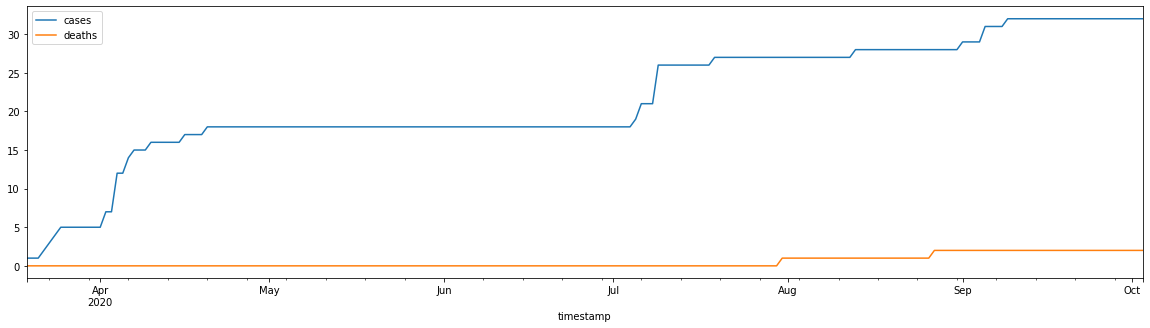

FRA


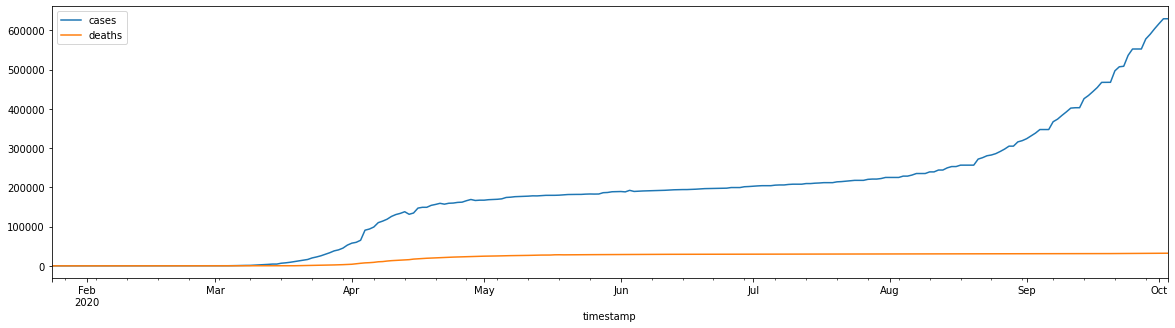

FRO


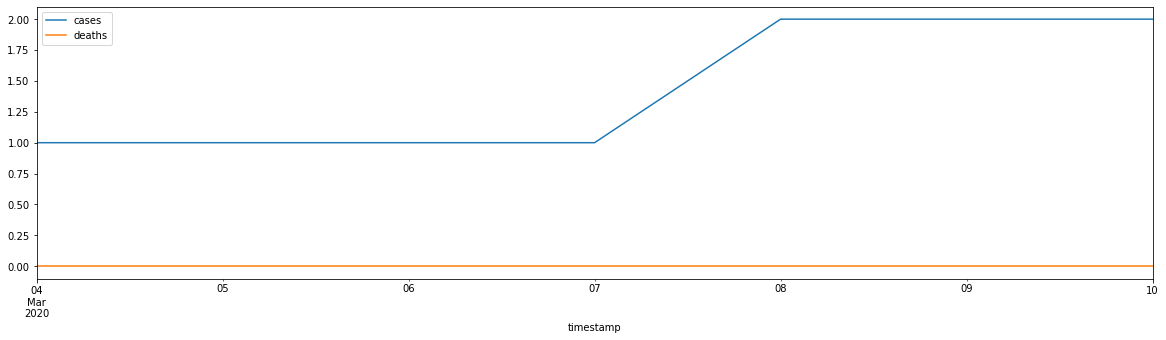

GAB


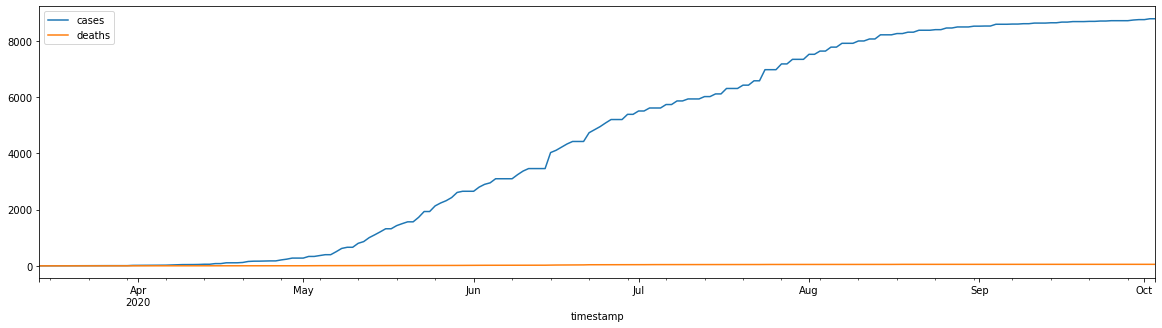

GBR


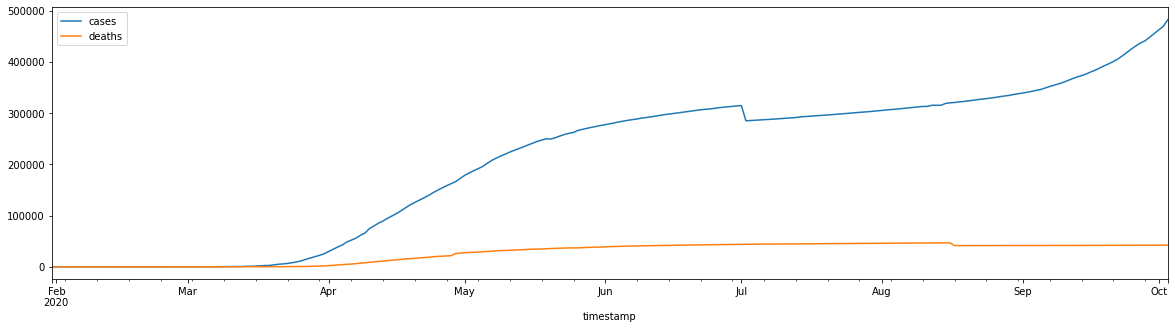

GEO


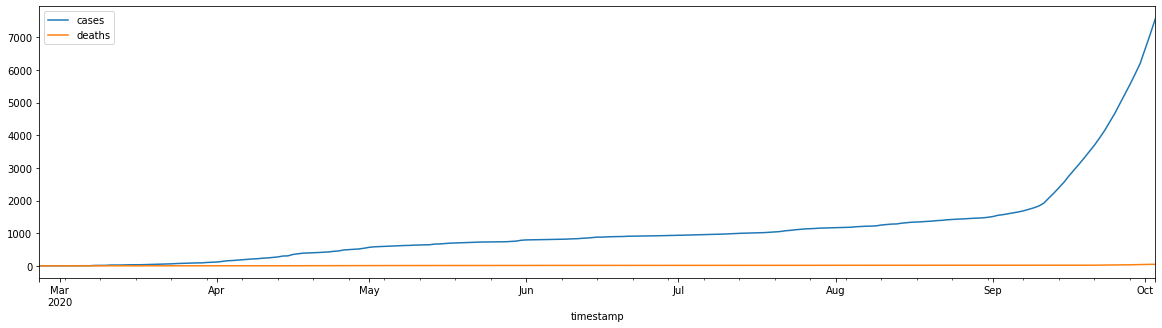

GGY


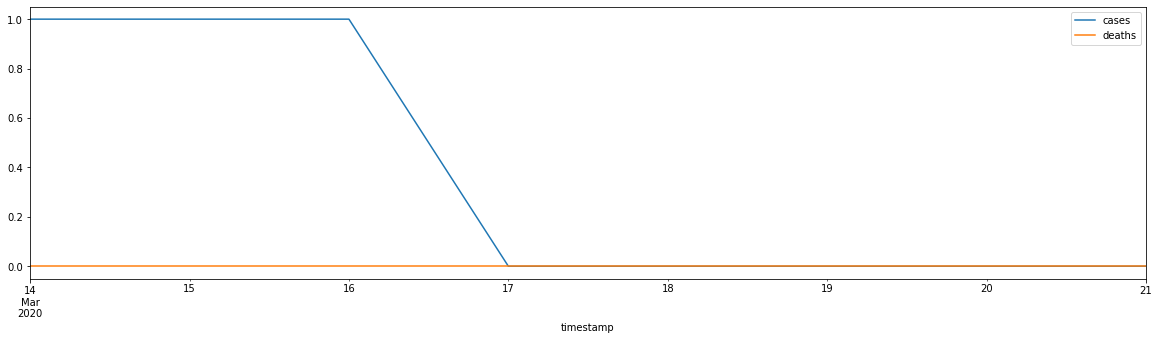

GHA


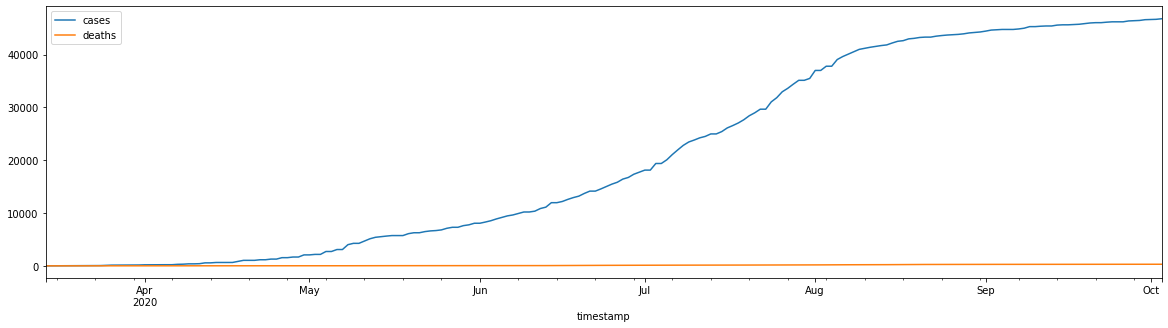

GIB


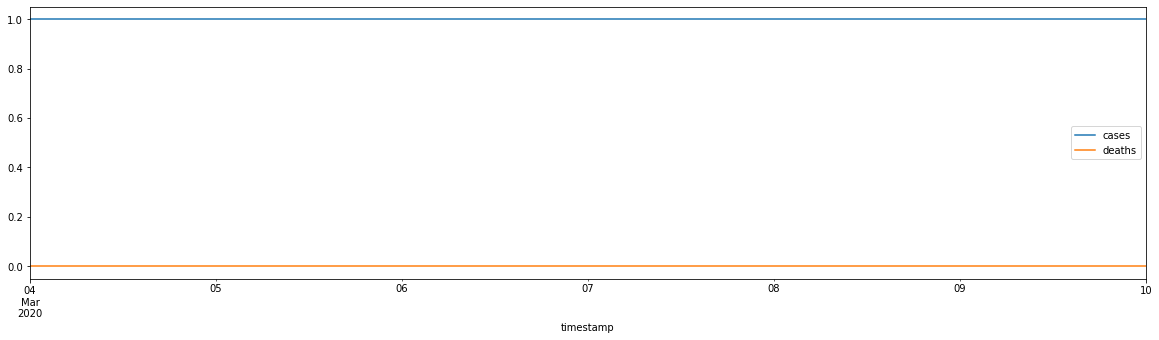

GIN


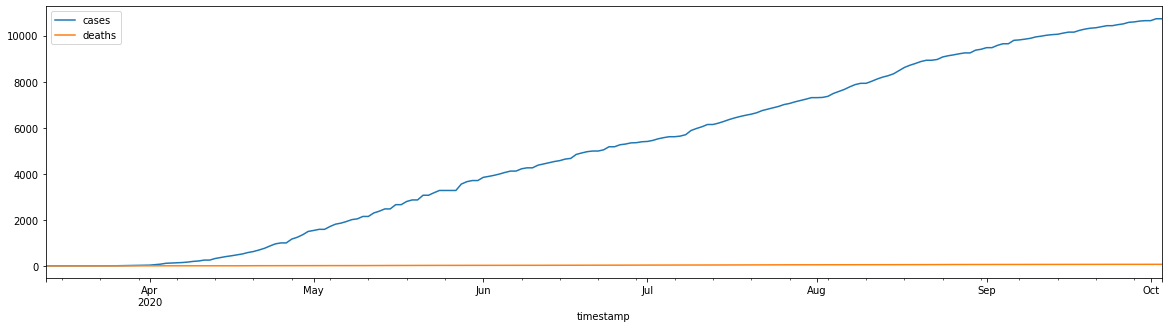

GLP


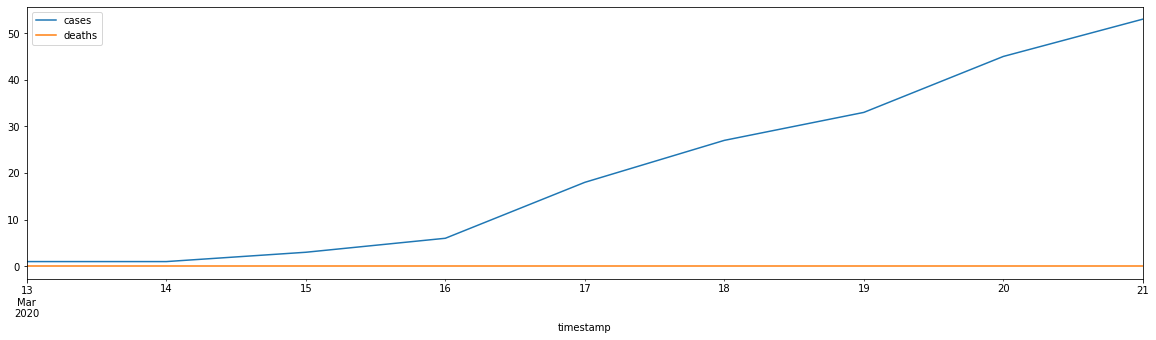

GMB


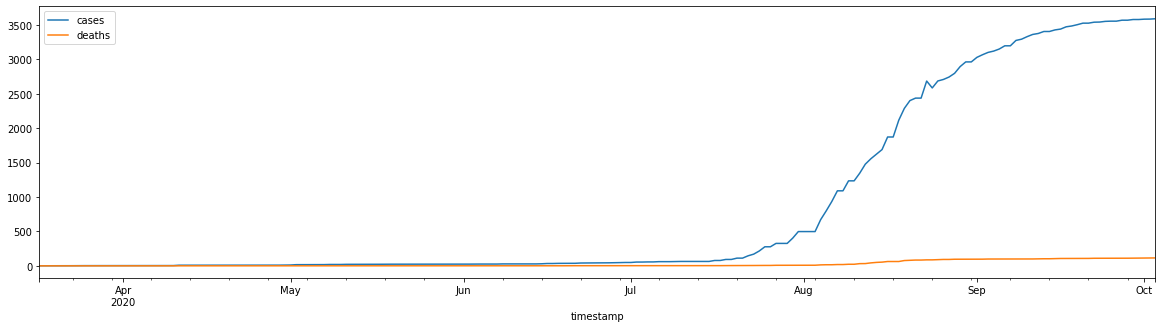

GNB


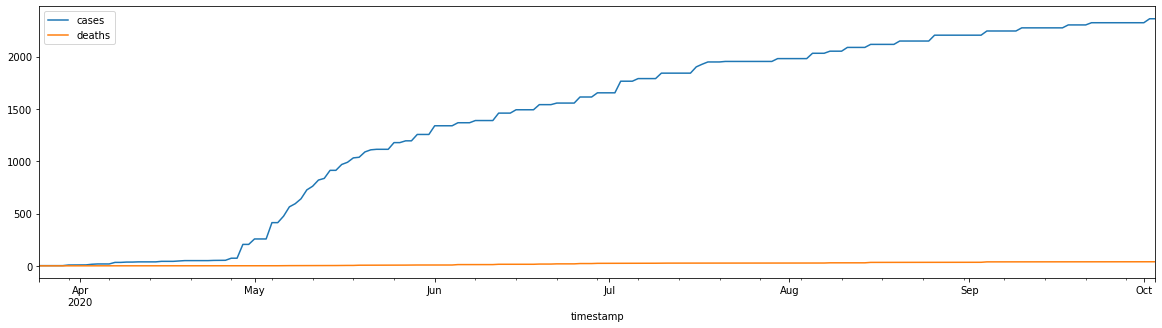

GNQ


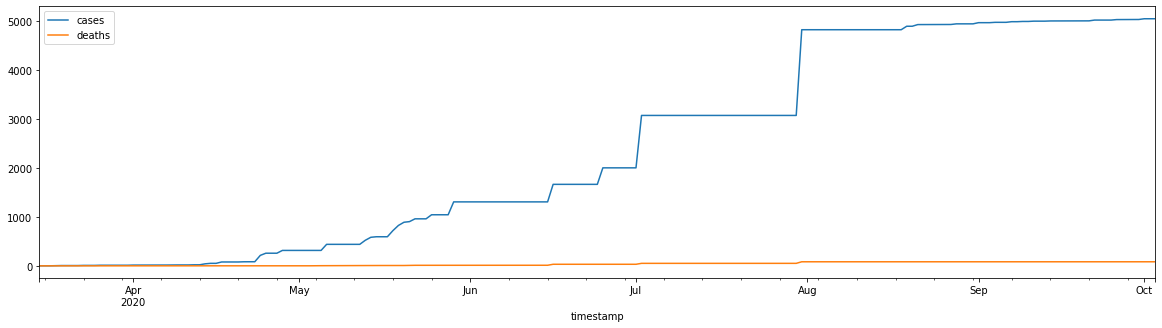

GRC


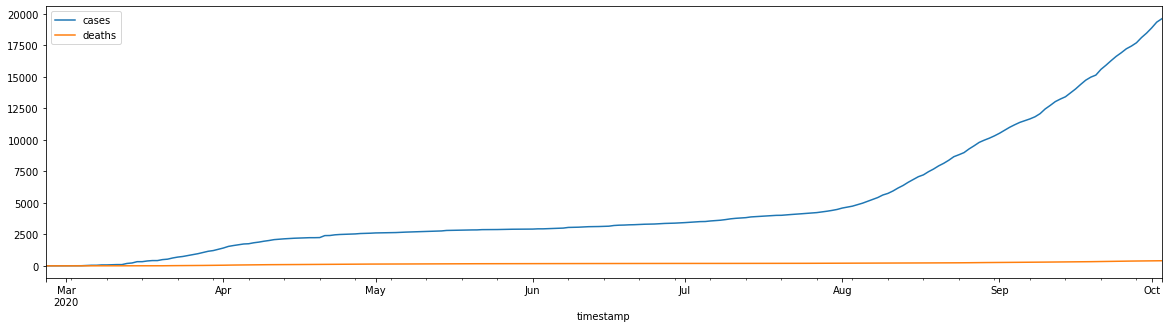

GRD


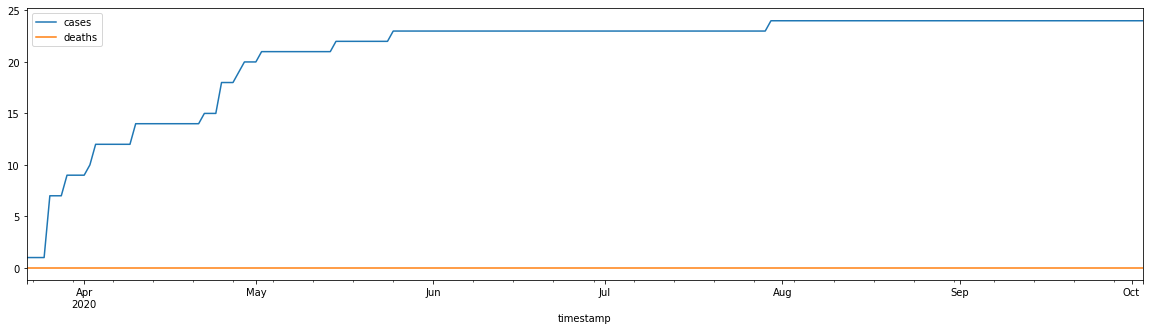

GRL


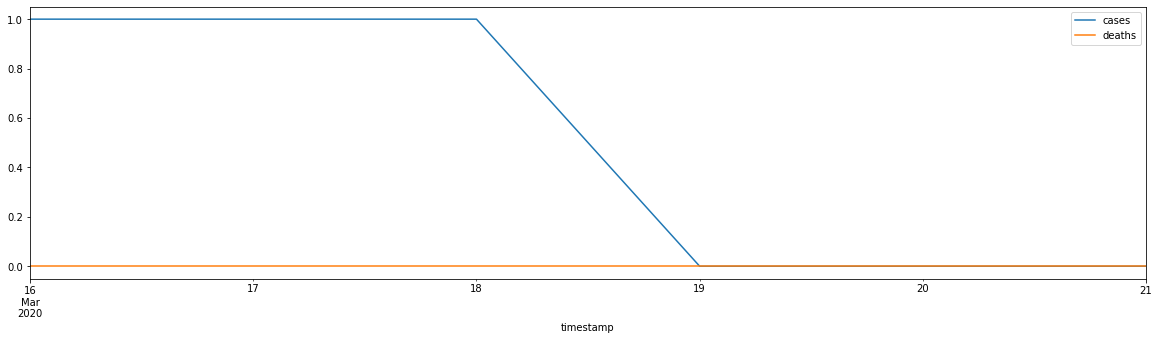

GTM


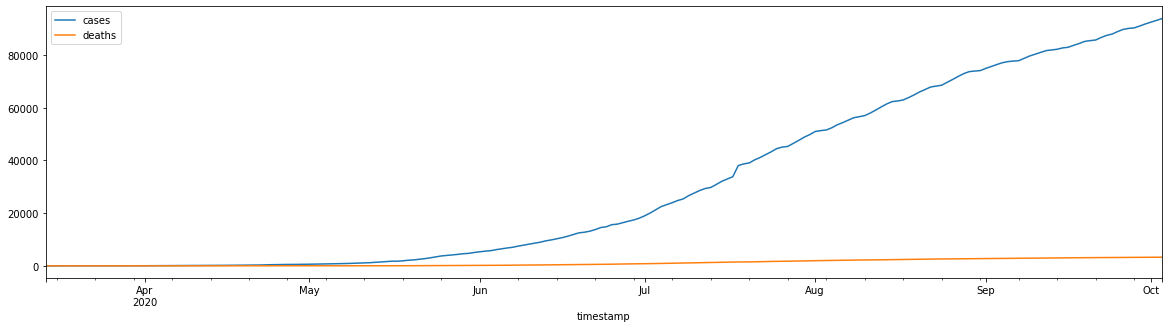

GUF


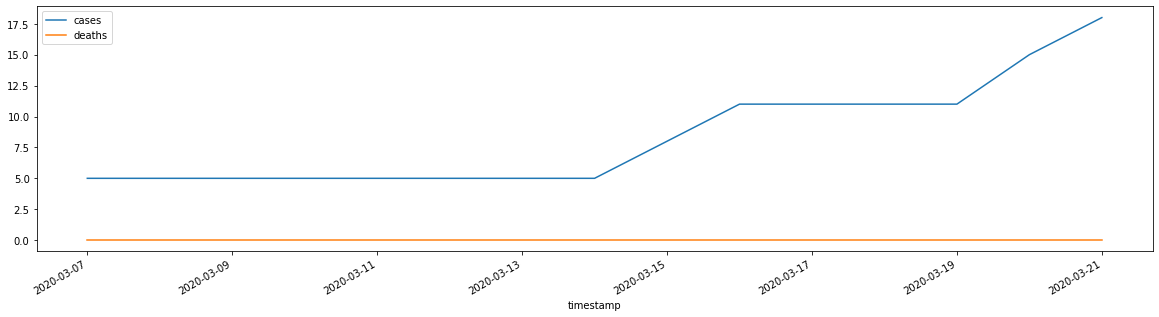

GUM


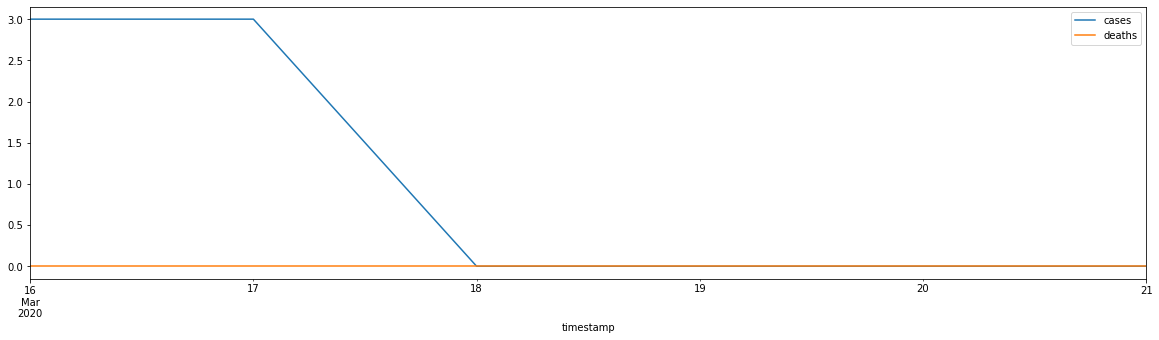

GUY


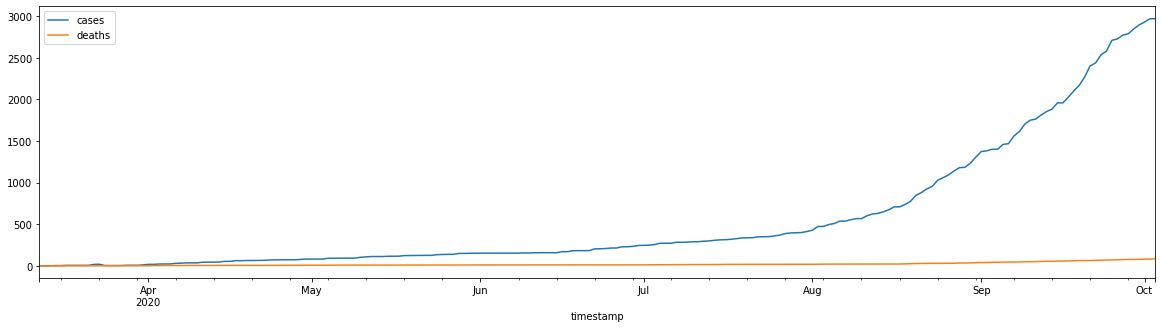

HKG


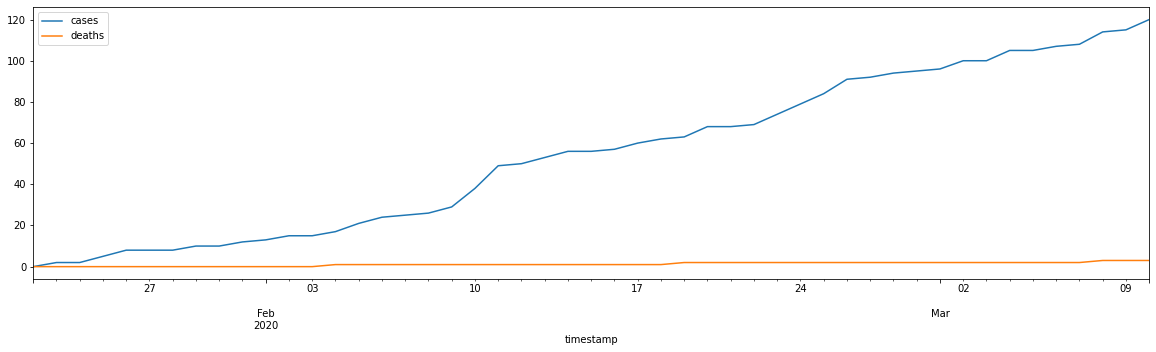

HND


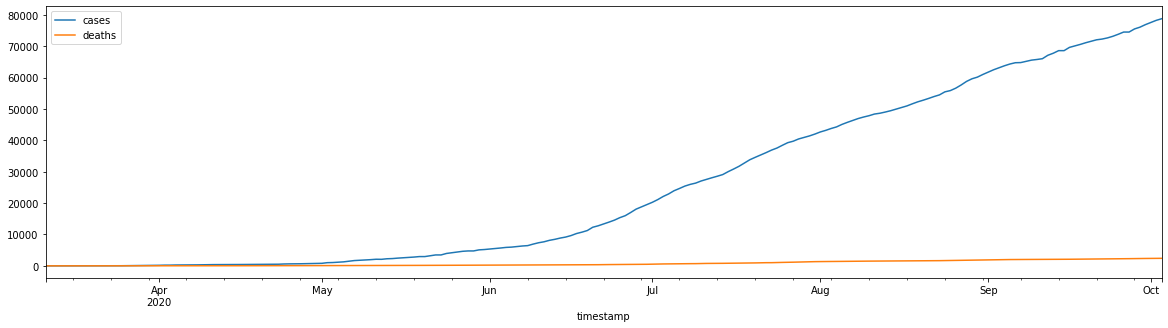

HRV


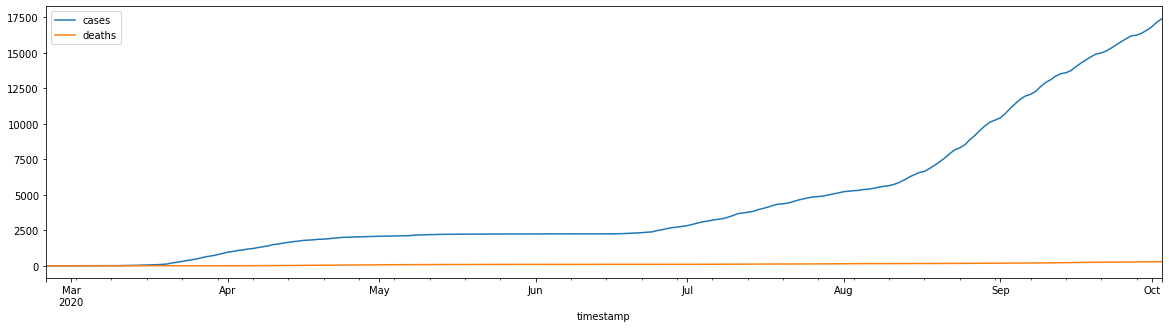

HTI


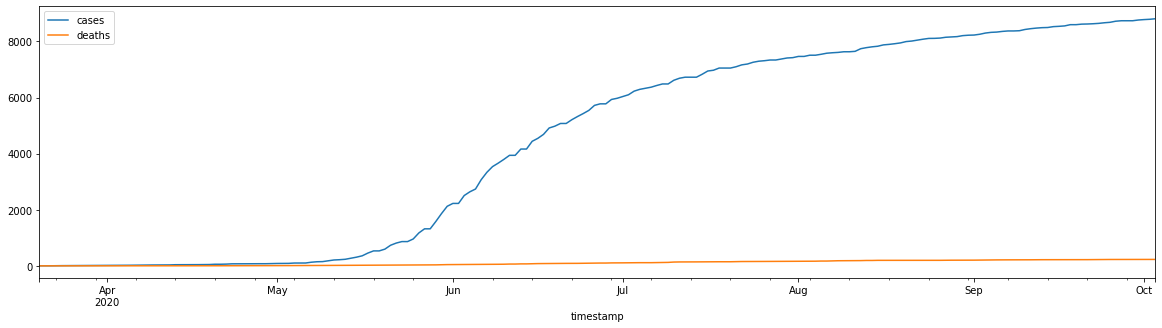

HUN


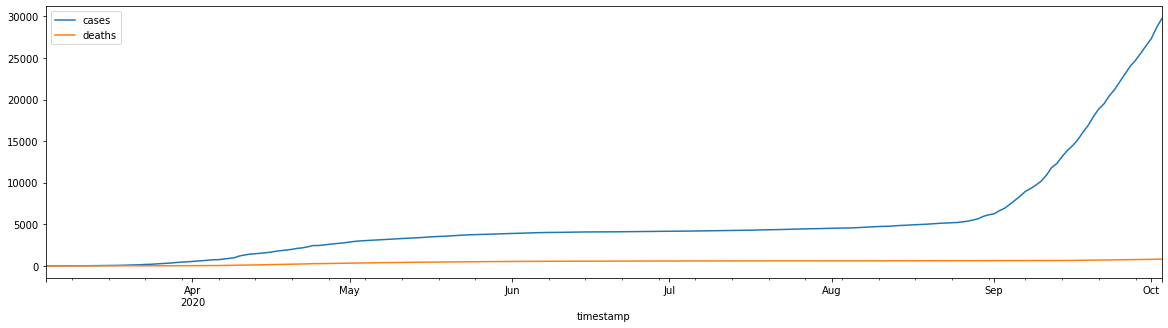

IDN


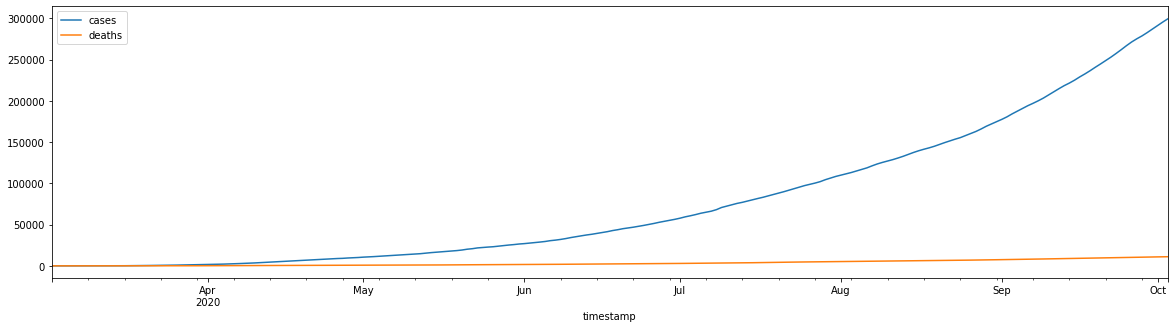

IND


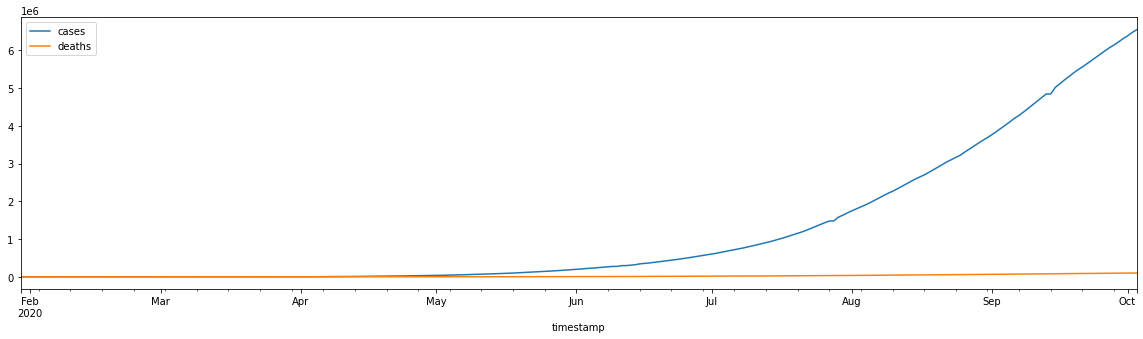

IRL


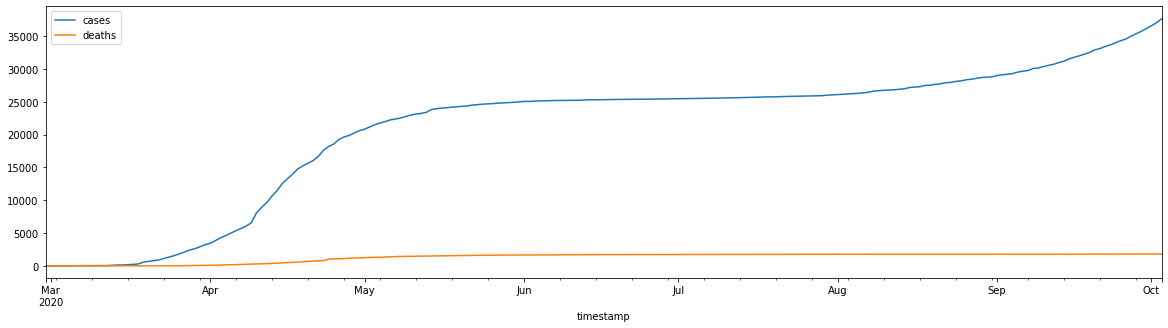

IRN


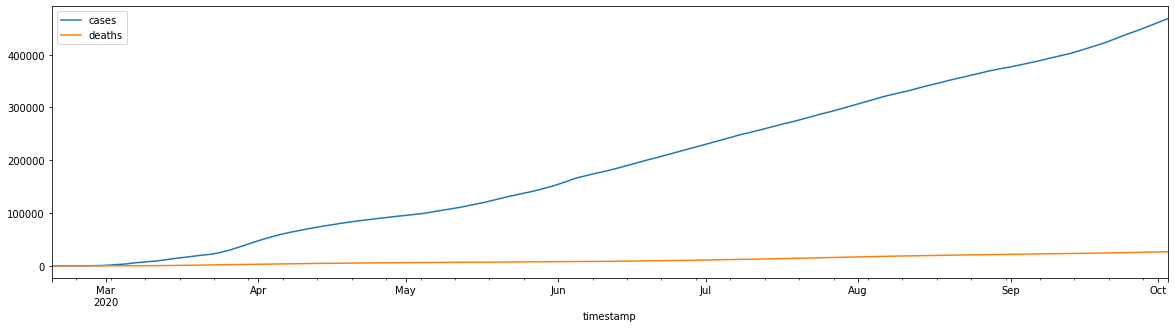

IRQ


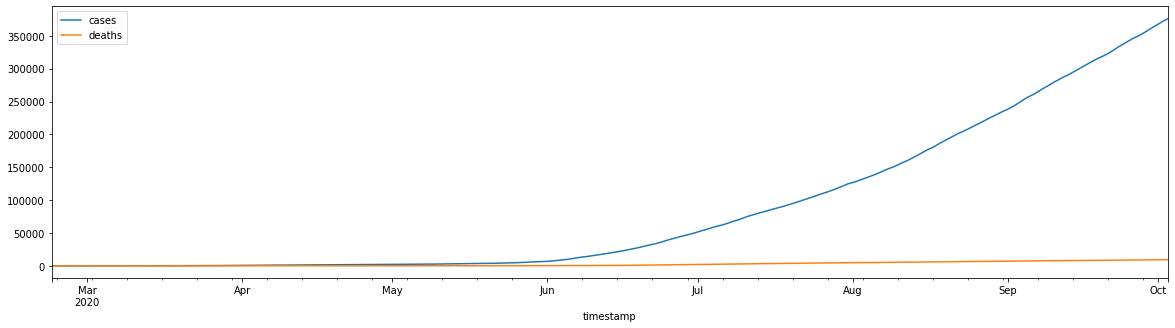

ISL


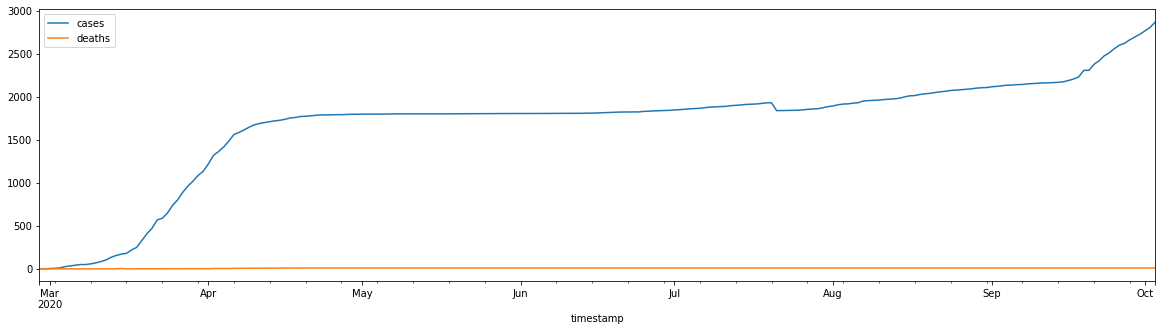

ISR


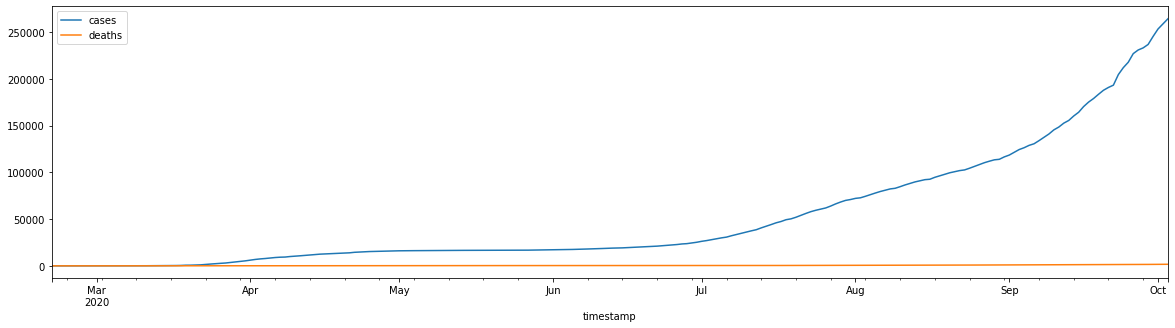

ITA


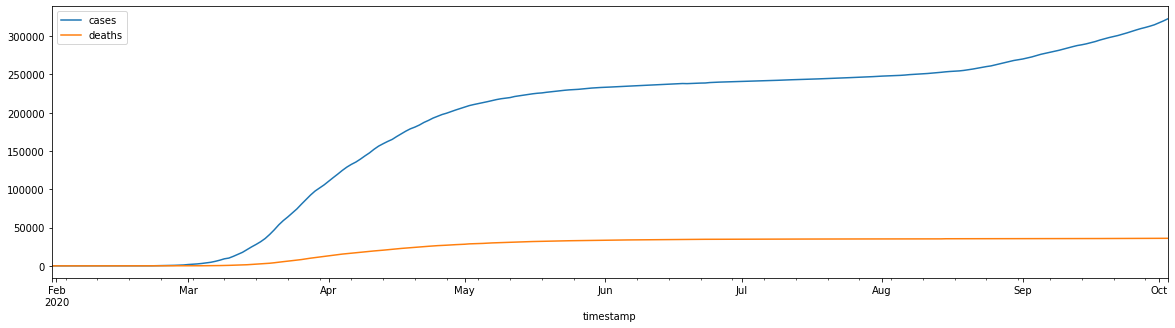

JAM


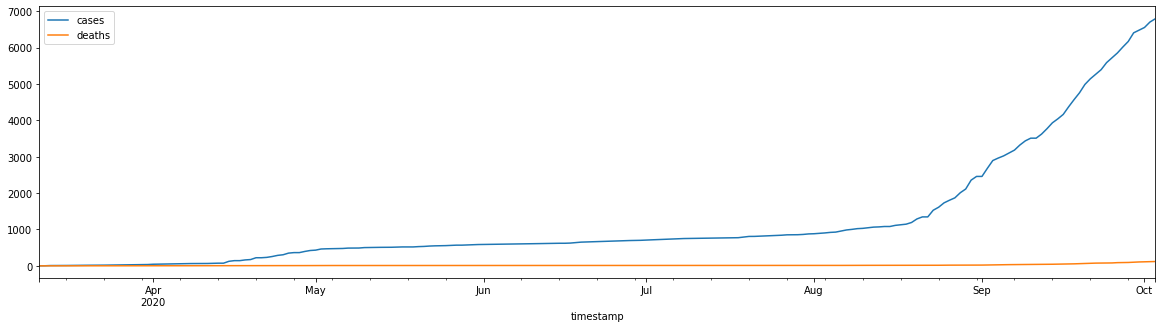

JEY


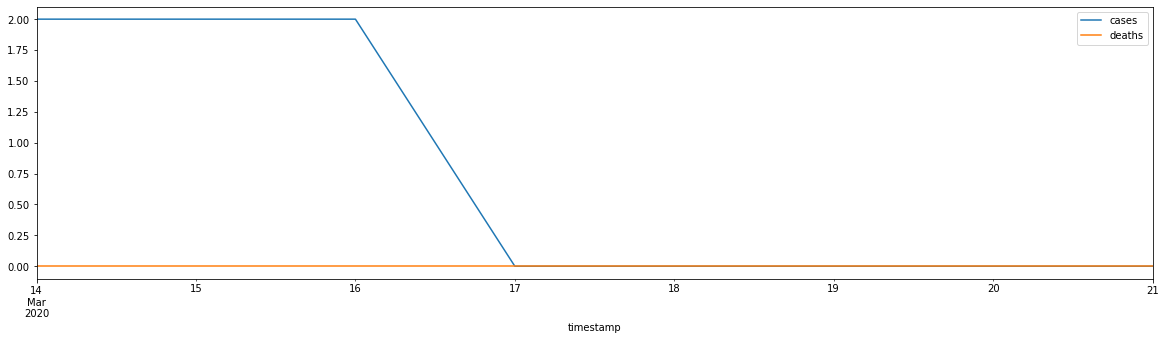

JOR


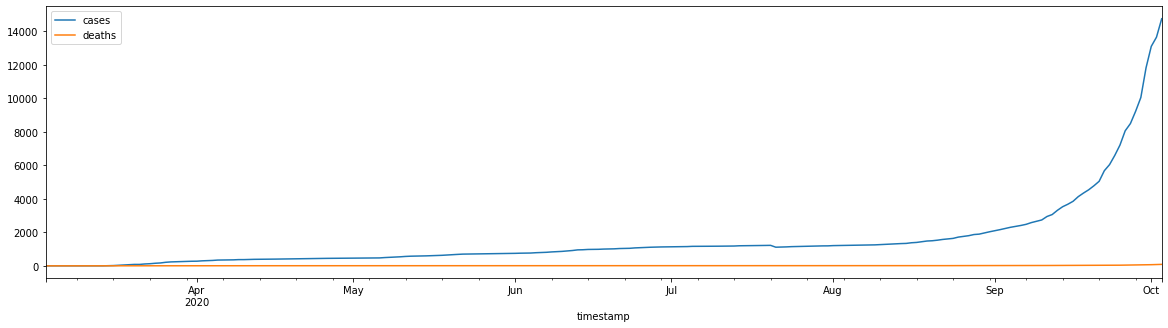

JPN


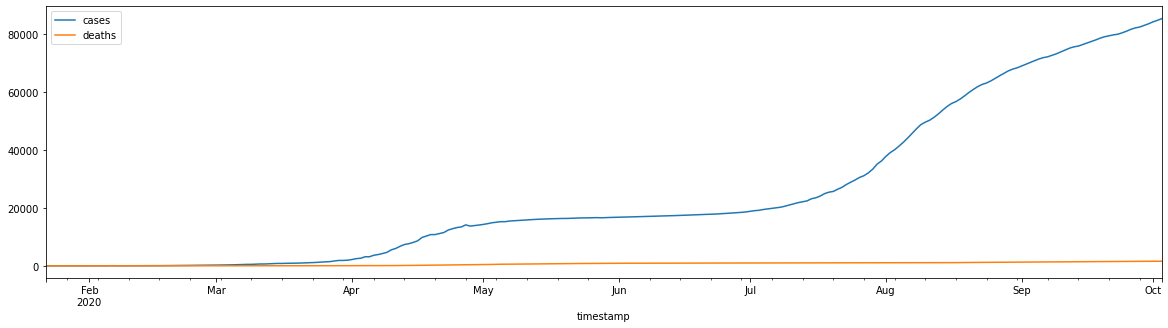

KAZ


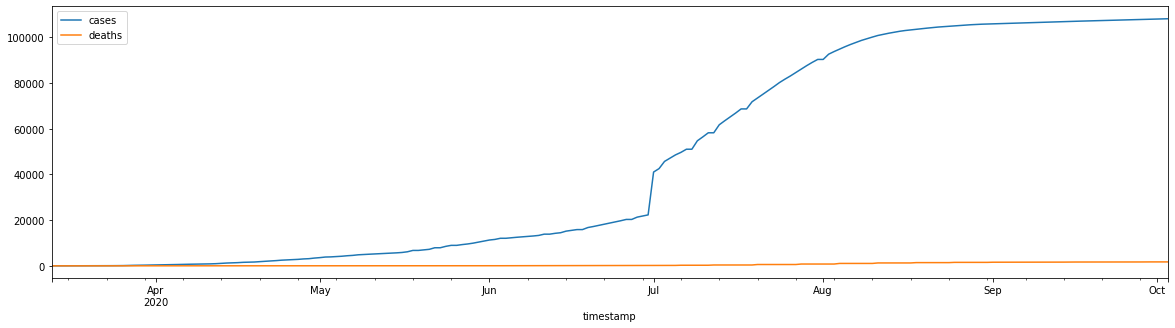

KEN


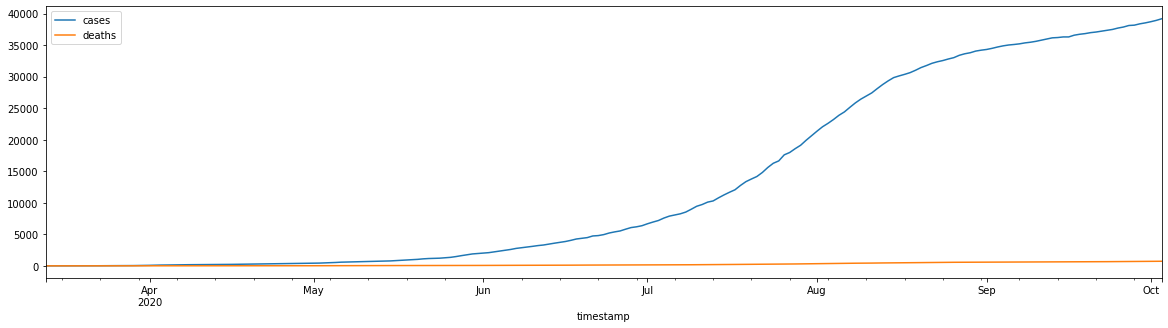

KGZ


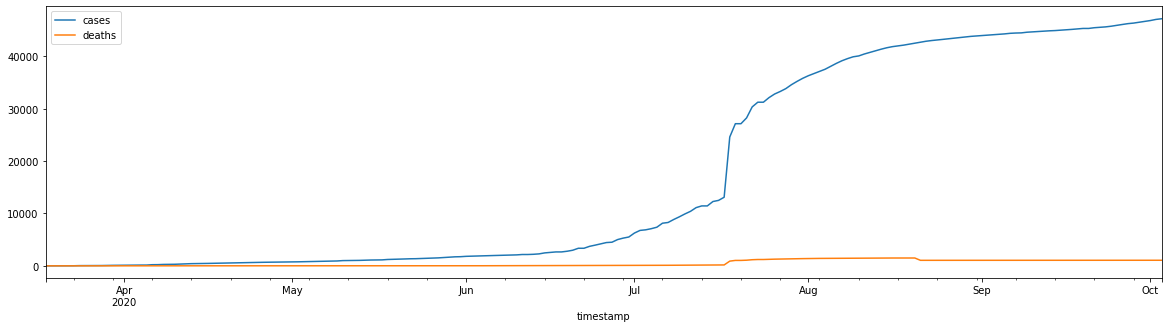

KHM


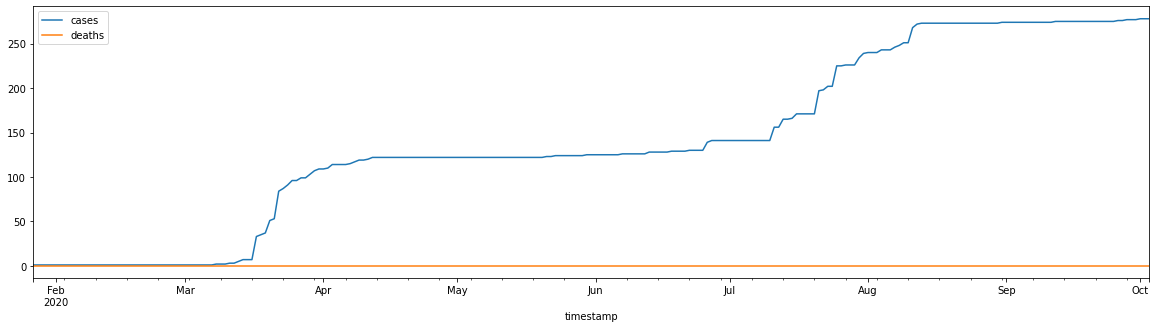

KNA


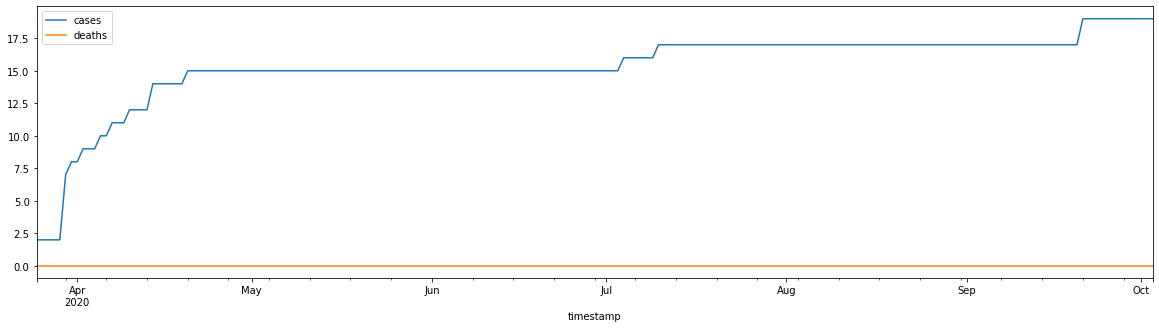

KOR


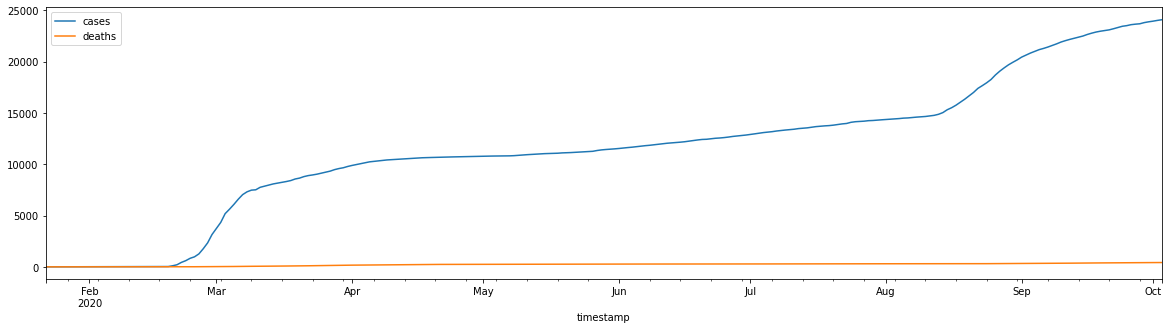

KWT


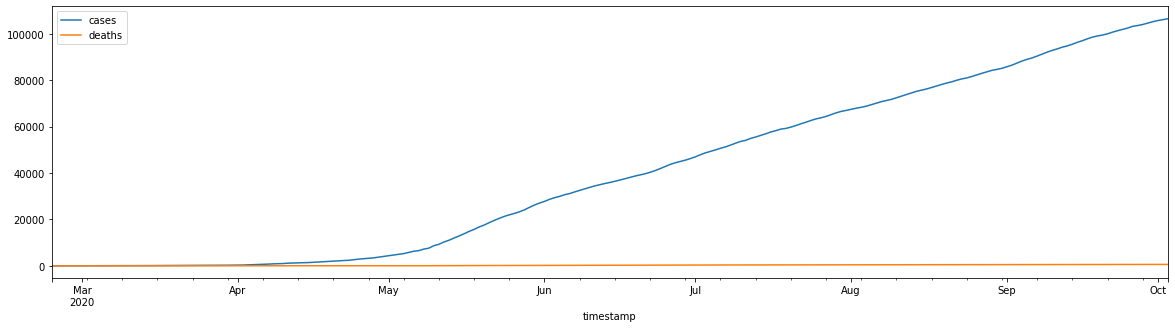

LAO


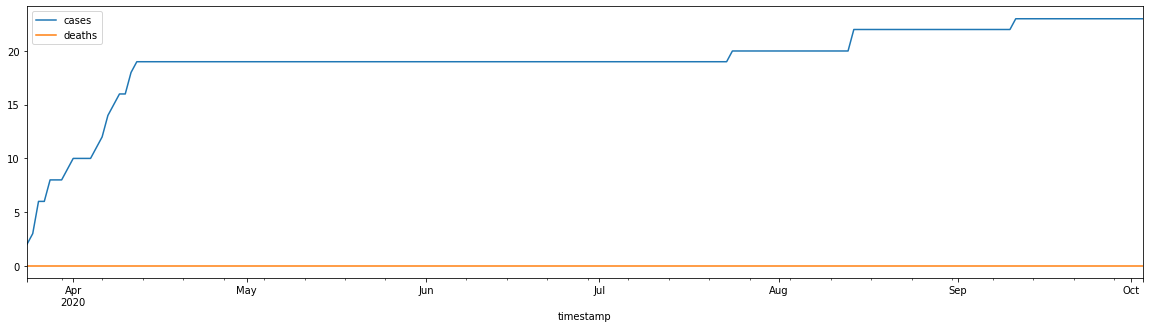

LBN


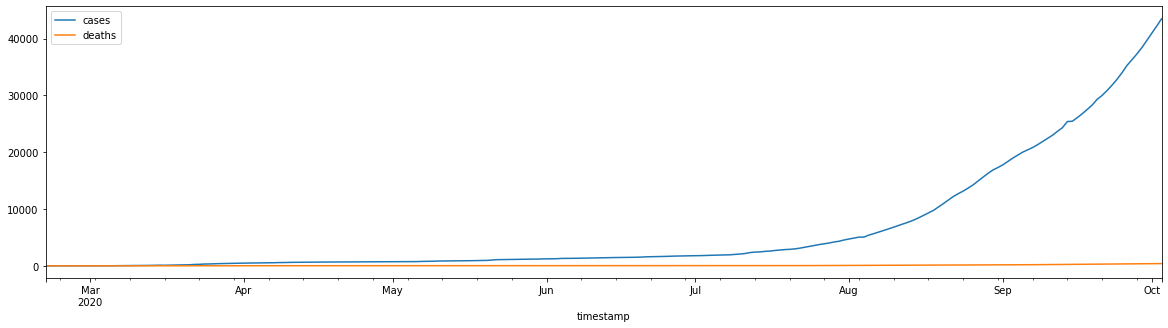

LBR


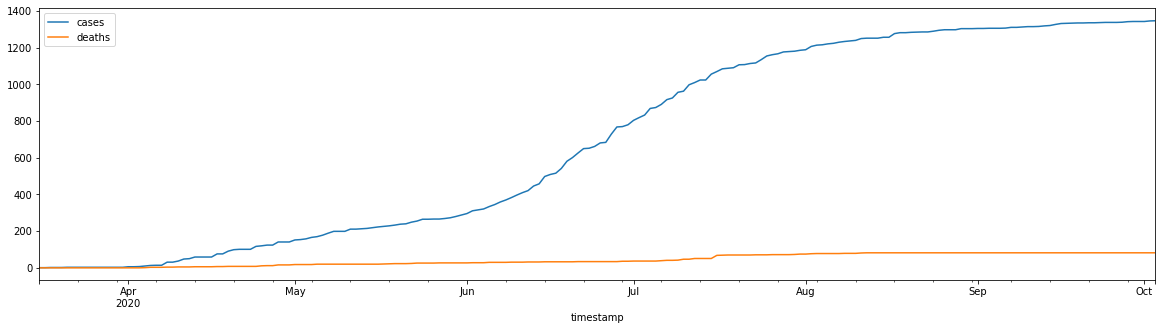

LBY


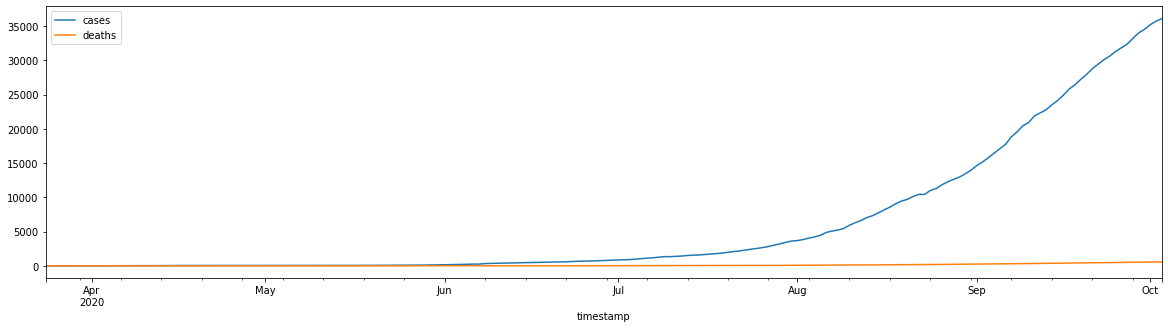

LCA


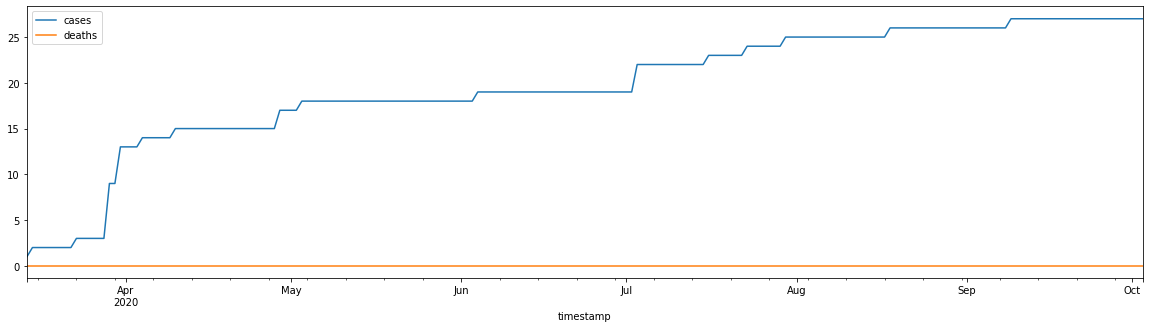

LIE


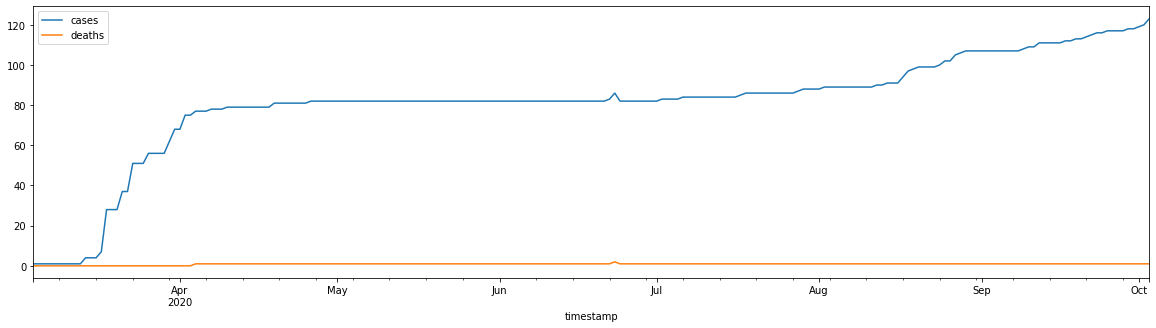

LKA


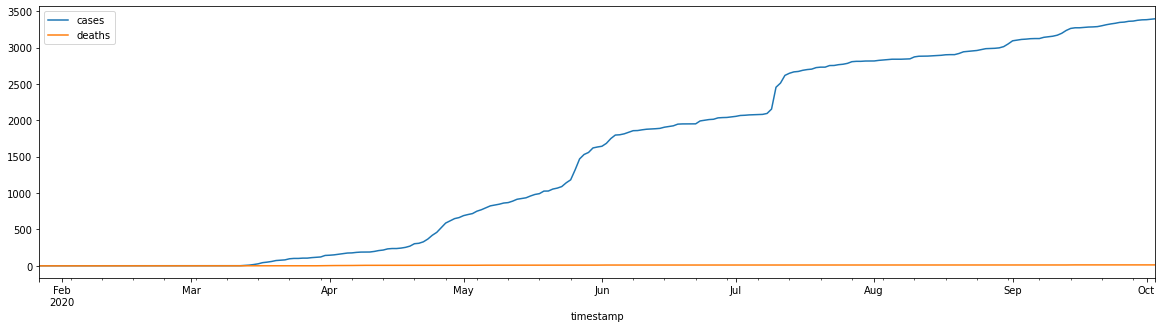

LSO


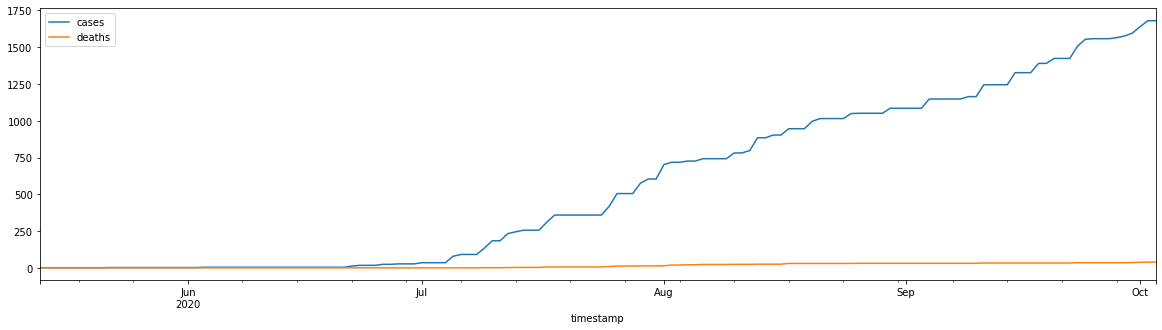

LTU


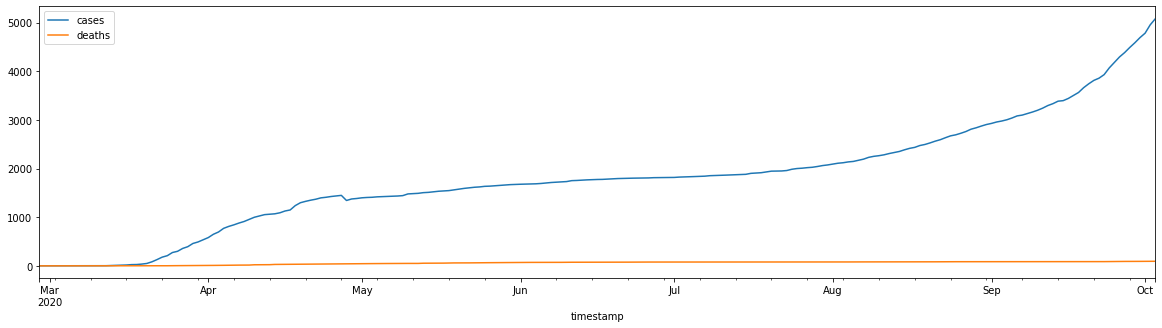

LUX


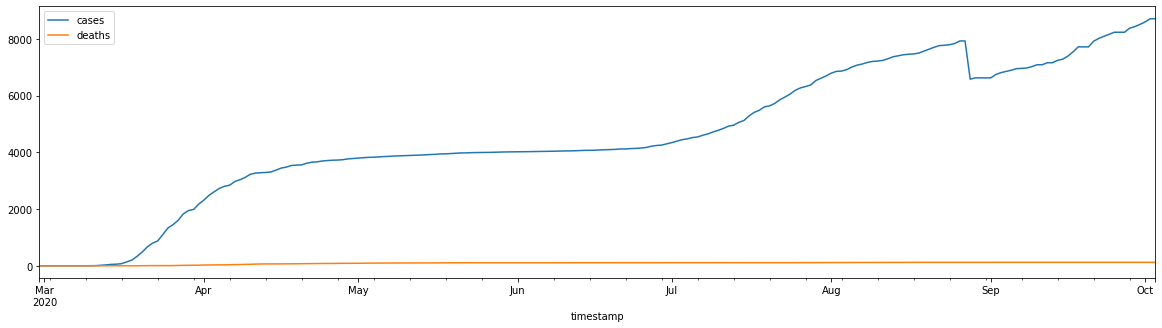

LVA


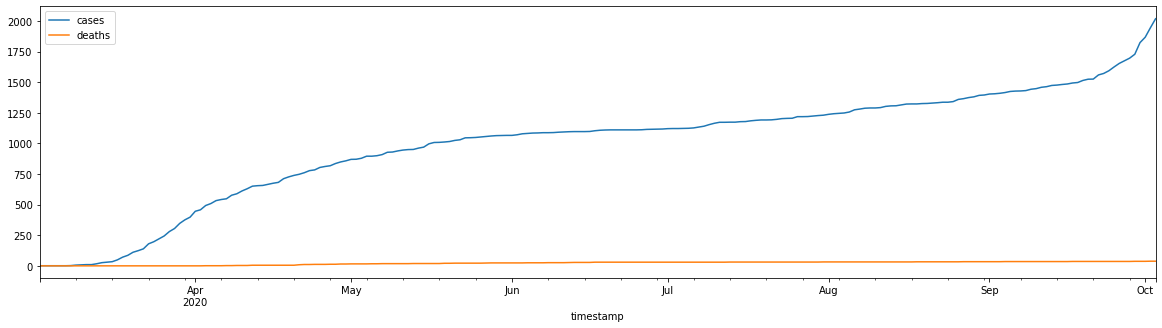

MAC


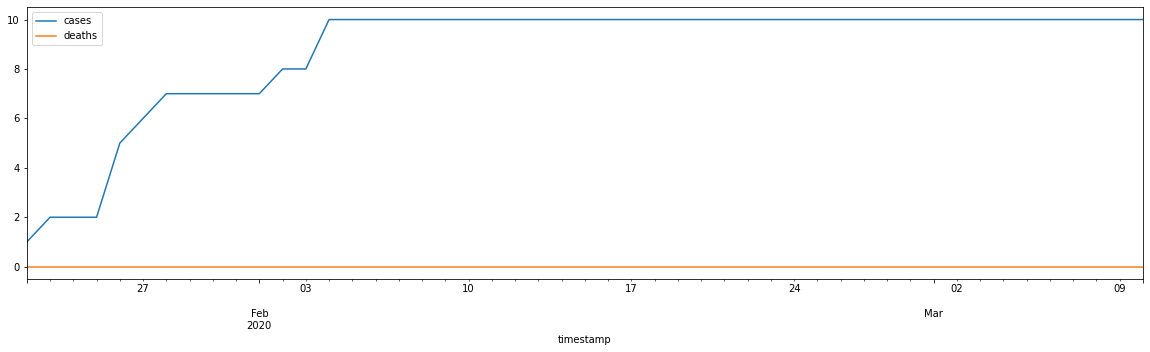

MAF


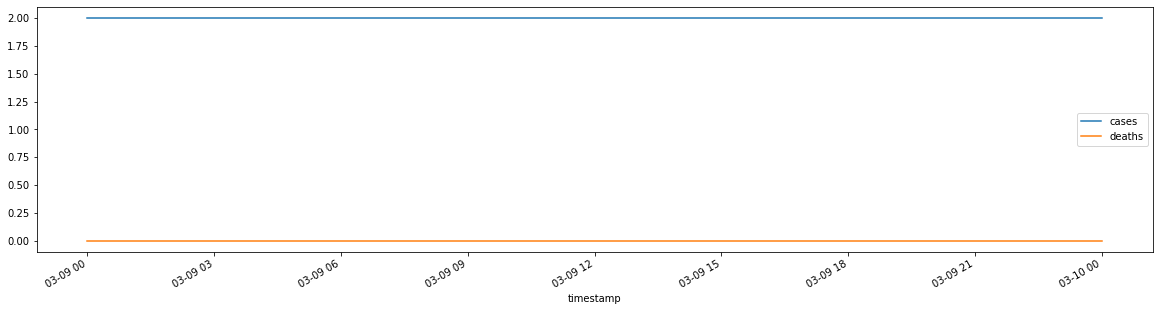

MAR


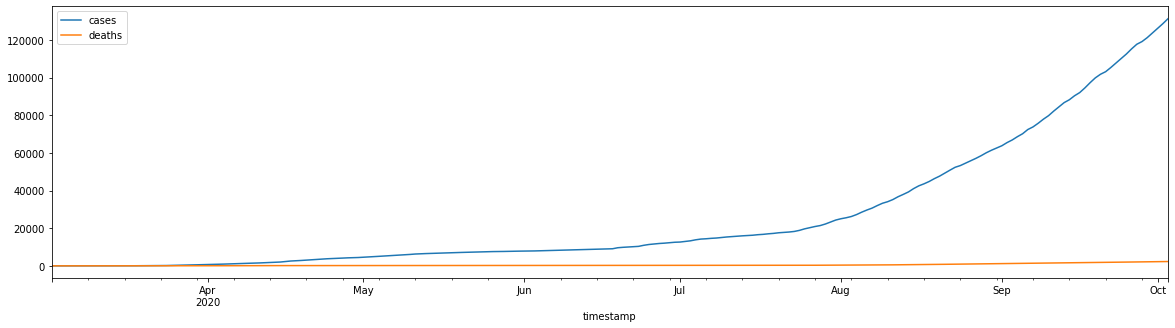

MCO


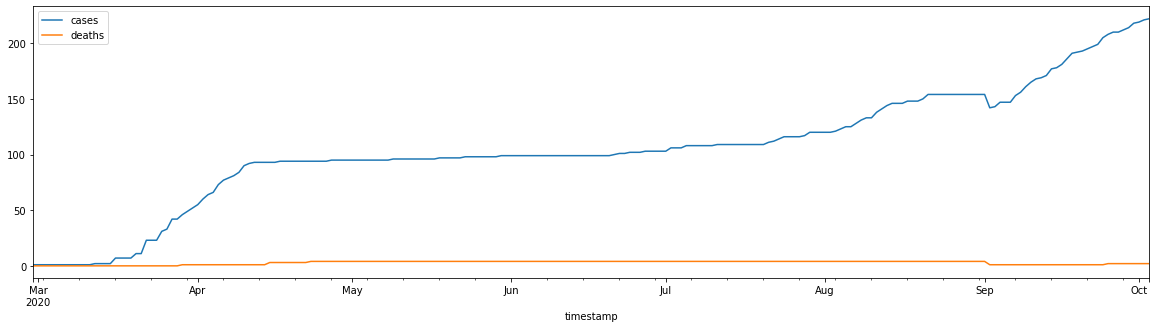

MDA


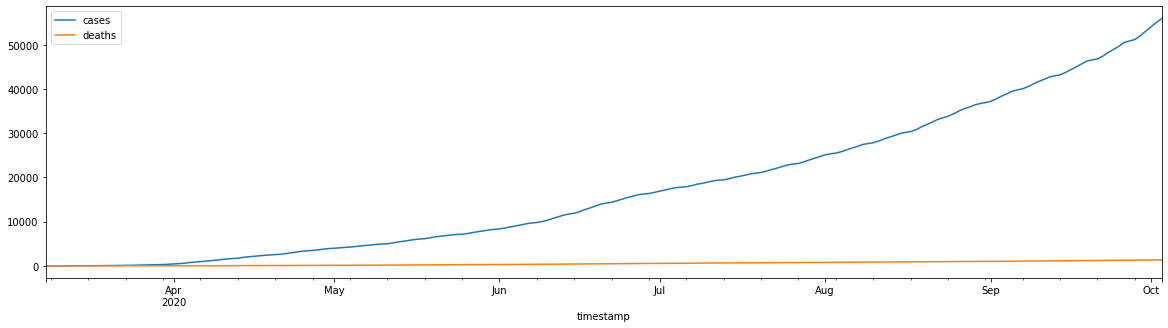

MDG


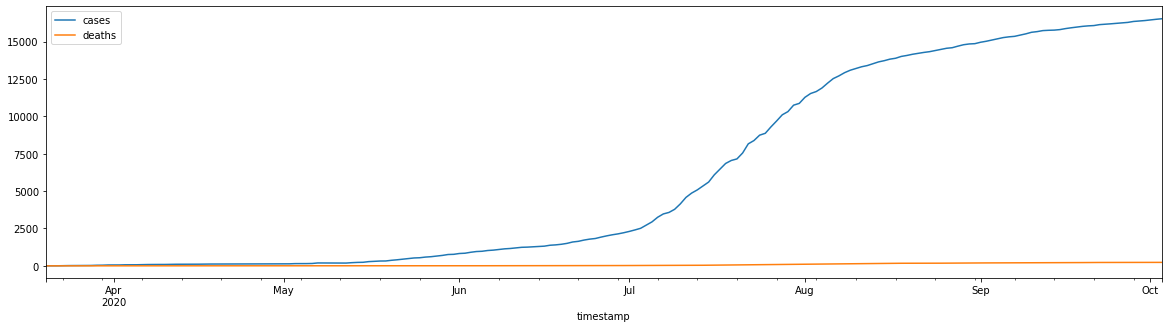

MDV


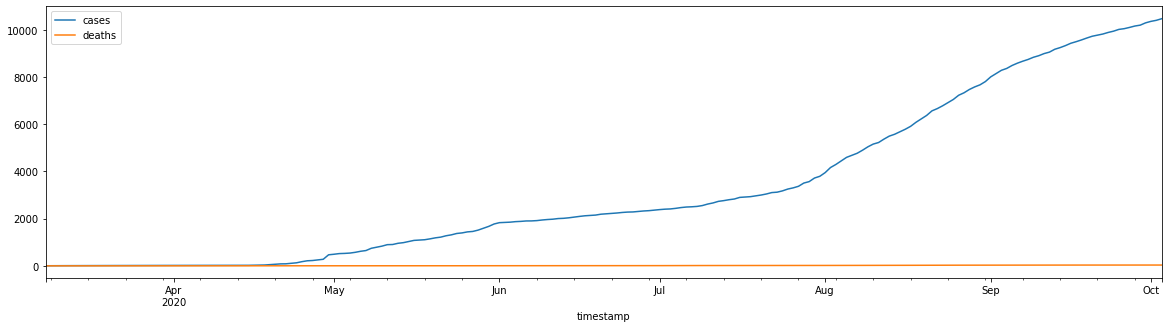

MEX


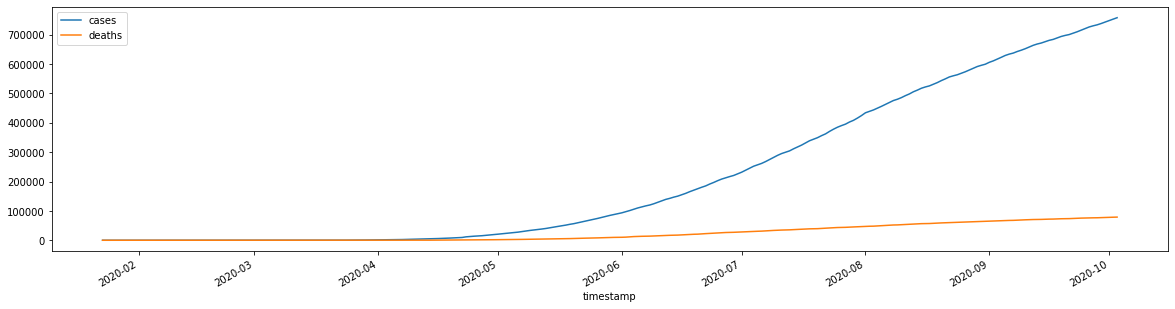

MKD


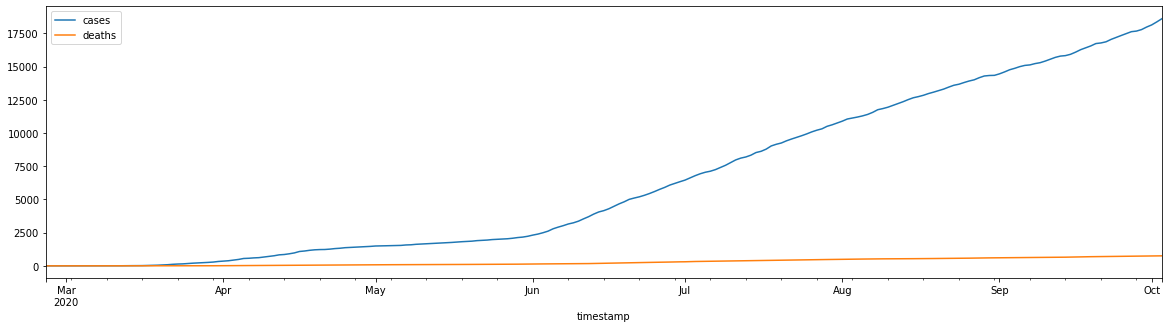

MLI


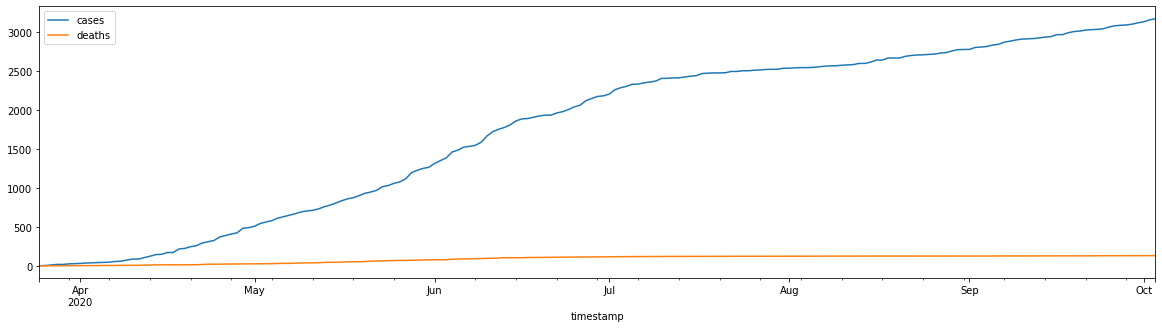

MLT


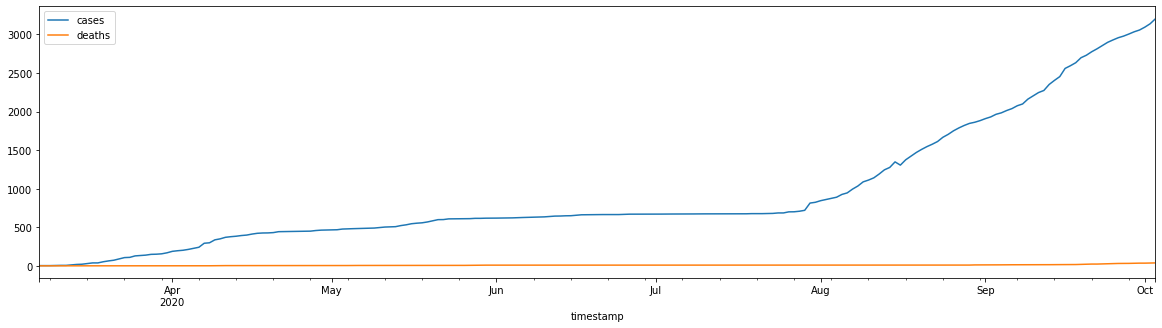

MMR


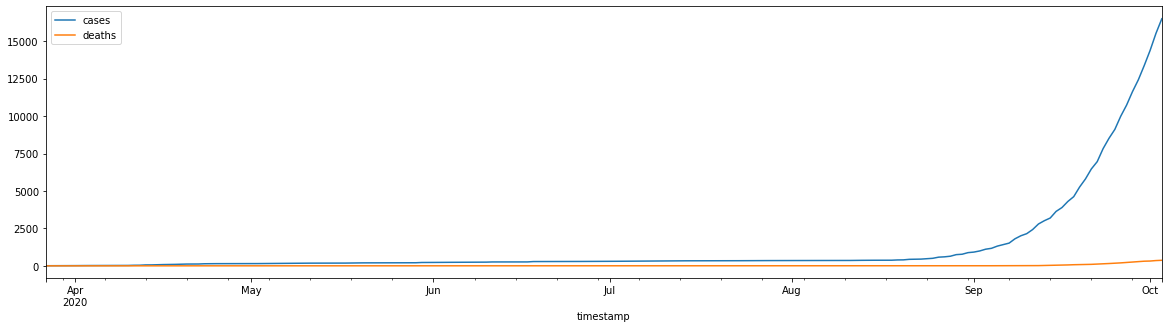

MNE


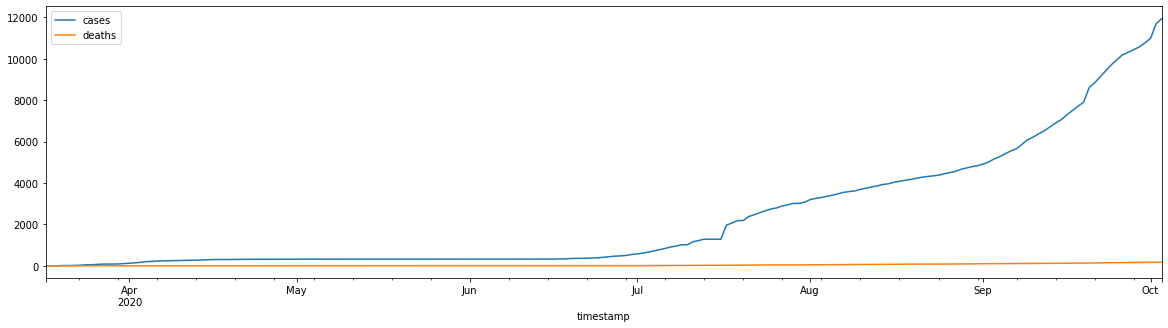

MNG


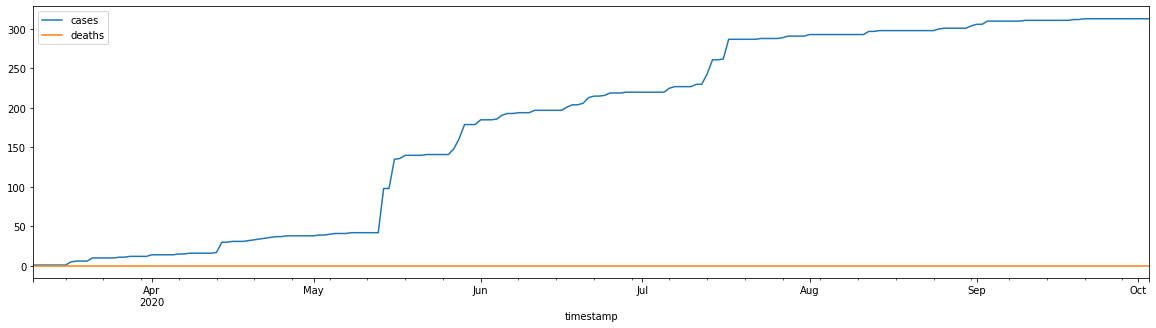

MOZ


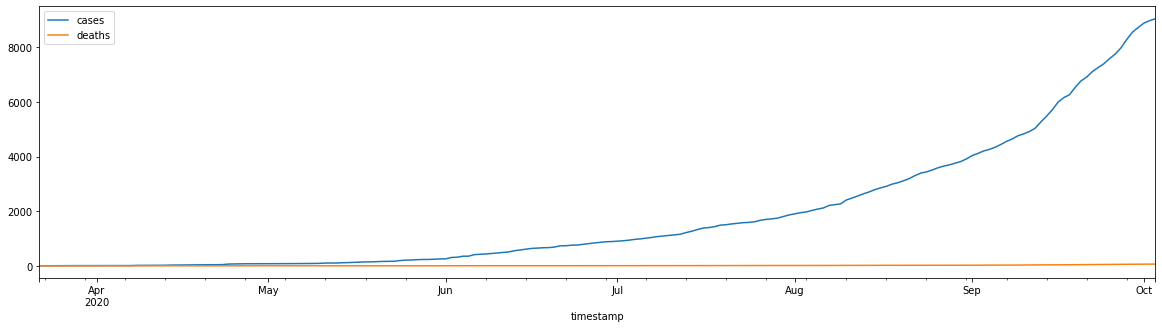

MRT


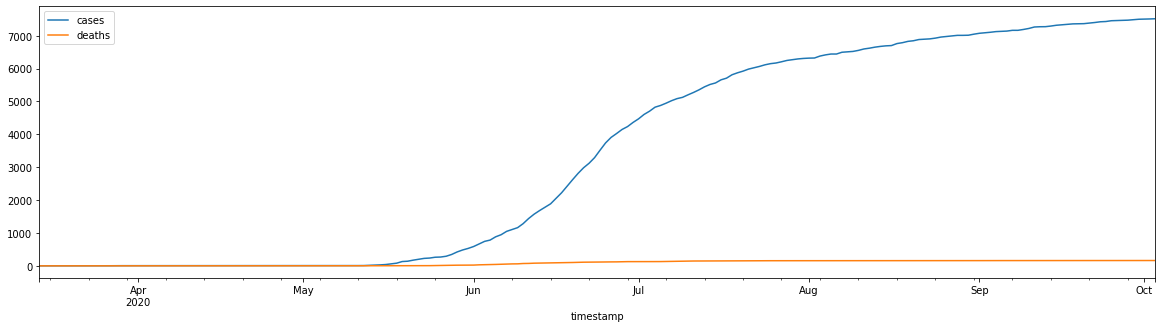

MTQ


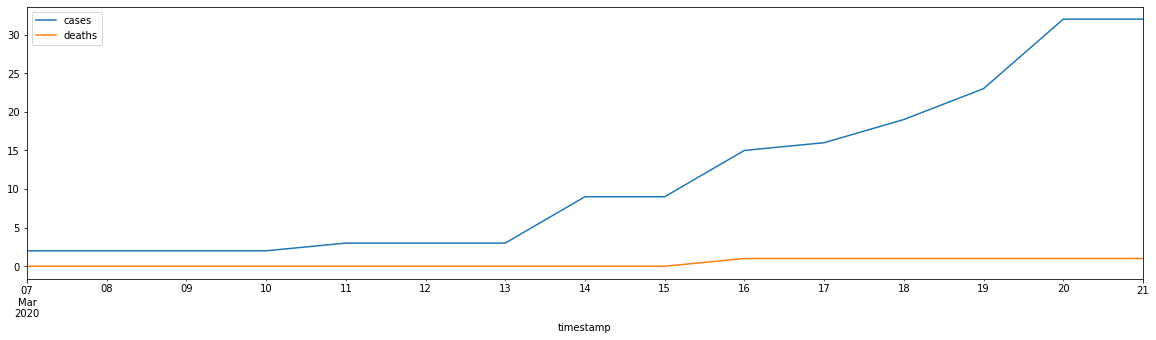

MUS


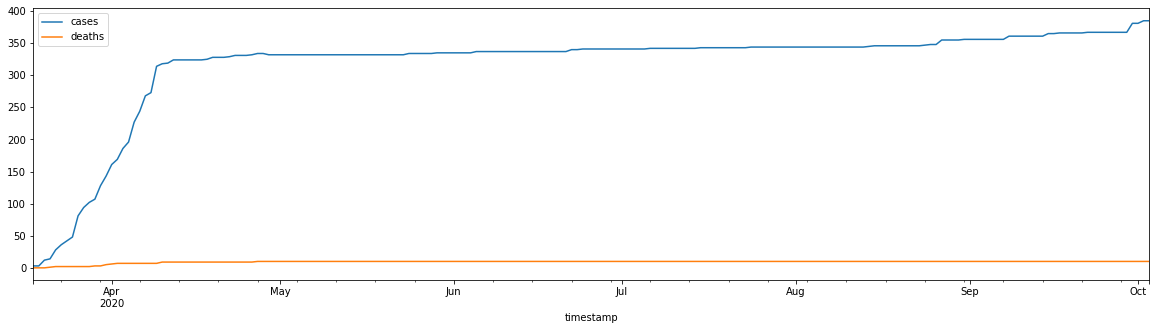

MWI


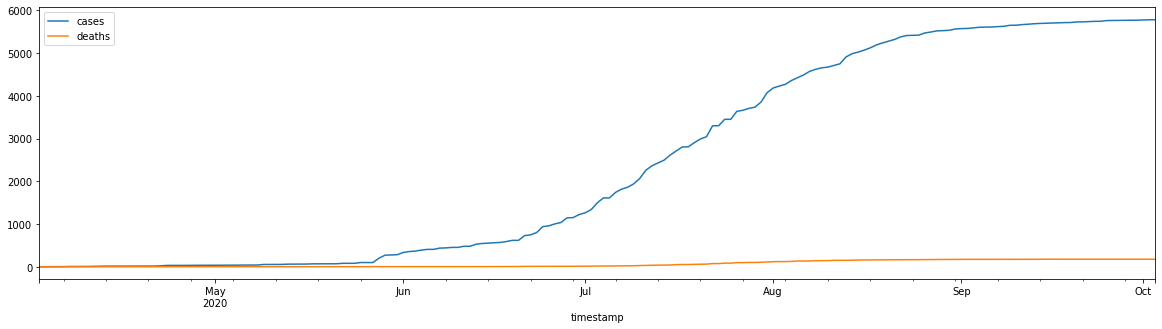

MYS


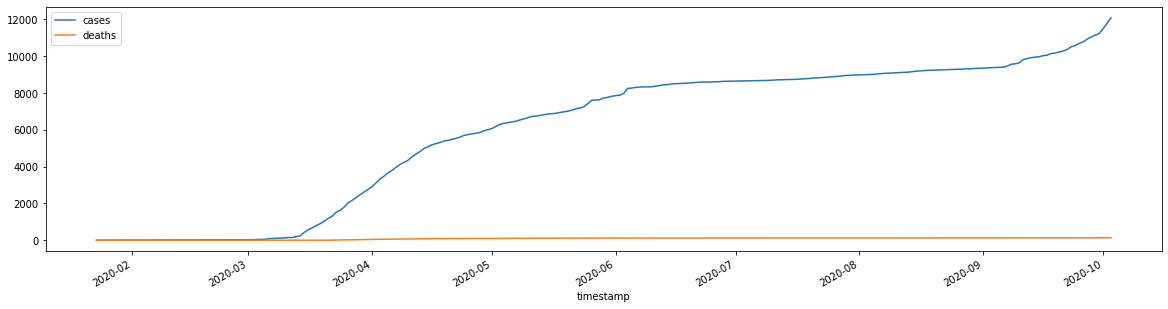

MYT


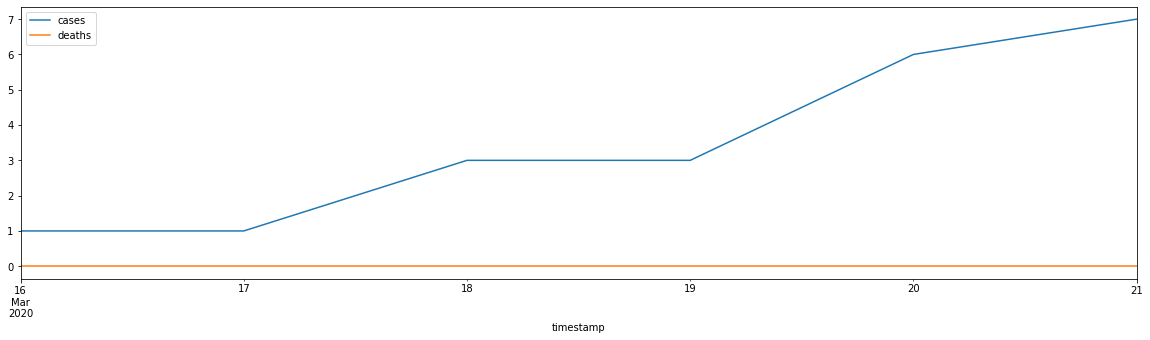

NAM


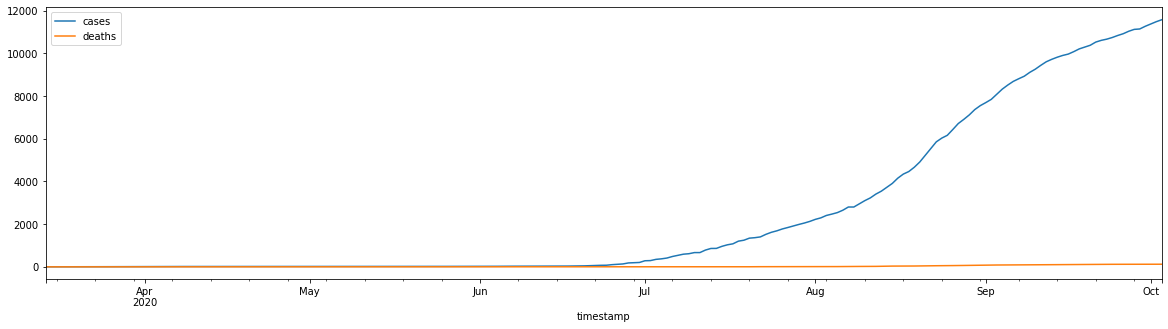

NGA


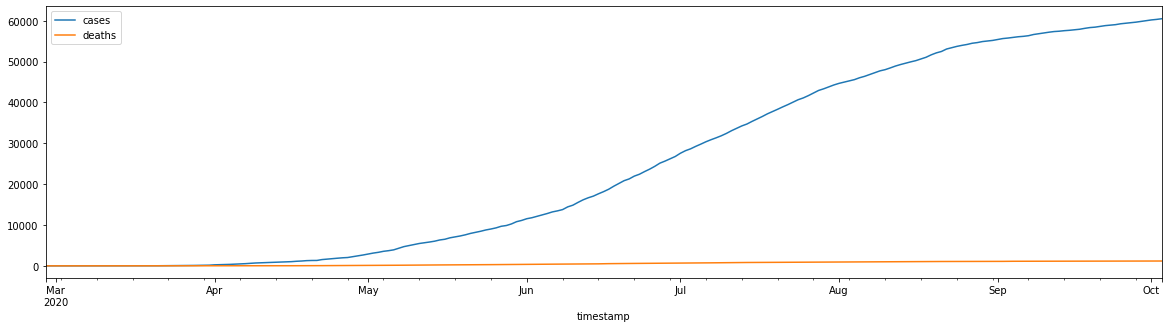

NIC


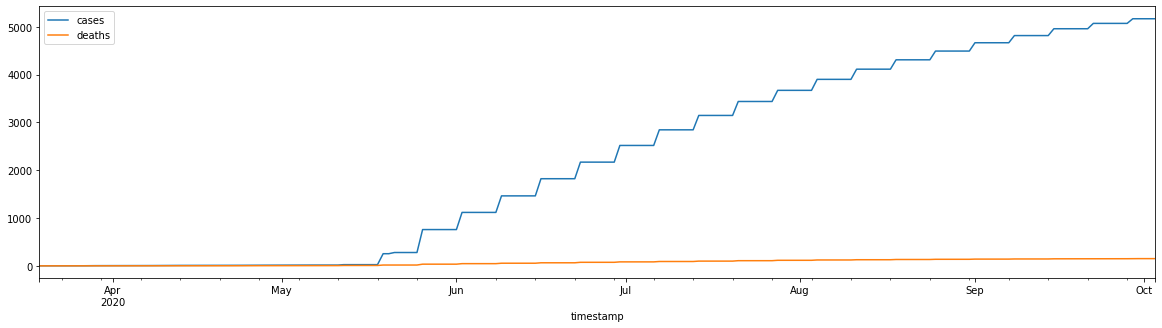

NLD


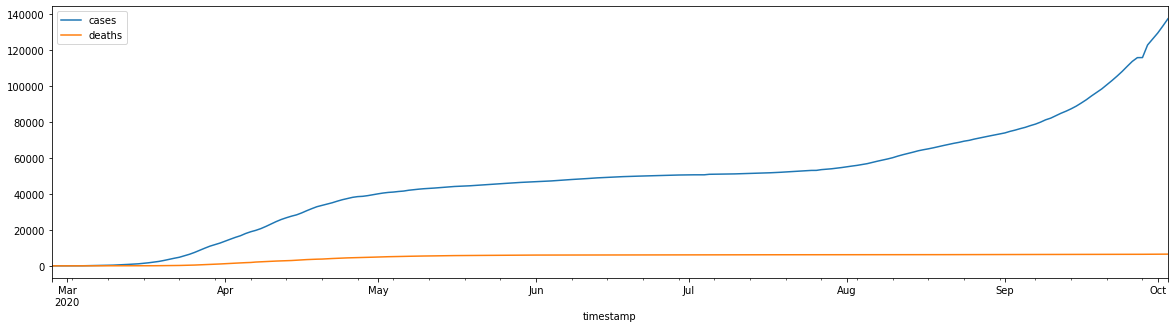

NOR


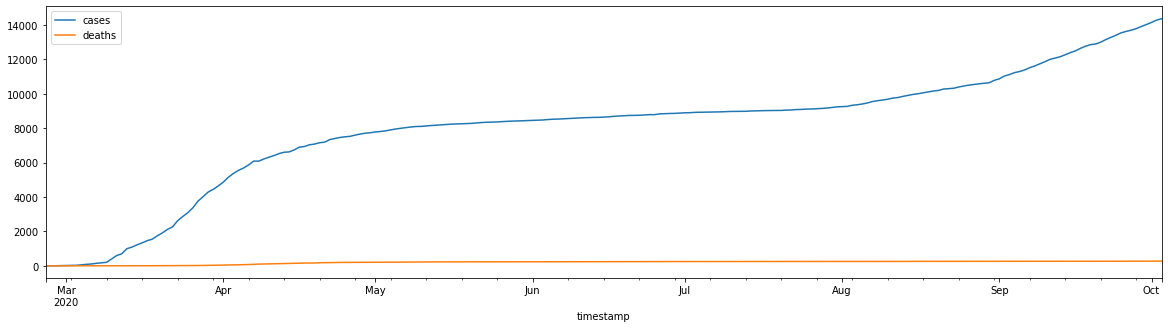

NPL


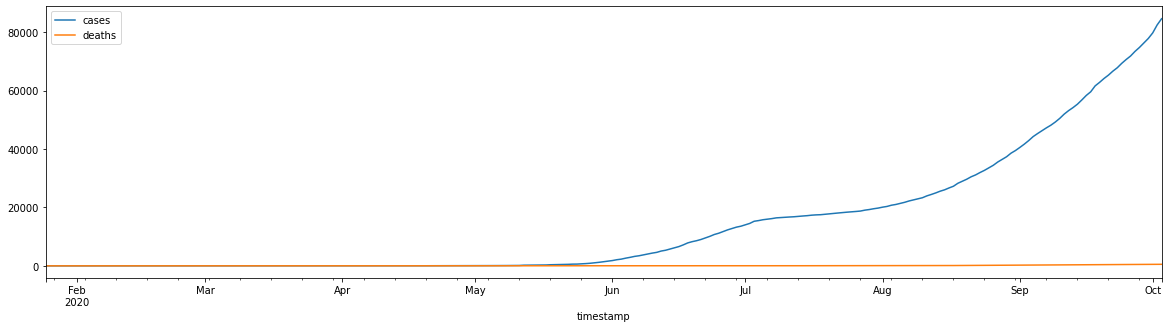

NZL


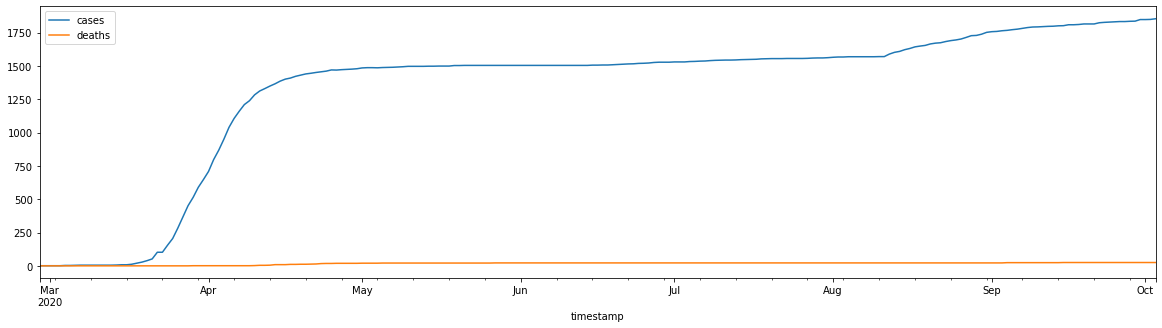

OMN


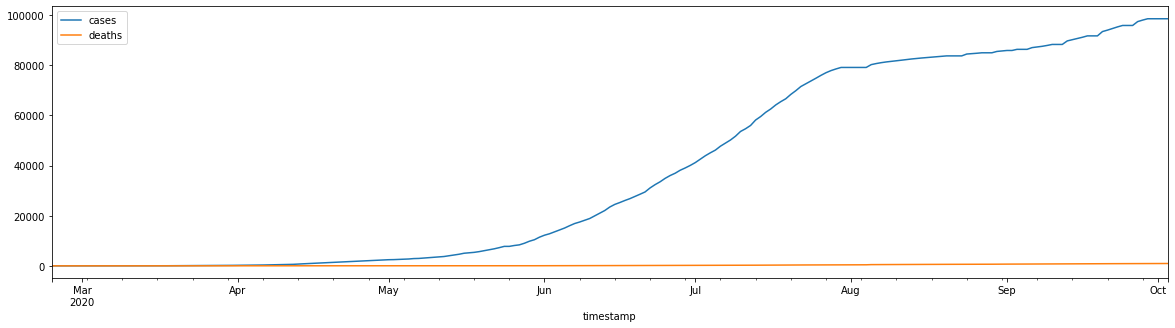

PAK


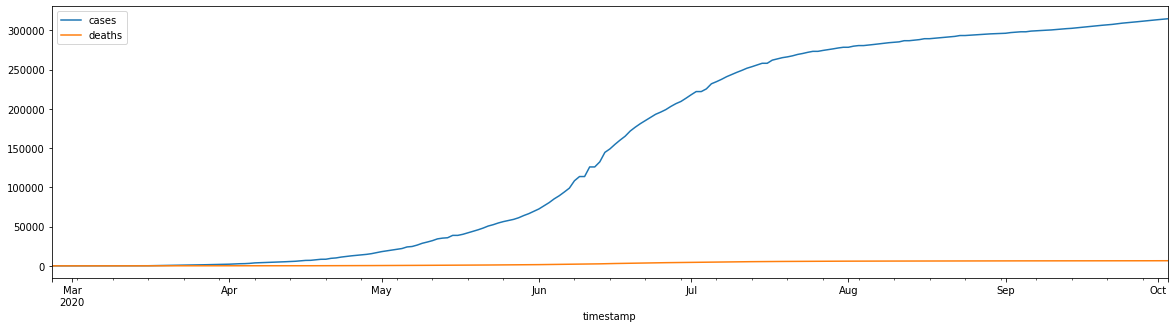

PAN


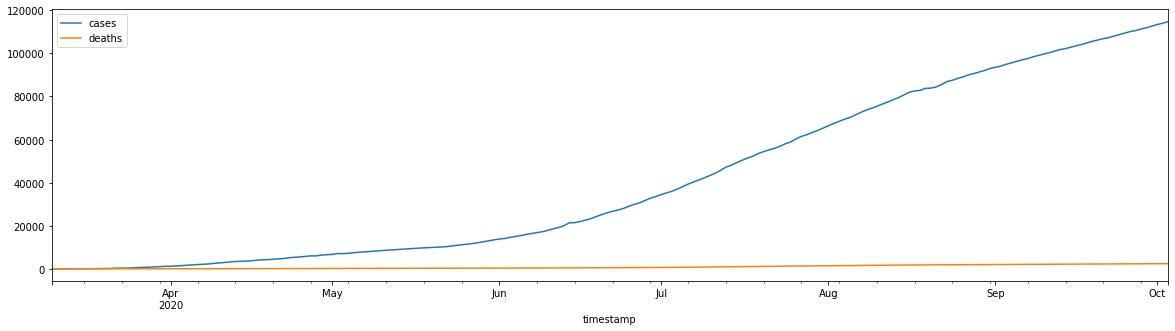

PER


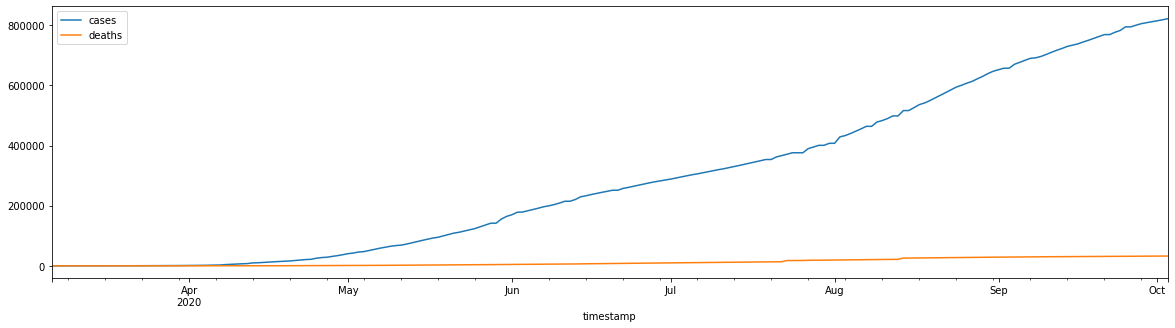

PHL


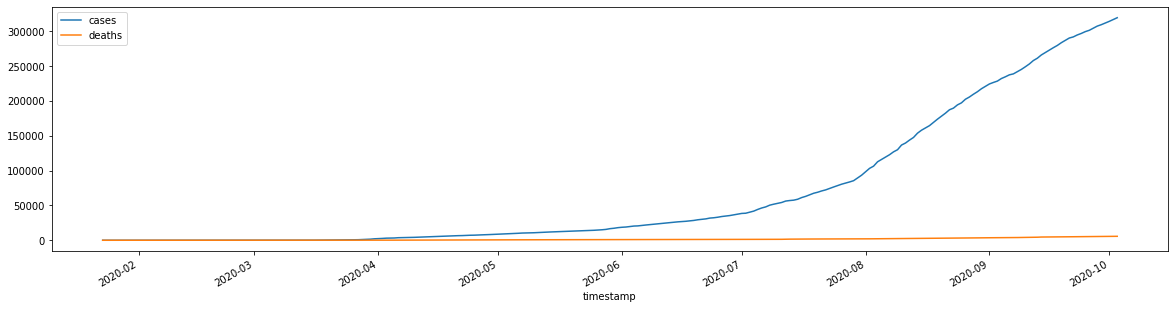

PNG


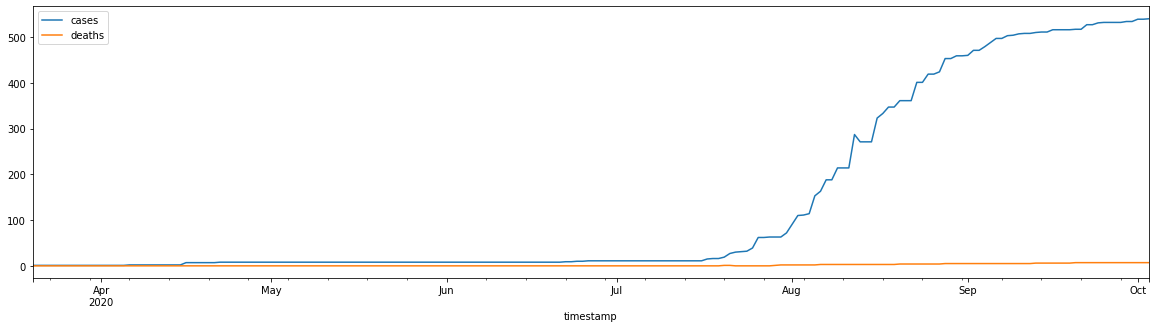

POL


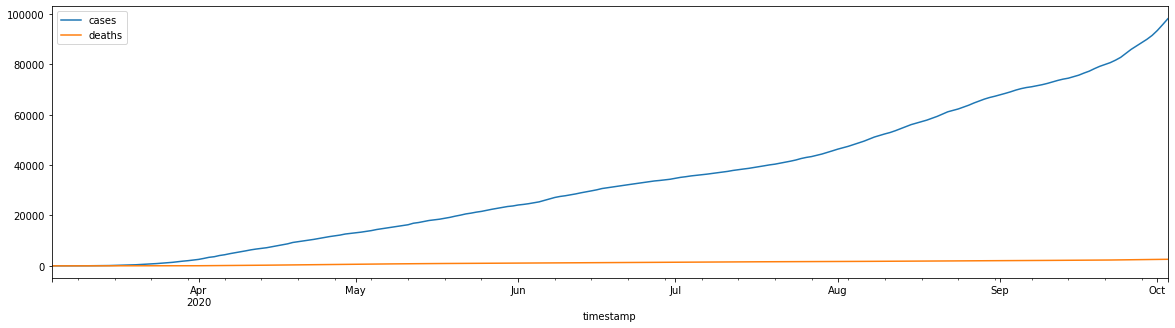

PRI


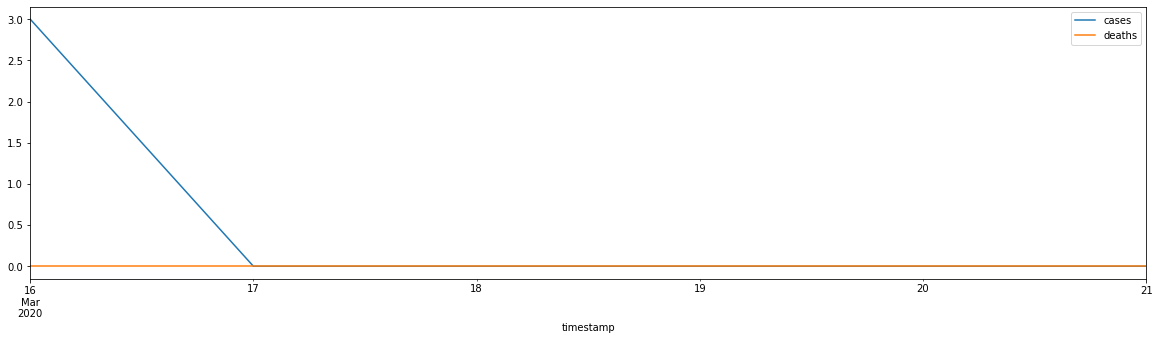

PRT


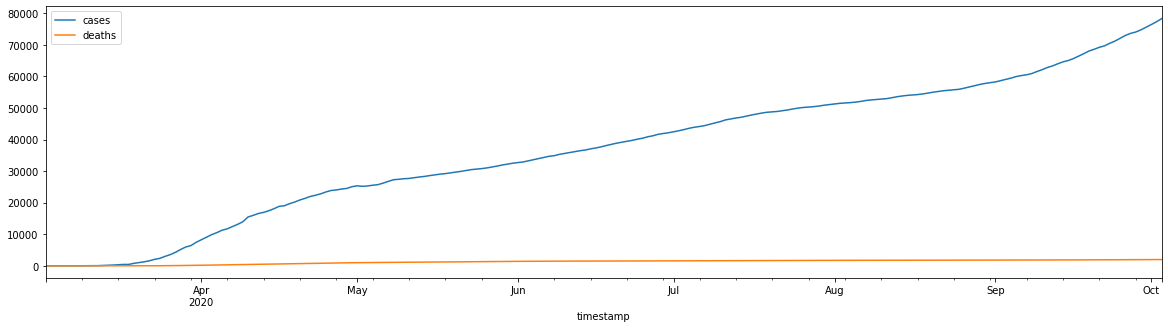

PRY


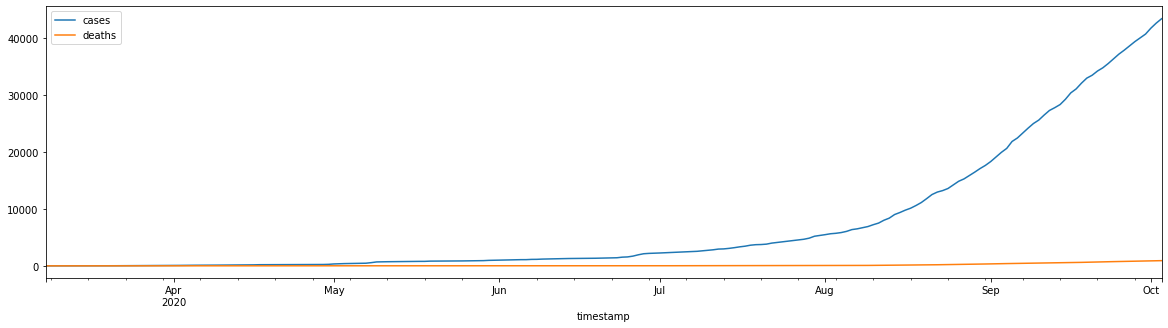

PSE


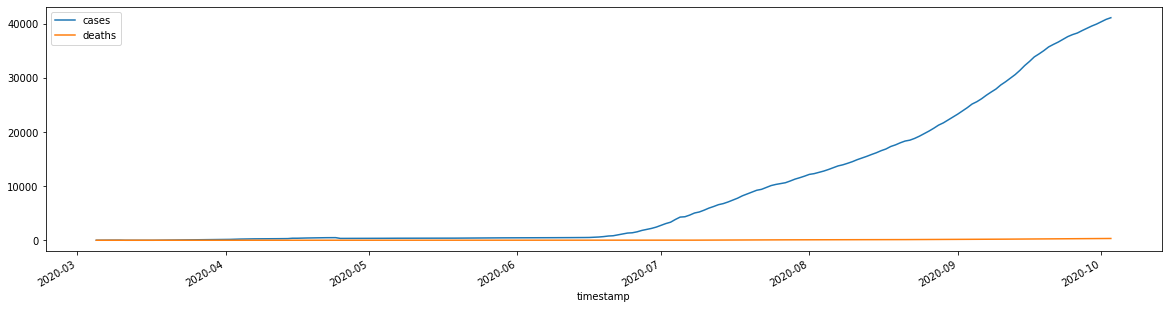

QAT


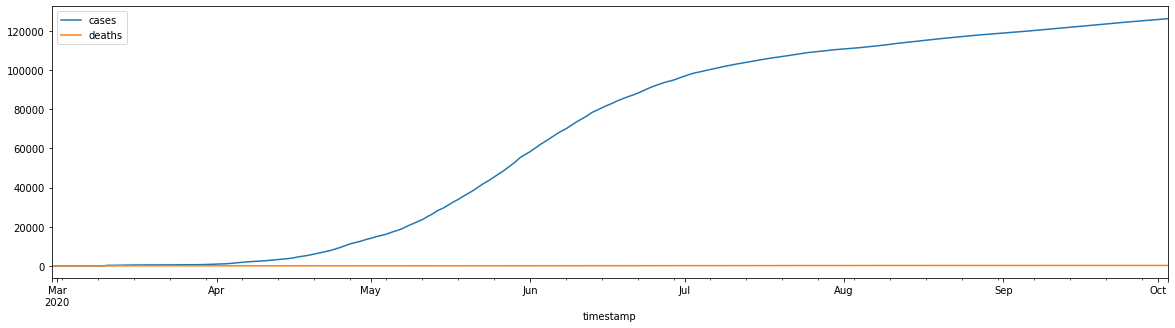

REU


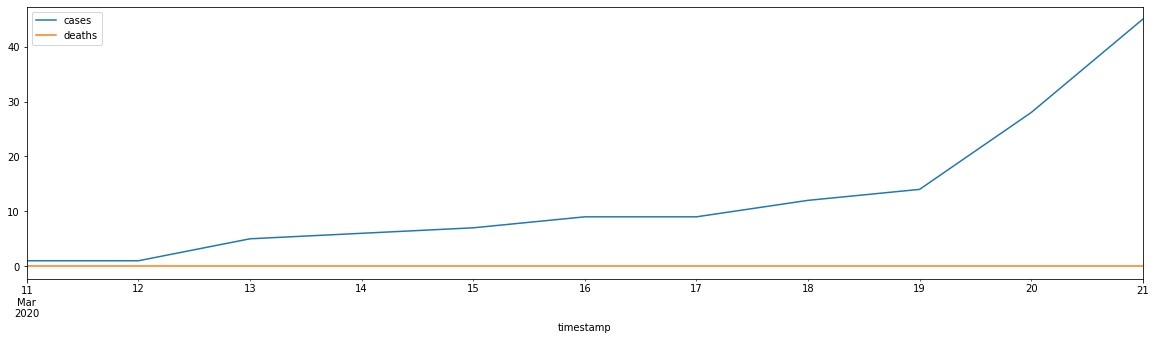

ROU


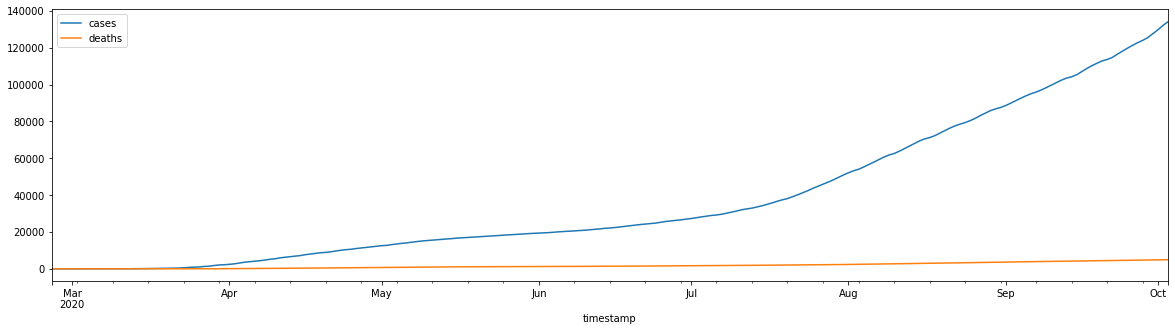

RUS


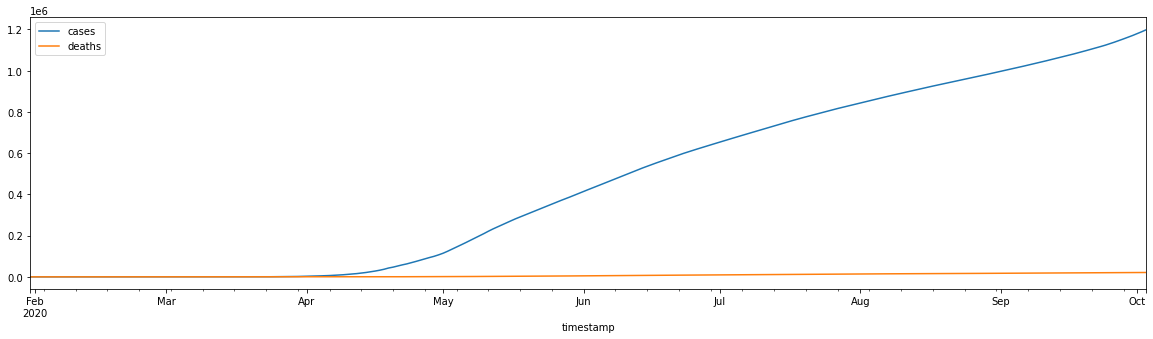

RWA


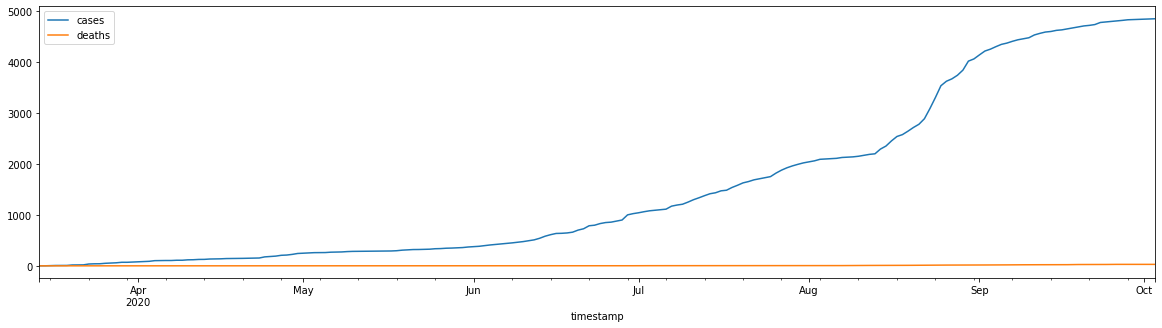

SAU


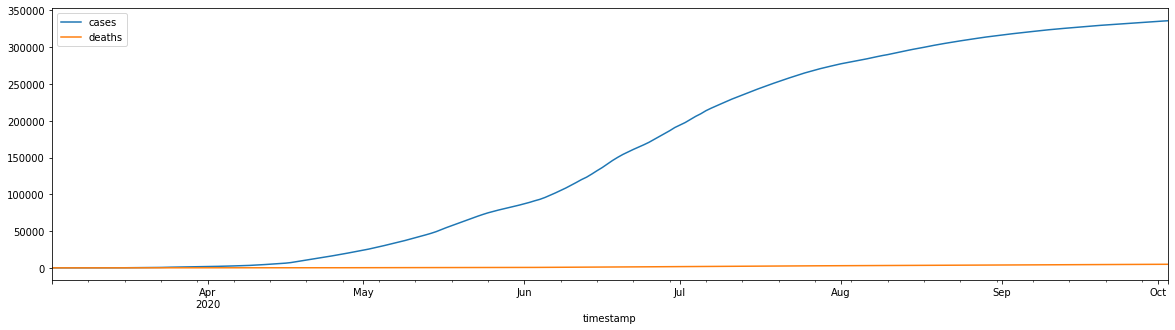

SDN


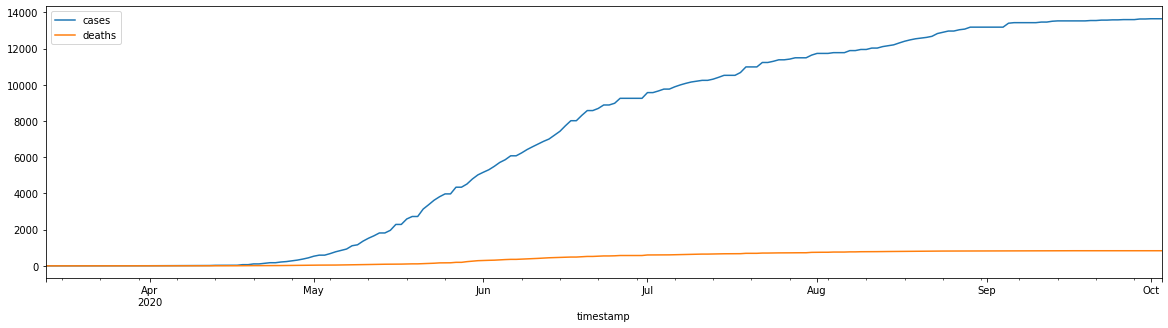

SEN


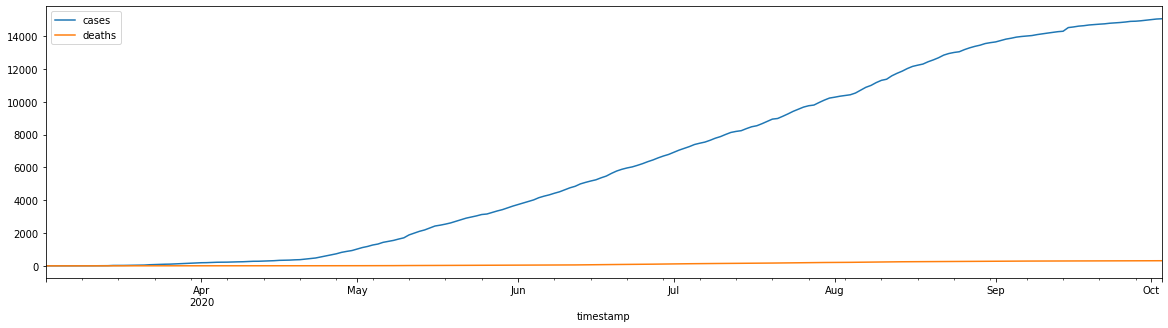

SGP


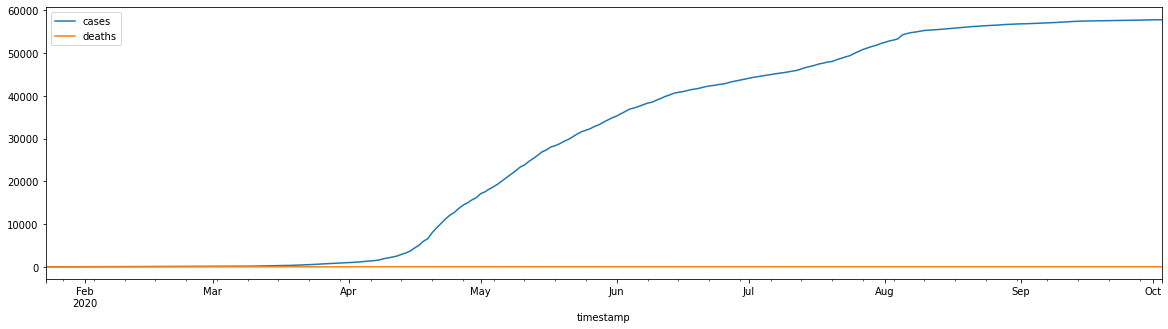

SLE


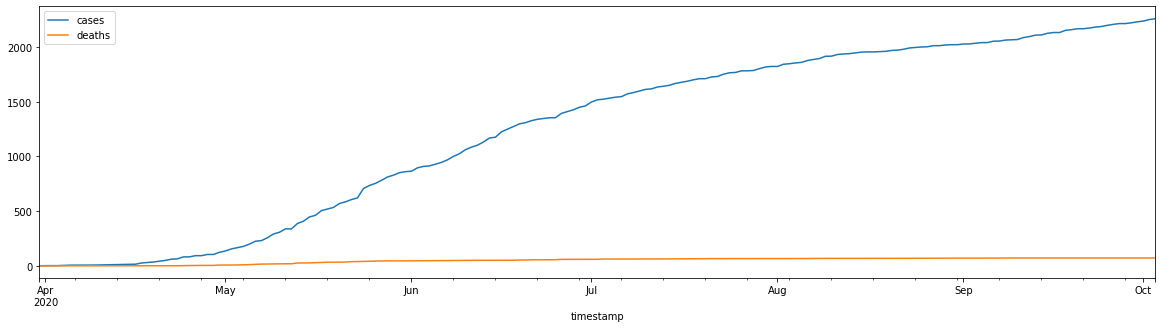

SLV


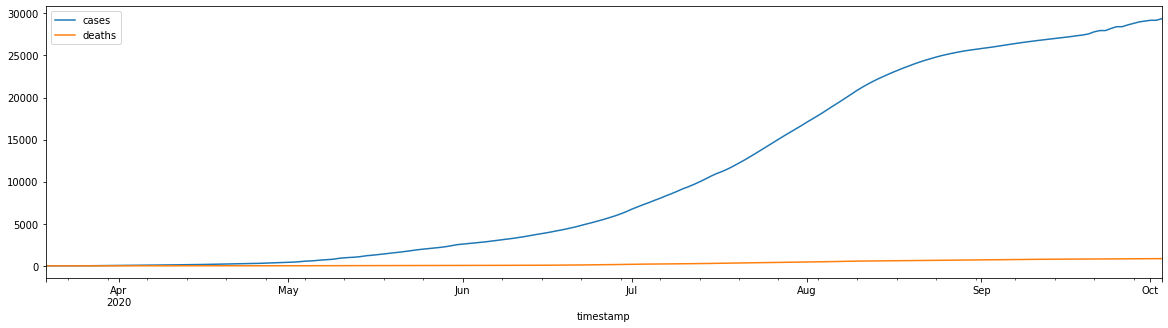

SMR


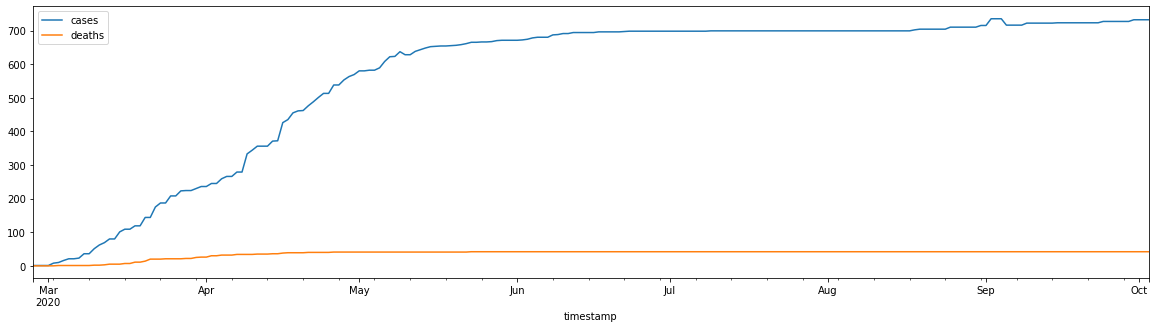

SOM


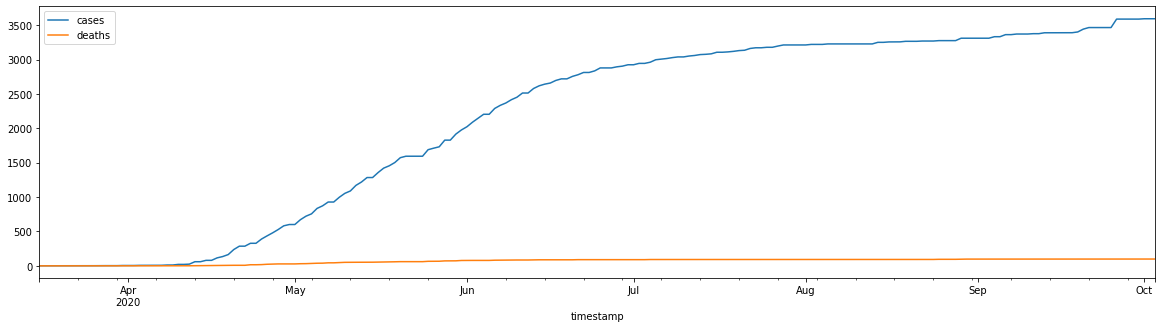

SRB


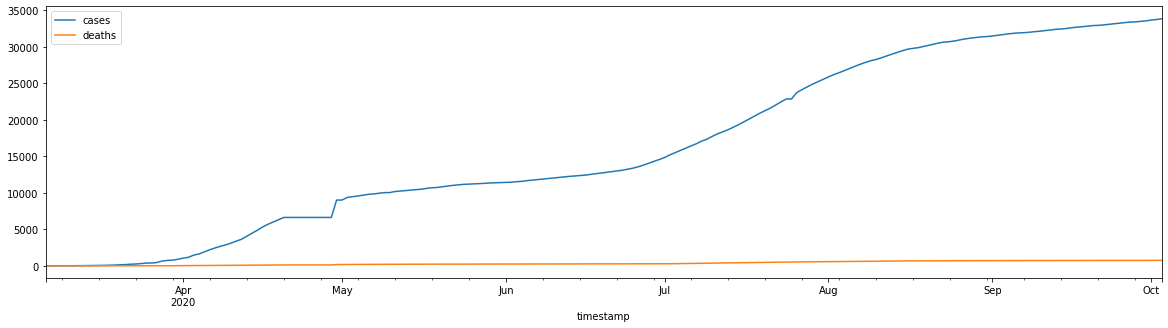

SSD


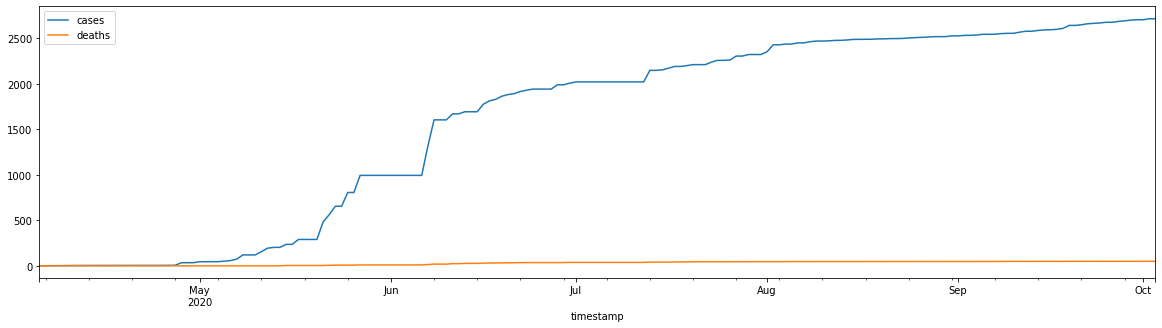

STP


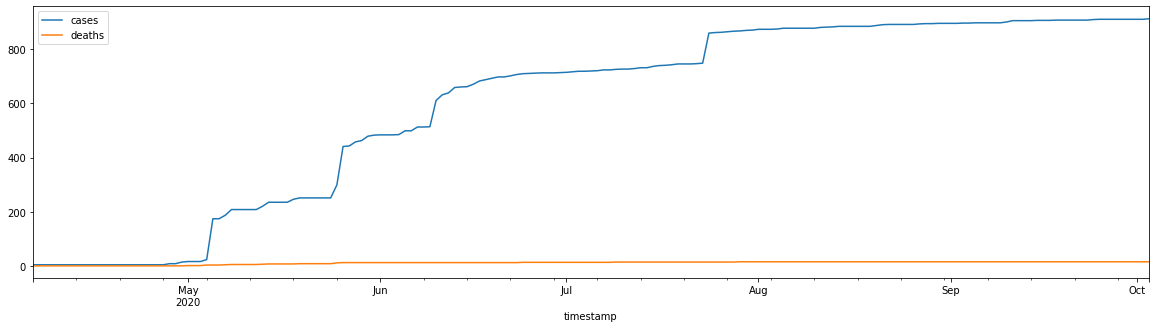

SUR


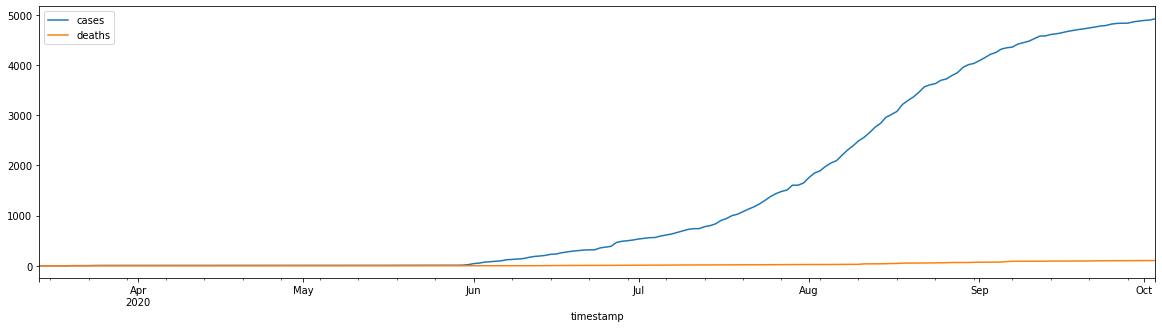

SVK


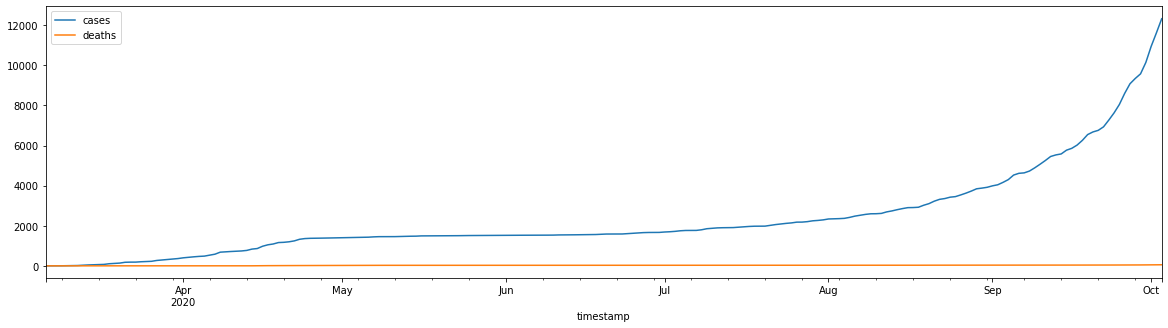

SVN


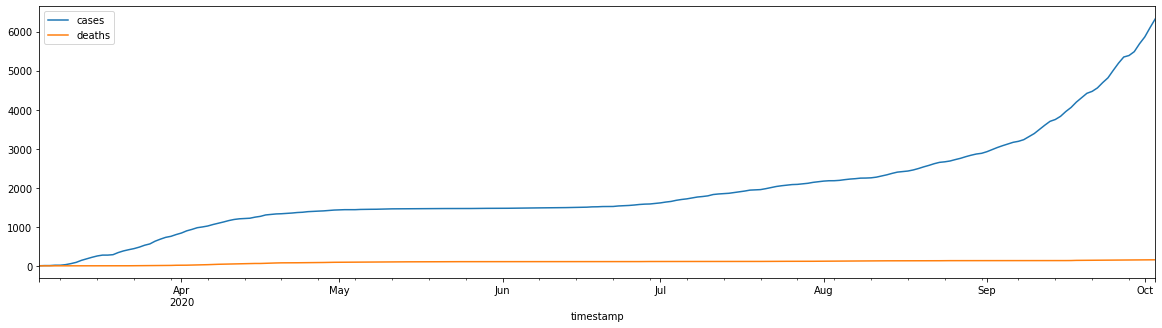

SWE


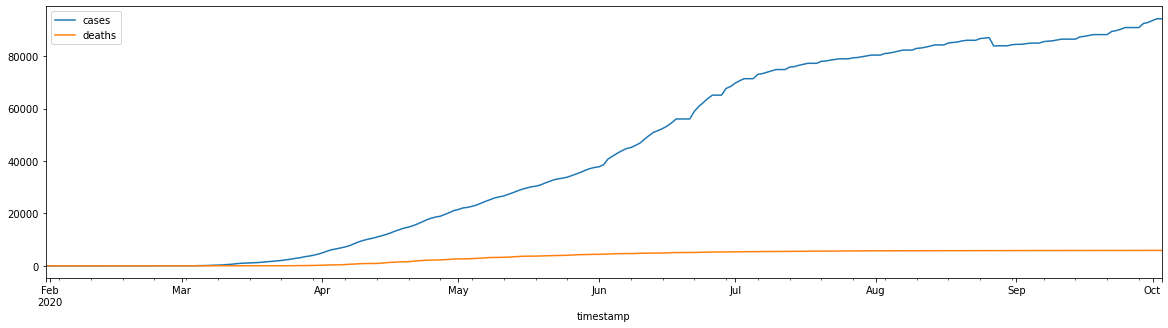

SWZ


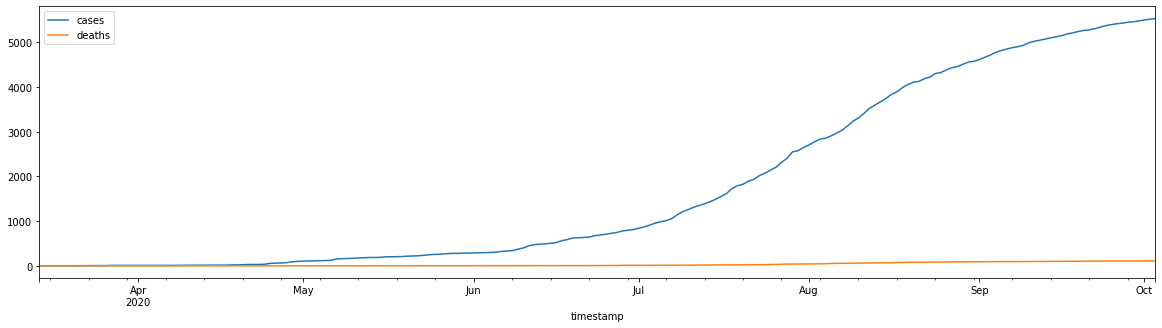

SYC


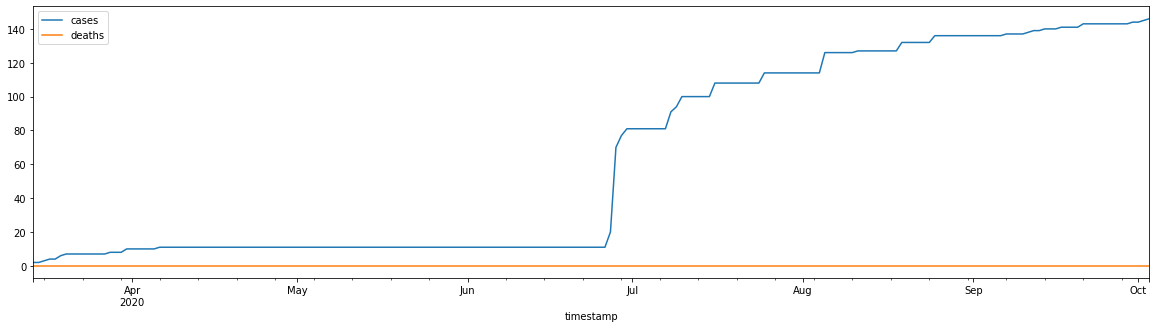

SYR


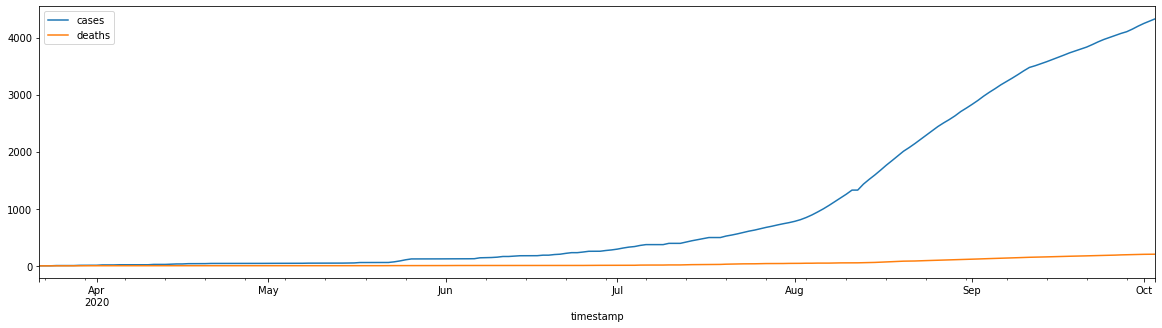

TCD


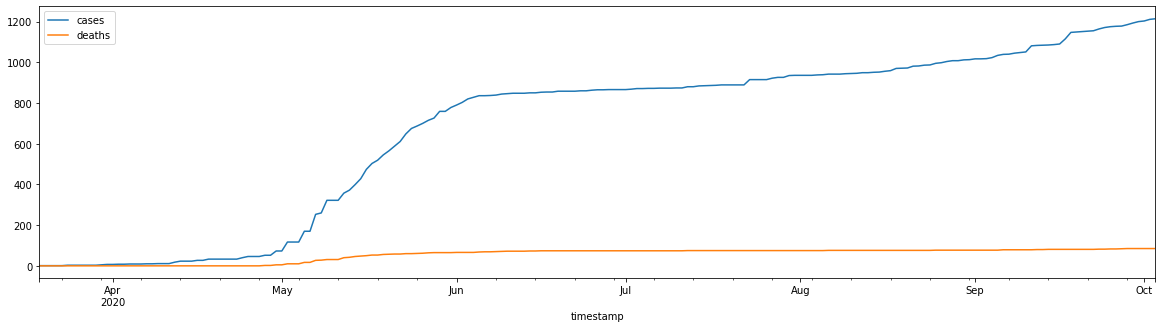

TGO


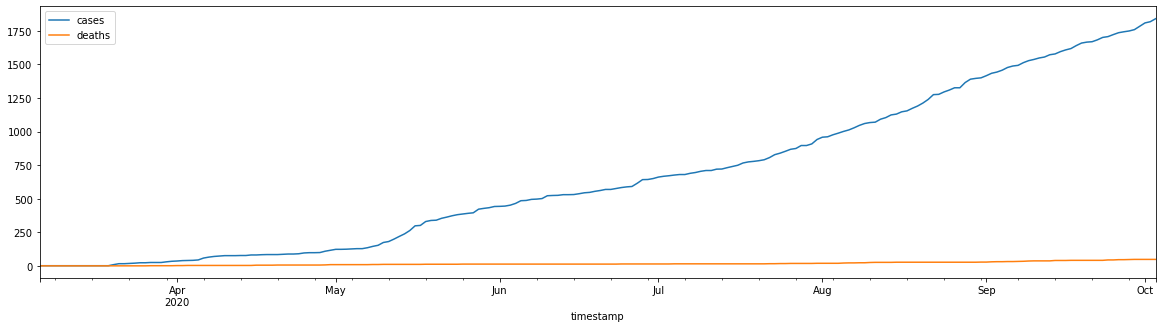

THA


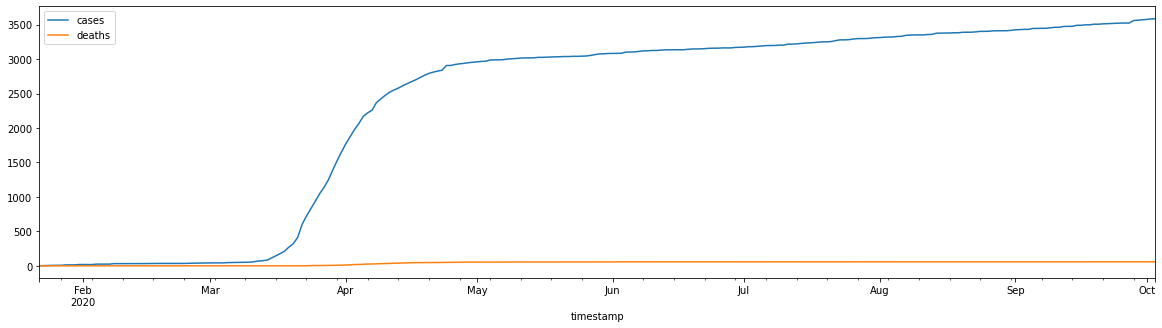

TJK


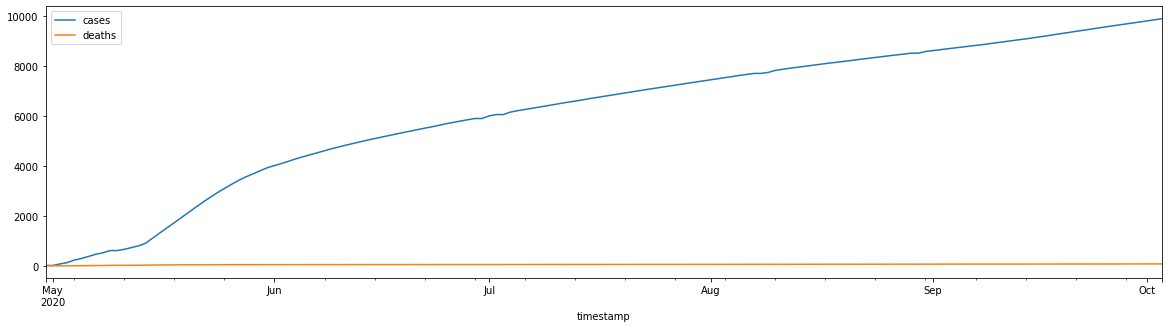

TLS


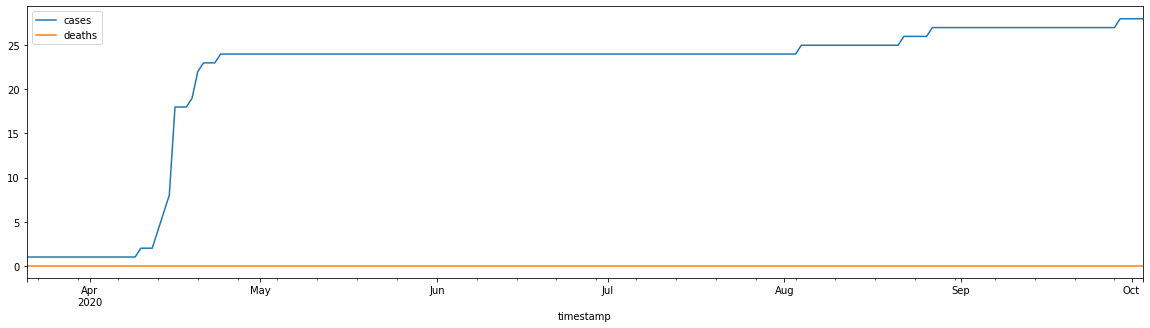

TTO


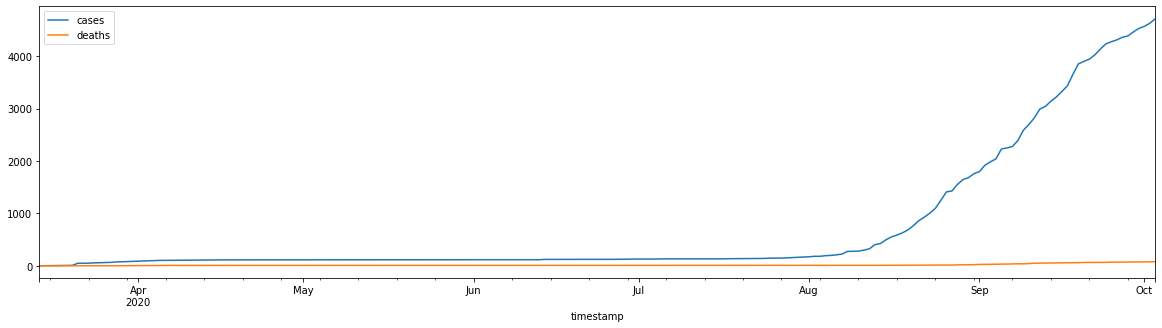

TUN


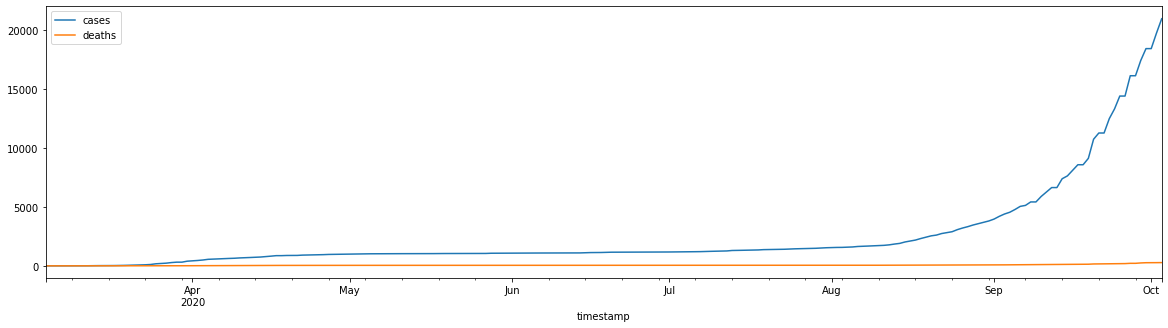

TUR


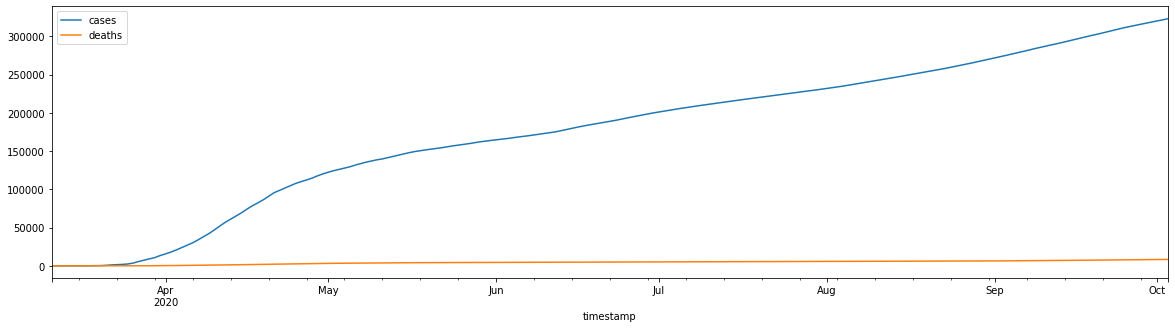

TWN


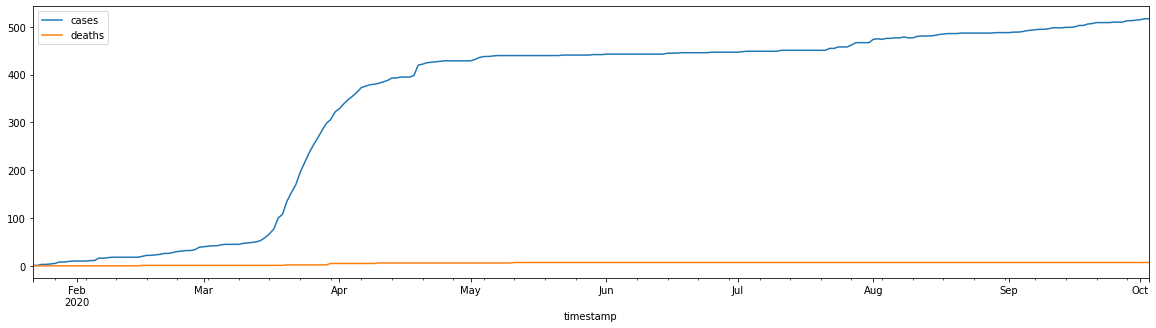

TZA


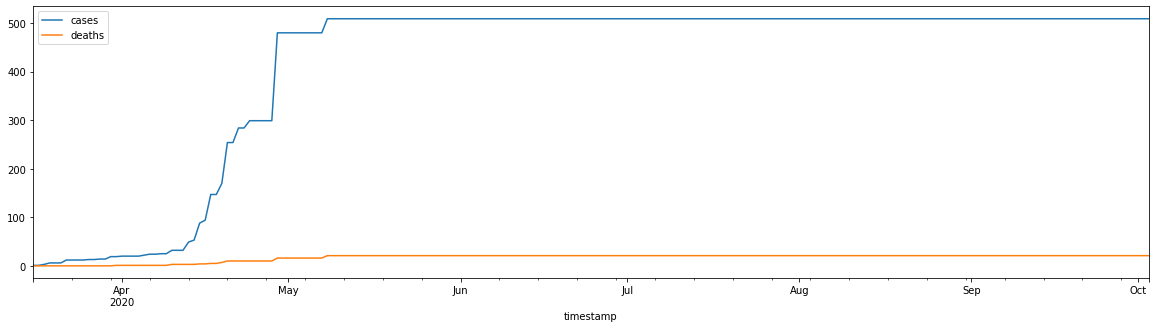

UGA


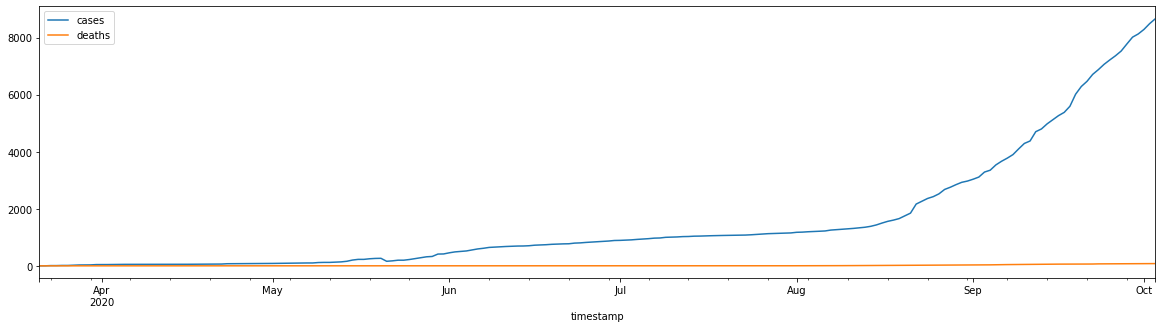

UKR


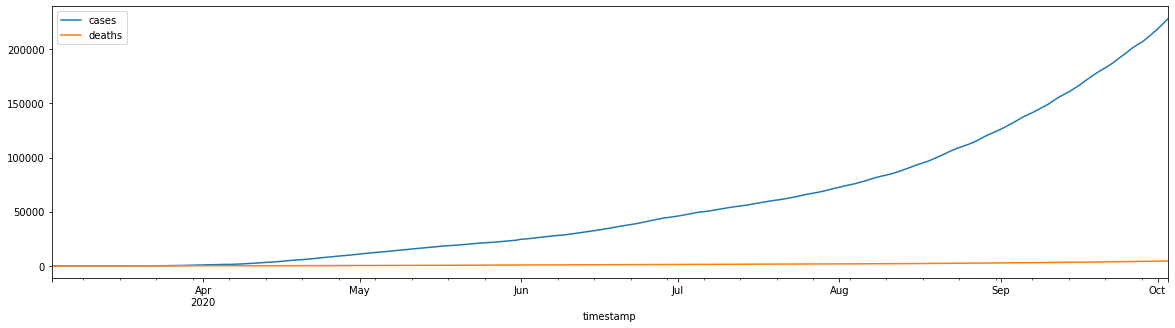

URY


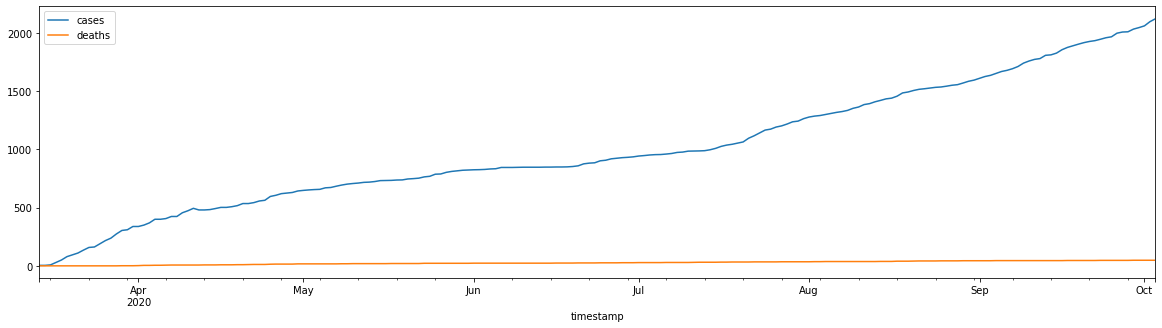

USA


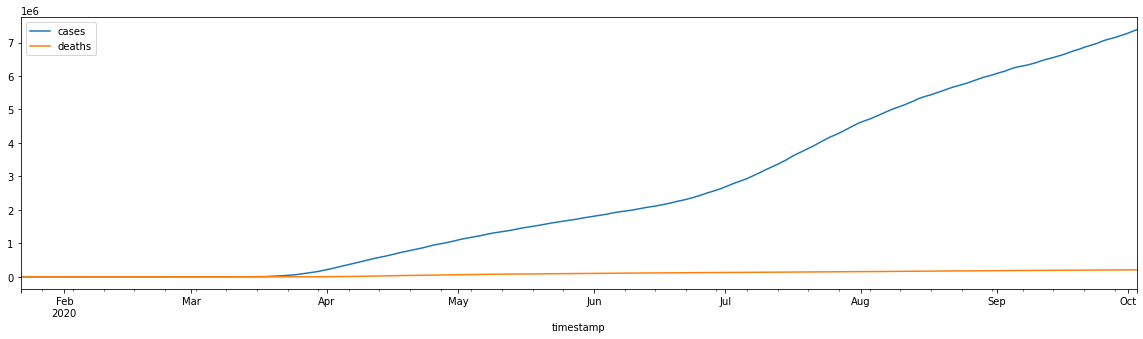

UZB


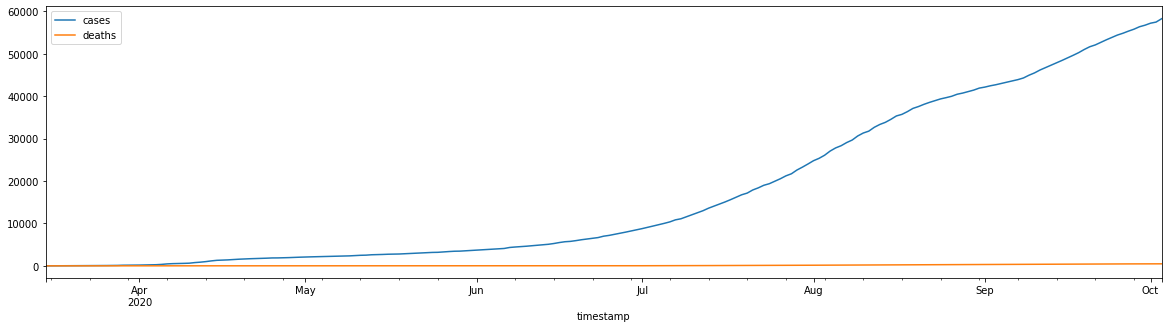

VAT


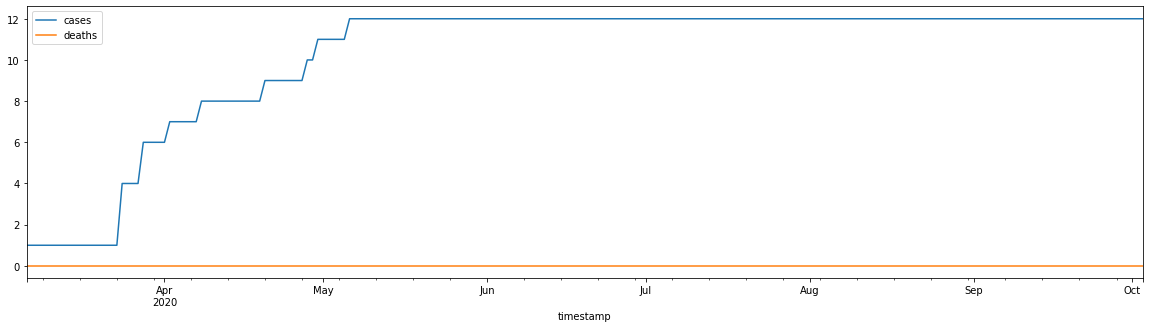

VCT


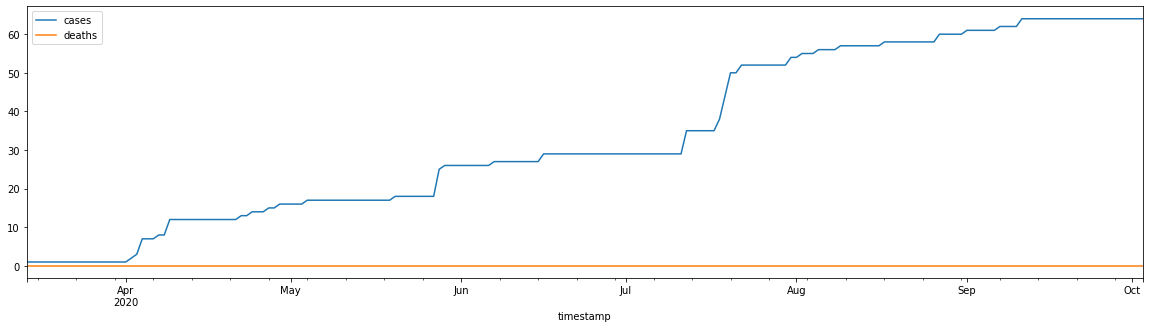

VEN


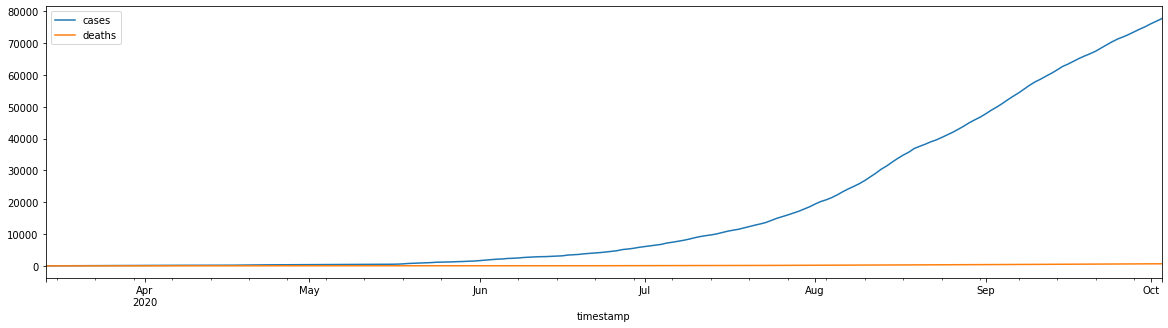

VNM


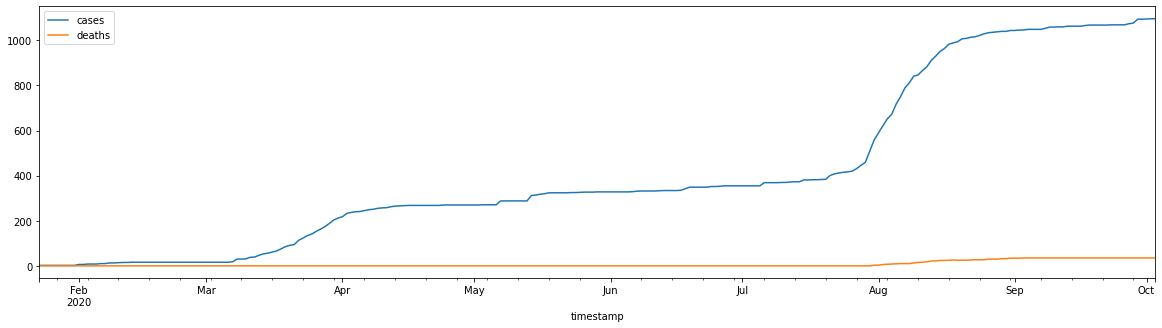

XKX


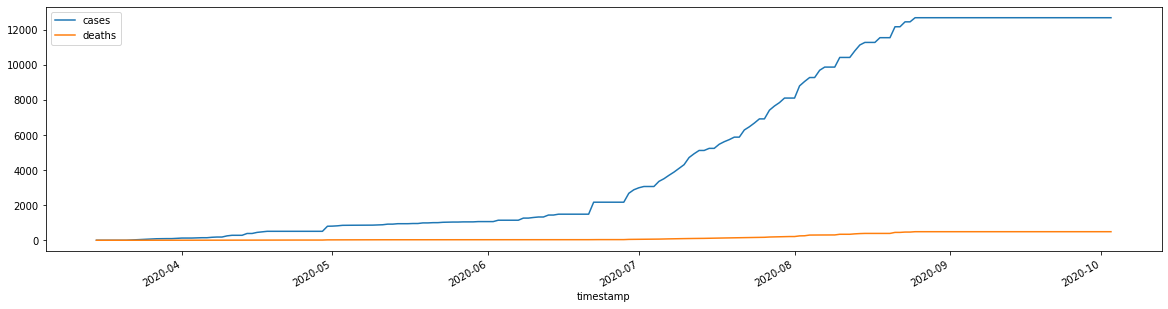

YEM


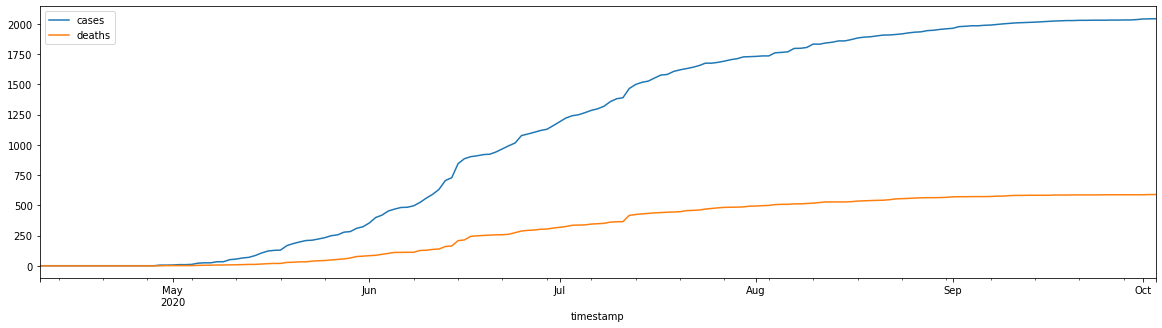

ZAF


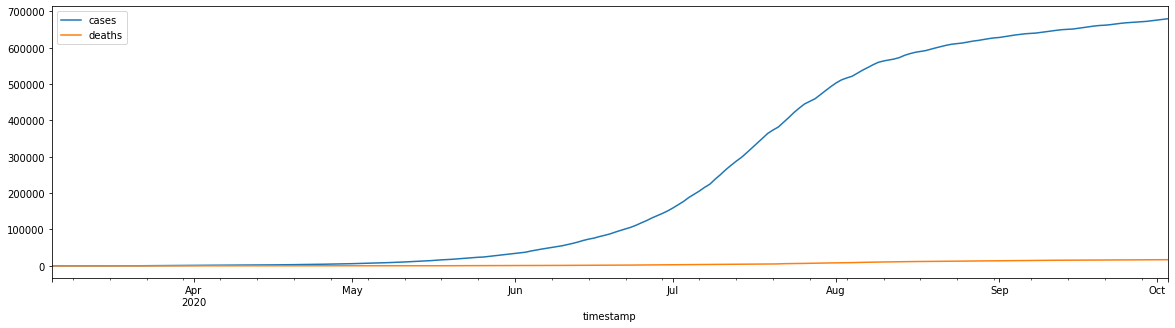

ZMB


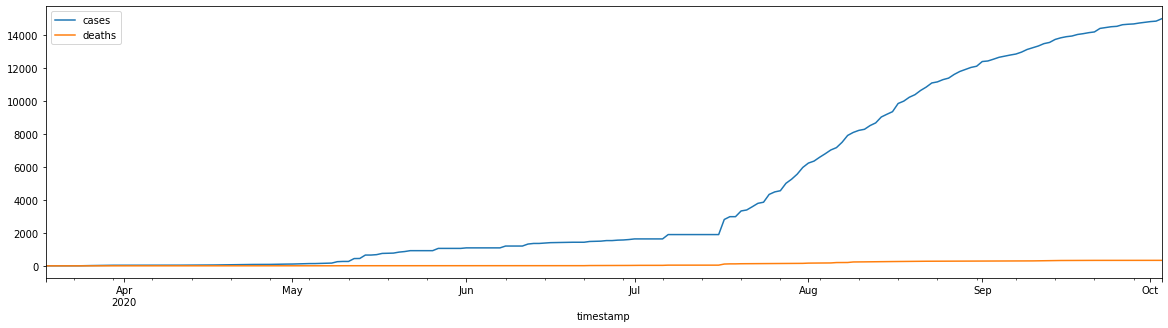

ZWE


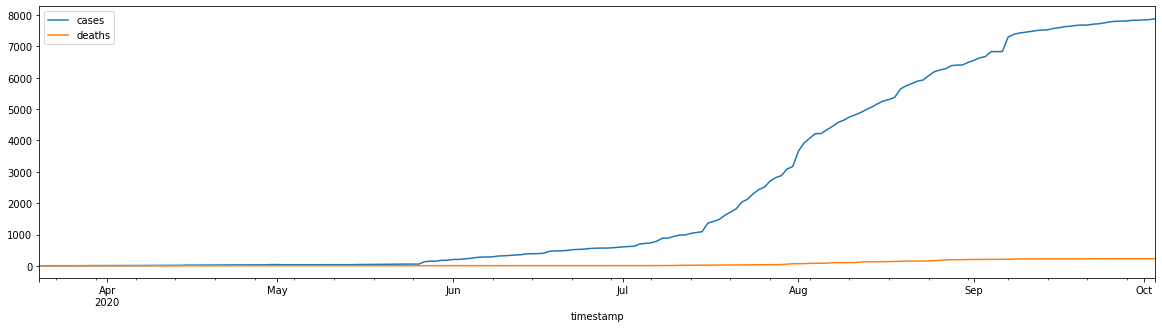

In [121]:
## TODO plot my counntry by dataset
data = datasets[4]
countrys = data.groupby(['country'])
for country in countrys:
    print(country[0])
    country[1].plot()
    pyplot.show()

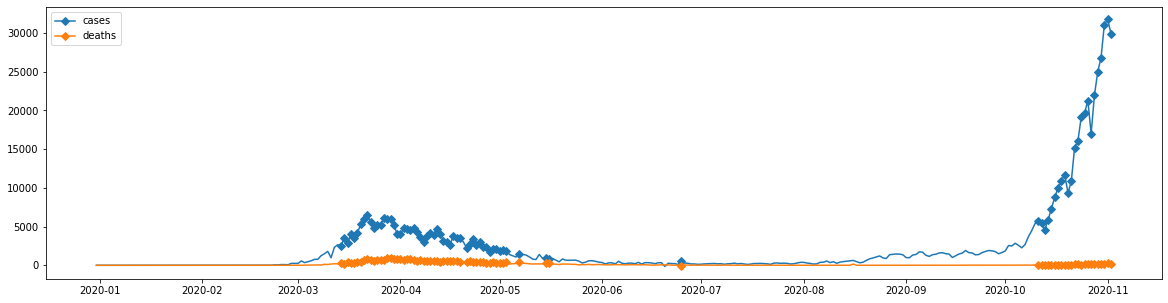

fit on all, predict on all
CPU times: user 361 ms, sys: 6.74 ms, total: 368 ms
Wall time: 372 ms


In [184]:
%%time
#fit on all, predict on all
from sklearn.ensemble import IsolationForest
dataset = datasets[4]
dataset_no_country = dataset[dataset['country']=='ITA'].copy().drop('country', axis='columns')
clf = IsolationForest(random_state=0).fit(dataset_no_country)
pred = clf.predict(dataset_no_country)
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(dataset_no_country, '-D', markevery=indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()
print("fit on all, predict on all")

In [211]:
def split_dataframe(df, chunk_size = 100): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

def join_dataframe(list_of_datraframes):
    df = DataFrame()
    for dataframe in list_of_datraframes:
        df = df.append(dataframe)
    return df

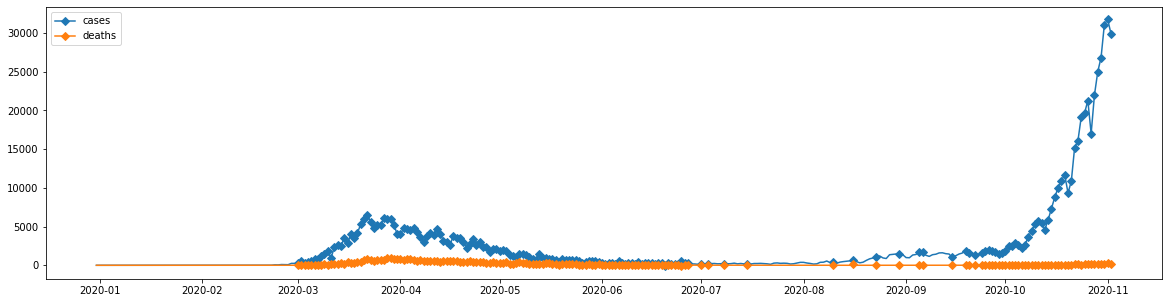

CPU times: user 599 ms, sys: 13 ms, total: 612 ms
Wall time: 620 ms


In [195]:
%%time
#fit on half a period, predict on period, period == chunck_size
from sklearn.ensemble import IsolationForest
dataset = datasets[4]
dataset_no_country = dataset[dataset['country']=='ITA'].copy().drop('country', axis='columns')
#split in chuncks of x days
fit_size = 90
chunck_size = fit_size * 2
chuncks = split_dataframe(dataset_no_country, chunck_size)
pred = []
for chunck in chuncks:
    time_frame = split_dataframe(chunck, fit_size)
    clf = IsolationForest(random_state=0).fit(time_frame[0])
    pred.extend(clf.predict(chunck).tolist())
# -1 is an anomaly and 1 is ok
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(dataset_no_country, '-D', markevery=indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()

[Timestamp('2020-01-30 00:00:00'), Timestamp('2020-02-28 00:00:00')]


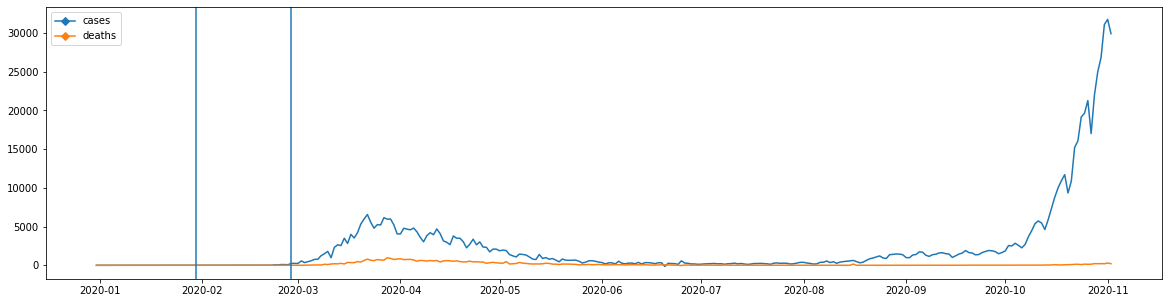

[Timestamp('2020-02-29 00:00:00'), Timestamp('2020-03-29 00:00:00')]


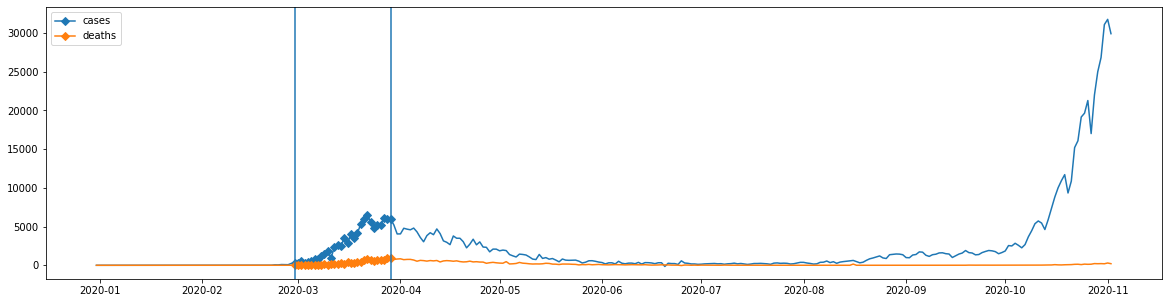

[Timestamp('2020-03-30 00:00:00'), Timestamp('2020-04-28 00:00:00')]


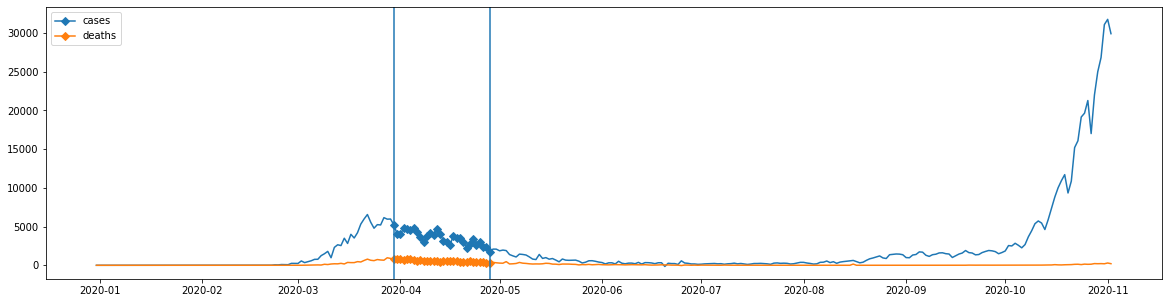

[Timestamp('2020-04-29 00:00:00'), Timestamp('2020-05-28 00:00:00')]


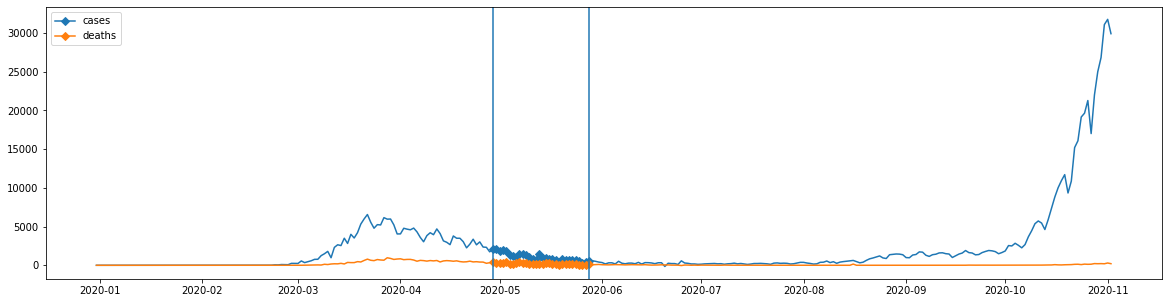

[Timestamp('2020-05-29 00:00:00'), Timestamp('2020-06-27 00:00:00')]


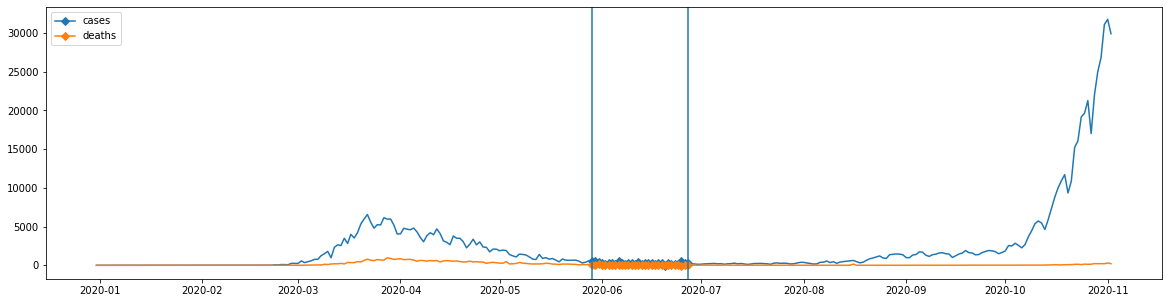

[Timestamp('2020-06-28 00:00:00'), Timestamp('2020-07-27 00:00:00')]


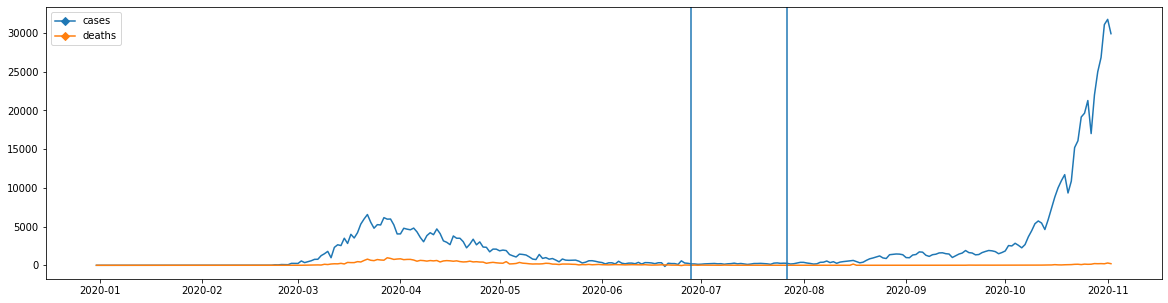

[Timestamp('2020-07-28 00:00:00'), Timestamp('2020-08-26 00:00:00')]


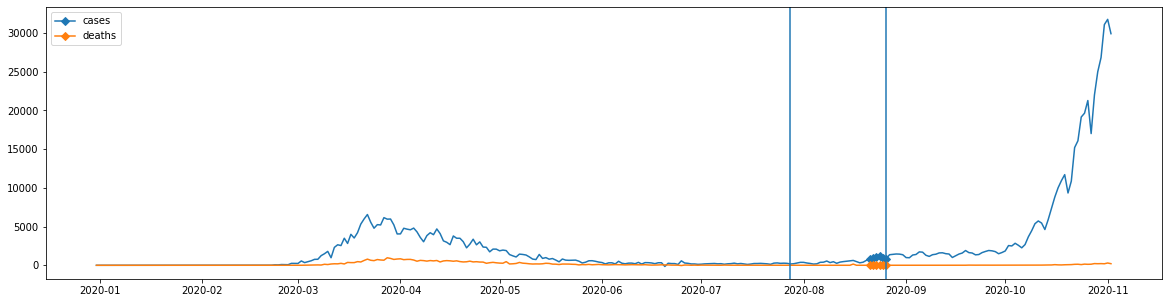

[Timestamp('2020-08-27 00:00:00'), Timestamp('2020-09-25 00:00:00')]


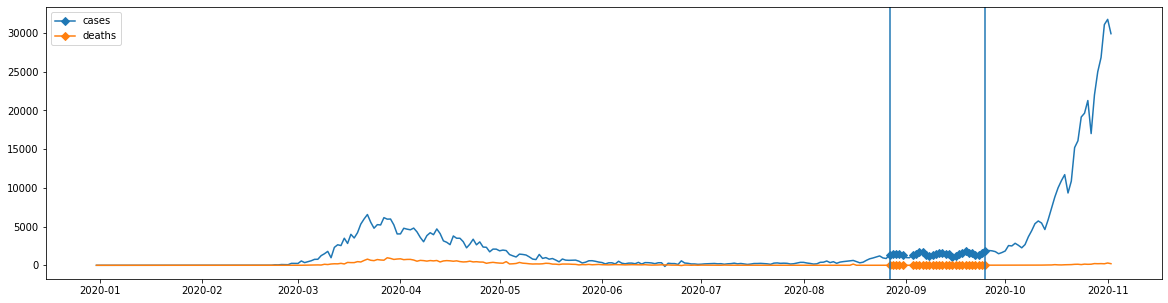

[Timestamp('2020-09-26 00:00:00'), Timestamp('2020-10-25 00:00:00')]


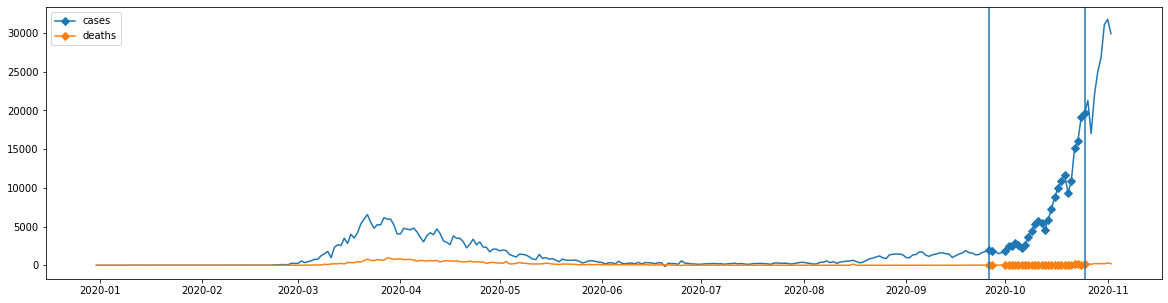

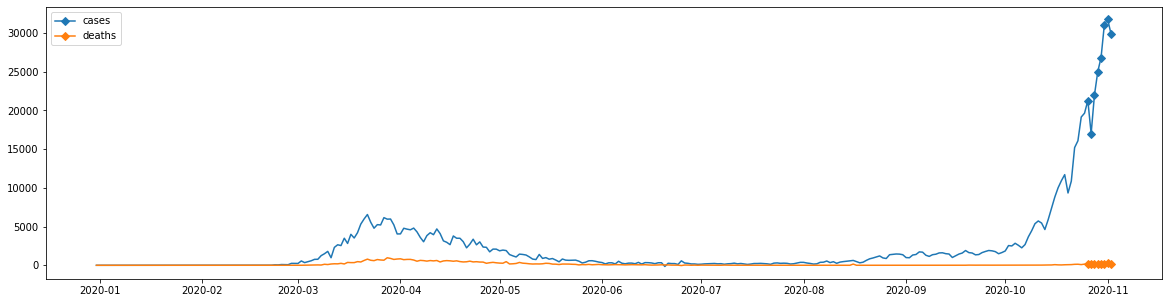

CPU times: user 5.27 s, sys: 1.05 s, total: 6.32 s
Wall time: 4.68 s


In [252]:
%%time
#fit on half a period, predict on period
from sklearn.ensemble import IsolationForest
dataset = datasets[4]
dataset_no_country = dataset[dataset['country']=='ITA'].copy().drop('country', axis='columns')
#split in chuncks of x days
chunck_size = 30
chuncks = split_dataframe(dataset_no_country, chunck_size)
pred = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    vertical_marks = []
    pyplot.plot(dataset_no_country, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [dataset_no_country.iloc[start_incides].name, dataset_no_country.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
        print(vertical_marks)
    except:
        pass
    #pyplot.plot(dataset_no_country, '-D', markevery=vertical_marks)
    pyplot.legend(['cases', 'deaths'])
    pyplot.show()

In [193]:
presidents = ["Washington", "Adams", "Jefferson", "Madison", "Monroe", "Adams", "Jackson"]
for num, name in enumerate(presidents[1:], start=1):
    print("President {}: {}".format(num, name))


President 1: Adams
President 2: Jefferson
President 3: Madison
President 4: Monroe
President 5: Adams
President 6: Jackson


In [248]:
print(dataset_no_country.iloc[start_incides].name)

2020-10-26 00:00:00
